In [235]:
# import the dependencies
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')

#functions written for this project doc in translator_fcn:
from exploratory_experiments import translator_fcn 
from importlib import reload
reload(translator_fcn)
# general imports
import warnings
import numpy as np
from numpy import random
import pandas as pd
import scanpy as sc
from anndata import AnnData as ad
from tabulate import tabulate

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from scipy.stats import spearmanr, pearsonr
from collections import Counter

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# programming stuff
import time
import os, sys
import pickle
from pathlib import Path


In [236]:
#results paths:
path = os.getcwd()
processed_path = f"{path}/../data/mouse_kidney/processed/"

In [237]:
#scanpy config.
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.7.8 umap==0.5.3 numpy==1.19.5 scipy==1.7.1 pandas==1.3.3 scikit-learn==1.0 statsmodels==0.13.0 python-igraph==0.9.11 louvain==0.8.0 pynndescent==0.5.8


In [238]:
#reading in the preprocessed data
sn_path = f"{processed_path}M7_sn_notfiltered_scaled.h5ad"
sc_path = f"{processed_path}M7_sc_notfiltered_scaled.h5ad"
single_path = f"{processed_path}M7_singlecombined_notfiltered_scaled.h5ad"
bulk_path = f"{processed_path}M7_bulk_notfiltered_scaled.h5ad"

sn_adata = sc.read_h5ad(sn_path)
sc_adata = sc.read_h5ad(sc_path)
single_adata = sc.read_h5ad(single_path) 
bulk_adata = sc.read_h5ad(bulk_path)

In [239]:
matching_celltypes = ['CD_IC', 'CD_PC', 'CNT', 'DCT', 'Endo', 'MC', 'MPH', 'PT', 'Podo', 'aLOH']

Coefficients: 
 [0.638622]
Mean squared error: 0.01
Coefficient of determination: 0.43


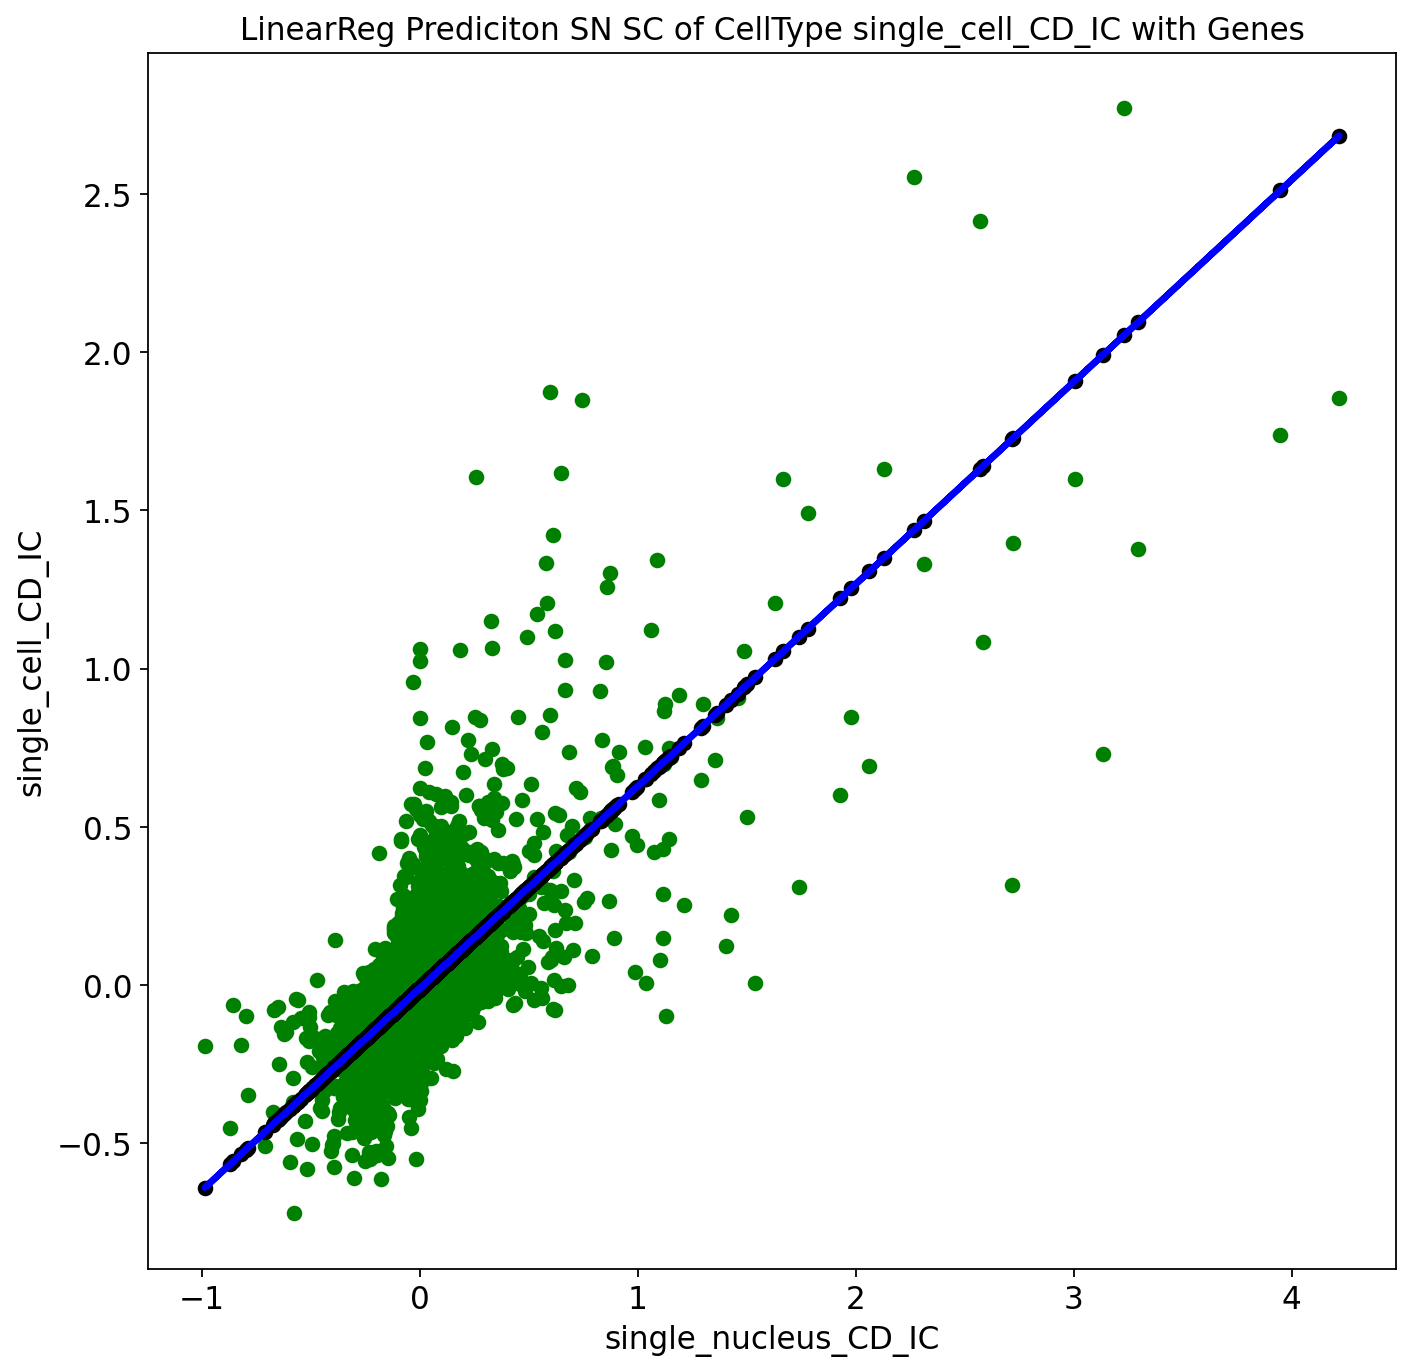

In [240]:
regr_CD_IC_g, x_train_CD_IC_g, y_train_CD_IC_g, x_test_CD_IC_g, y_test_CD_IC_g, y_pred_CD_IC_g = translator_fcn.linear_model_cell_gene(single_adata, "orig_and_celltype", "single_nucleus_CD_IC", "single_cell_CD_IC", 10000, 3000)

Coefficients: 
 [[1.0000001]]
Mean squared error: 0.04
Coefficient of determination: 0.08


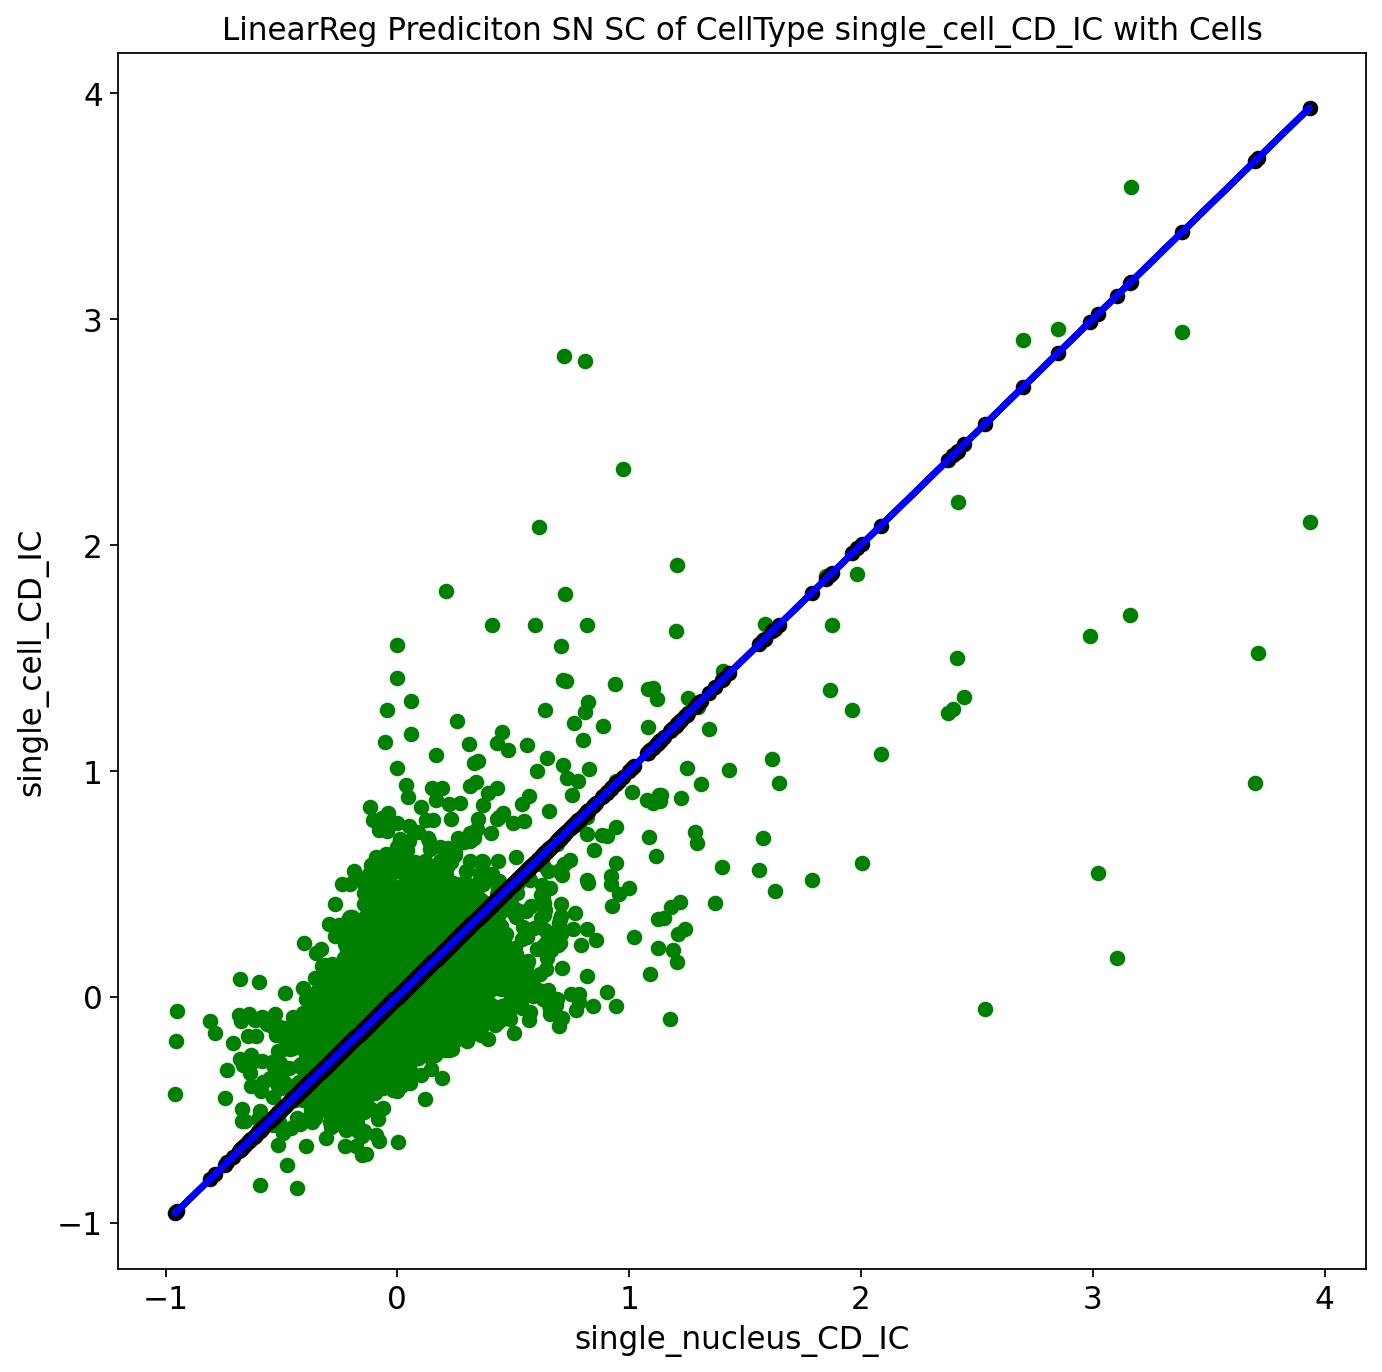

In [241]:
regr_CD_IC, x_train_CD_IC, y_train_CD_IC, x_test_CD_IC, y_test_CD_IC, y_pred_CD_IC = translator_fcn.linear_model_cellnum(single_adata, "orig_and_celltype", "single_nucleus_CD_IC", "single_cell_CD_IC",0.30)

Coefficients: 
 [1.2176725]
Mean squared error: 0.02
Coefficient of determination: 0.41


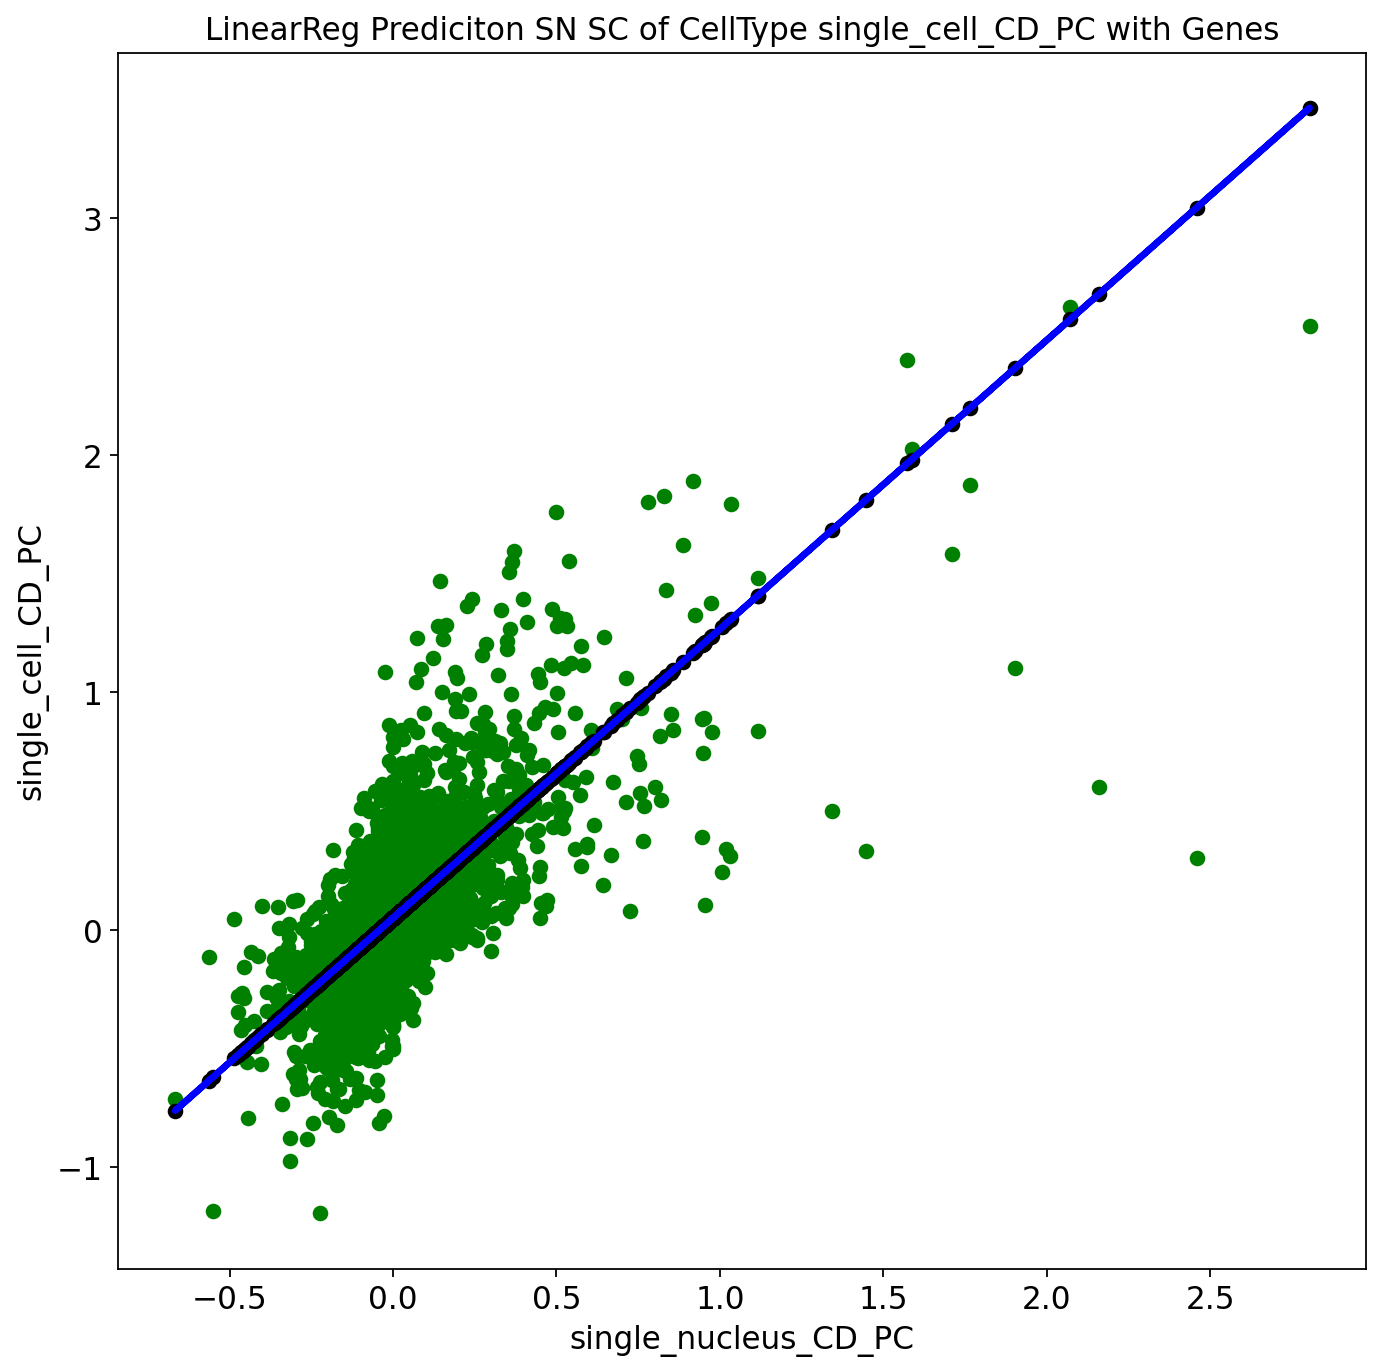

In [242]:
regr_CD_PC_g, x_train_CD_PC_g, y_train_CD_PC_g, x_test_CD_PC_g, y_test_CD_PC_g, y_pred_CD_PC_g = translator_fcn.linear_model_cell_gene(single_adata, "orig_and_celltype", "single_nucleus_CD_PC", "single_cell_CD_PC", 10000, 3000)

Coefficients: 
 [[0.99999976]]
Mean squared error: 0.05
Coefficient of determination: 0.17


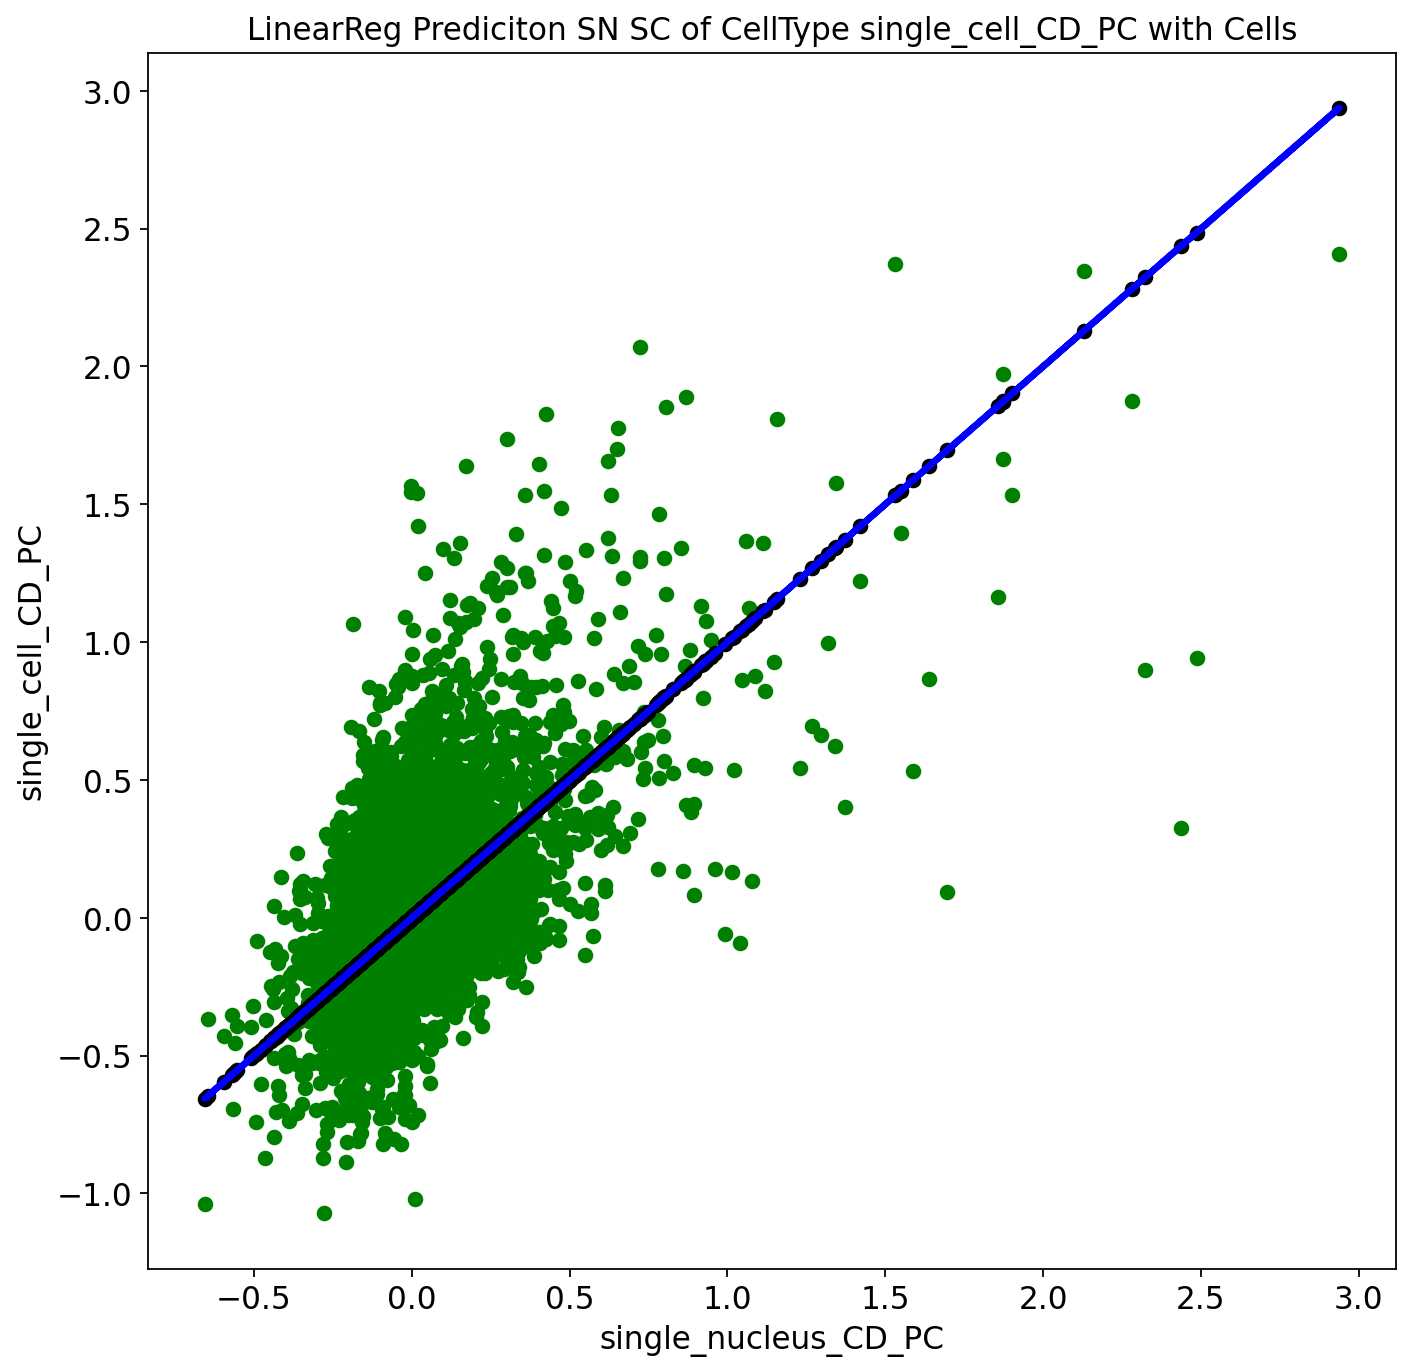

In [243]:
regr_CD_PC, x_train_CD_PC, y_train_CD_PC, x_test_CD_PC, y_test_CD_PC, y_pred_CD_PC = translator_fcn.linear_model_cellnum(single_adata, "orig_and_celltype", "single_nucleus_CD_PC", "single_cell_CD_PC", .2)

Coefficients: 
 [0.562326]
Mean squared error: 0.01
Coefficient of determination: 0.20


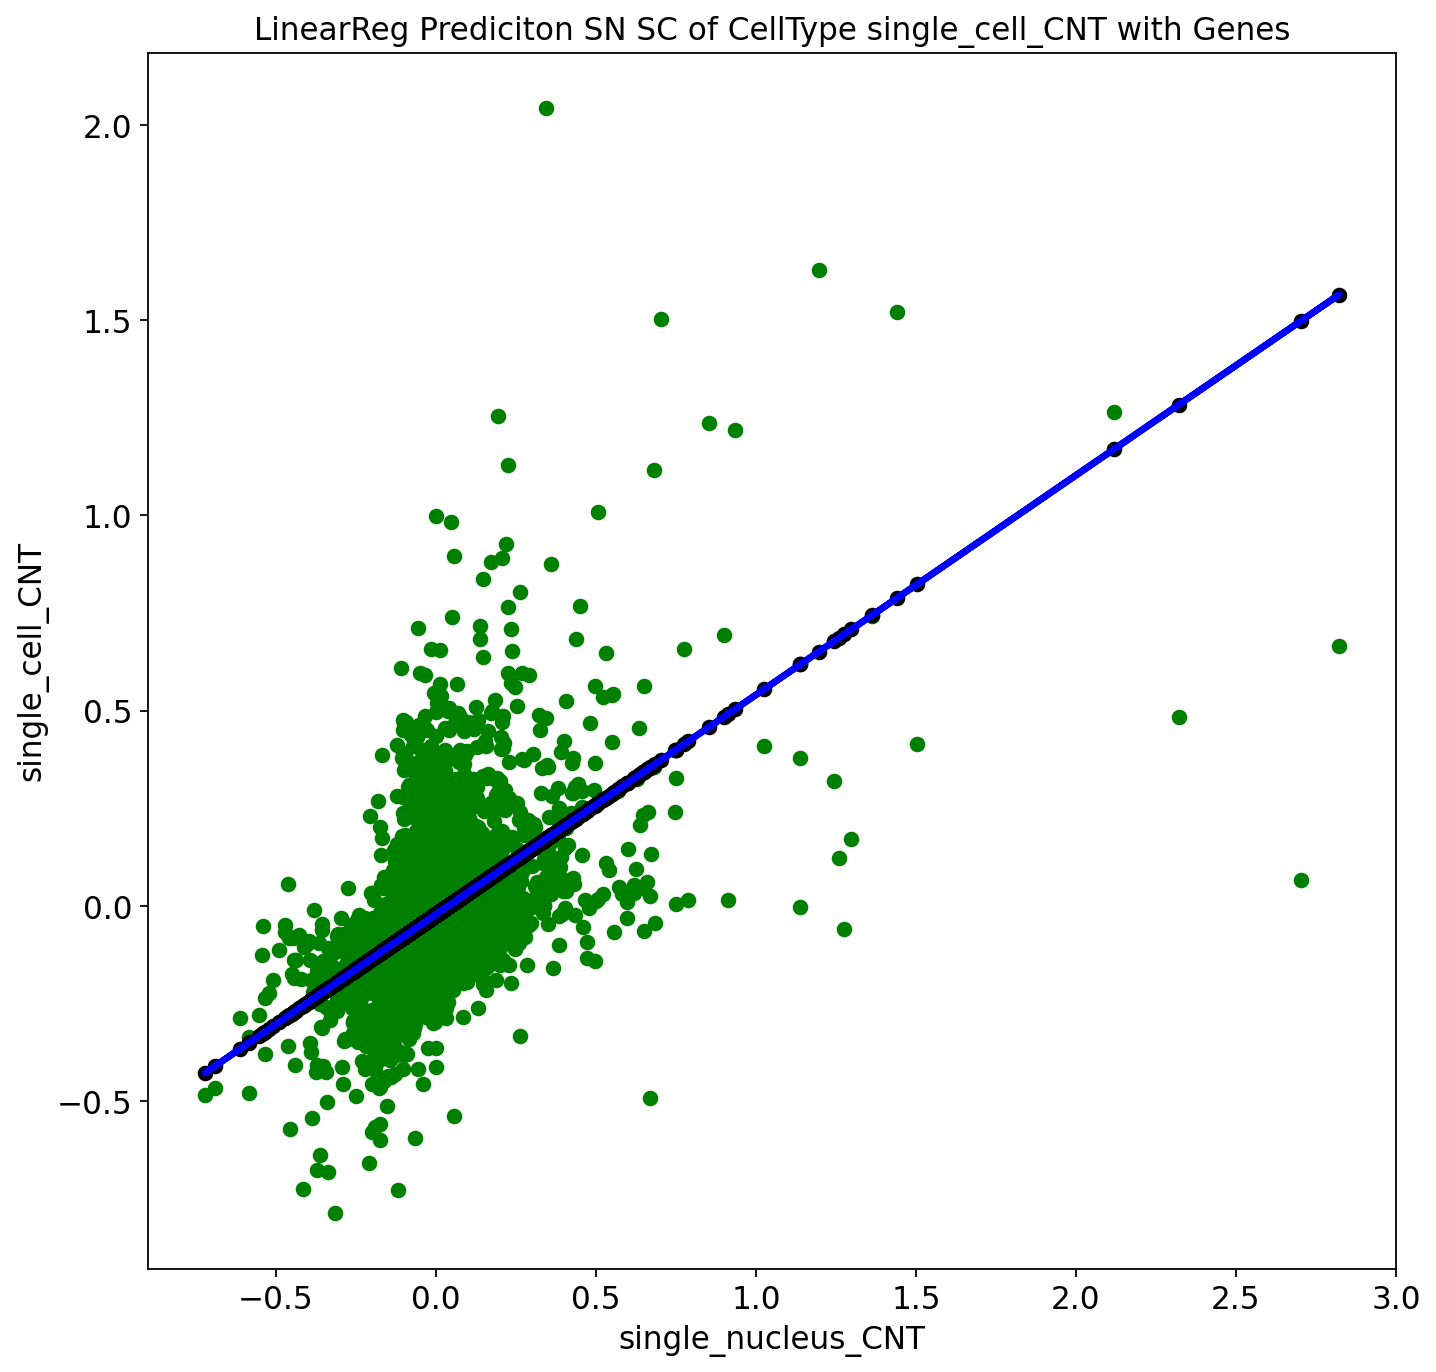

In [244]:
regr_CNT_g, x_train_CNT_g, y_train_CNT_g, x_test_CNT_g, y_test_CNT_g, y_pred_CNT_g = translator_fcn.linear_model_cell_gene(single_adata, "orig_and_celltype", "single_nucleus_CNT", "single_cell_CNT", 10000, 3000)

Coefficients: 
 [[0.99999934]]
Mean squared error: 0.04
Coefficient of determination: -0.34


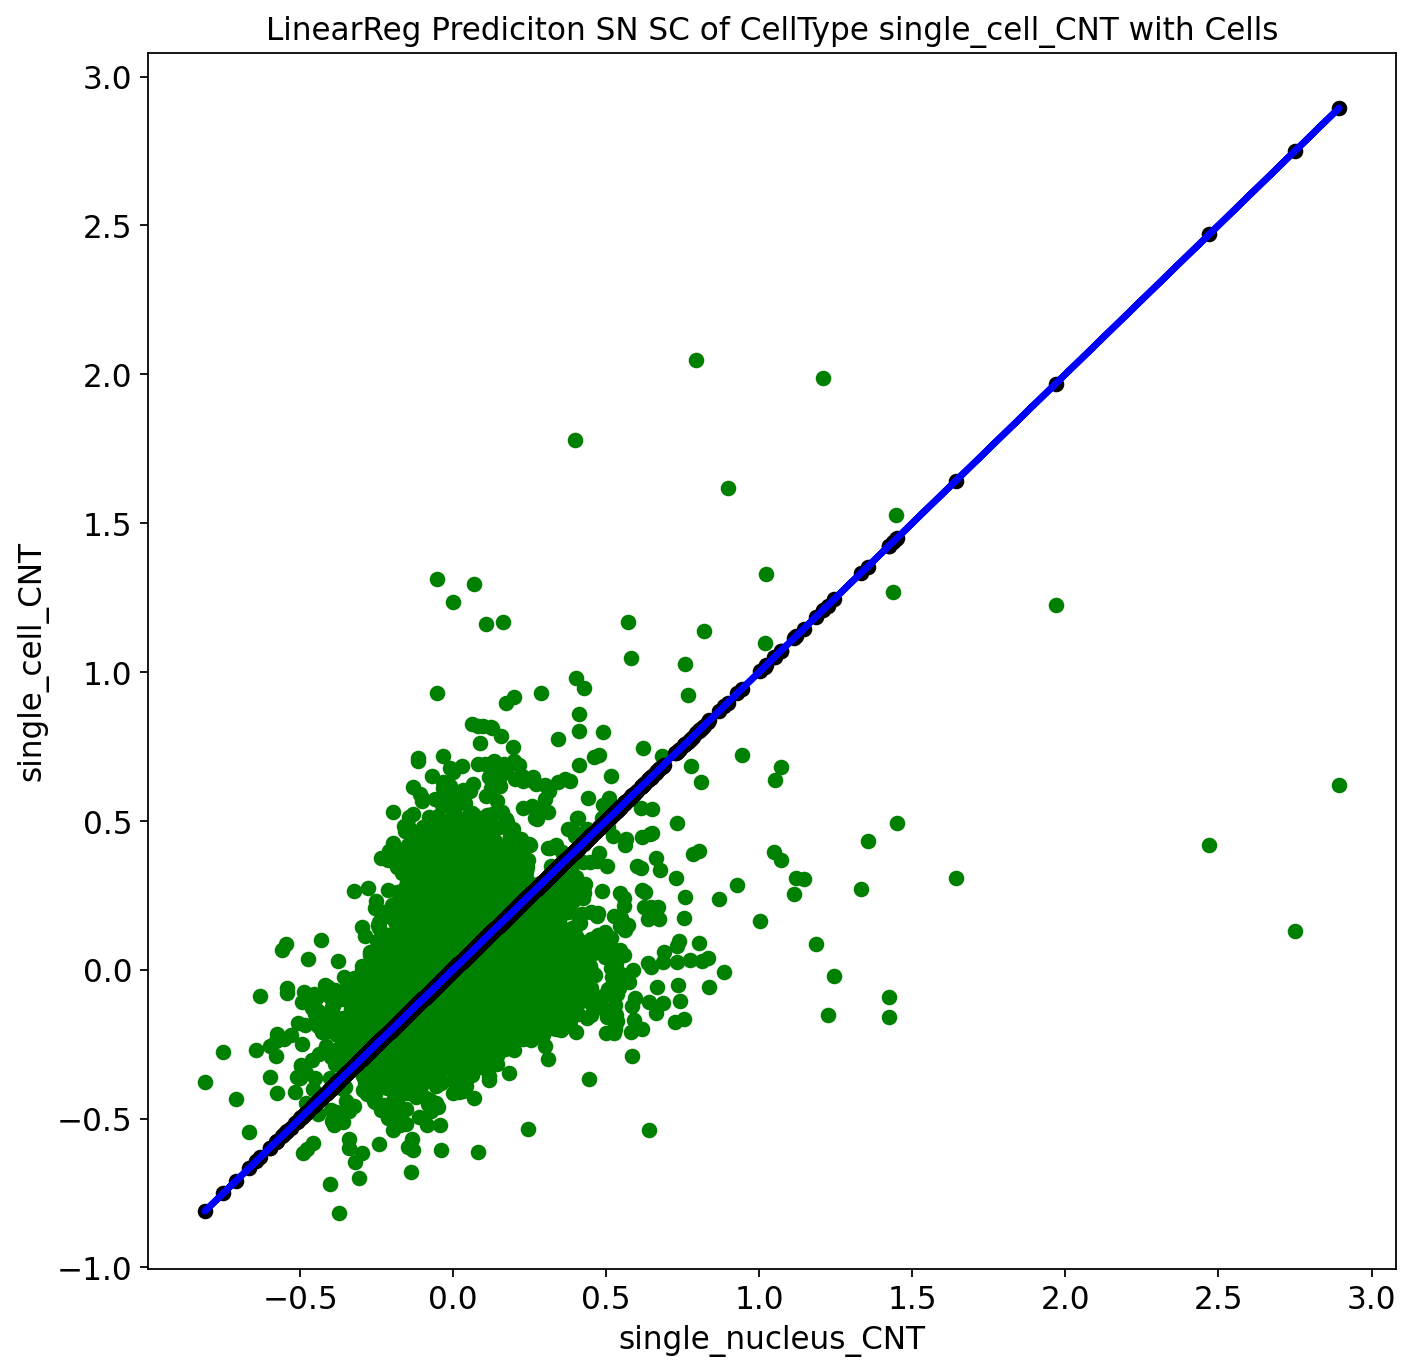

In [245]:
regr_CNT, x_train_CNT, y_train_CNT, x_test_CNT, y_test_CNT, y_pred_CNT = translator_fcn.linear_model_cellnum(single_adata, "orig_and_celltype", "single_nucleus_CNT", "single_cell_CNT", 0.2)

Coefficients: 
 [1.1027337]
Mean squared error: 0.02
Coefficient of determination: 0.46


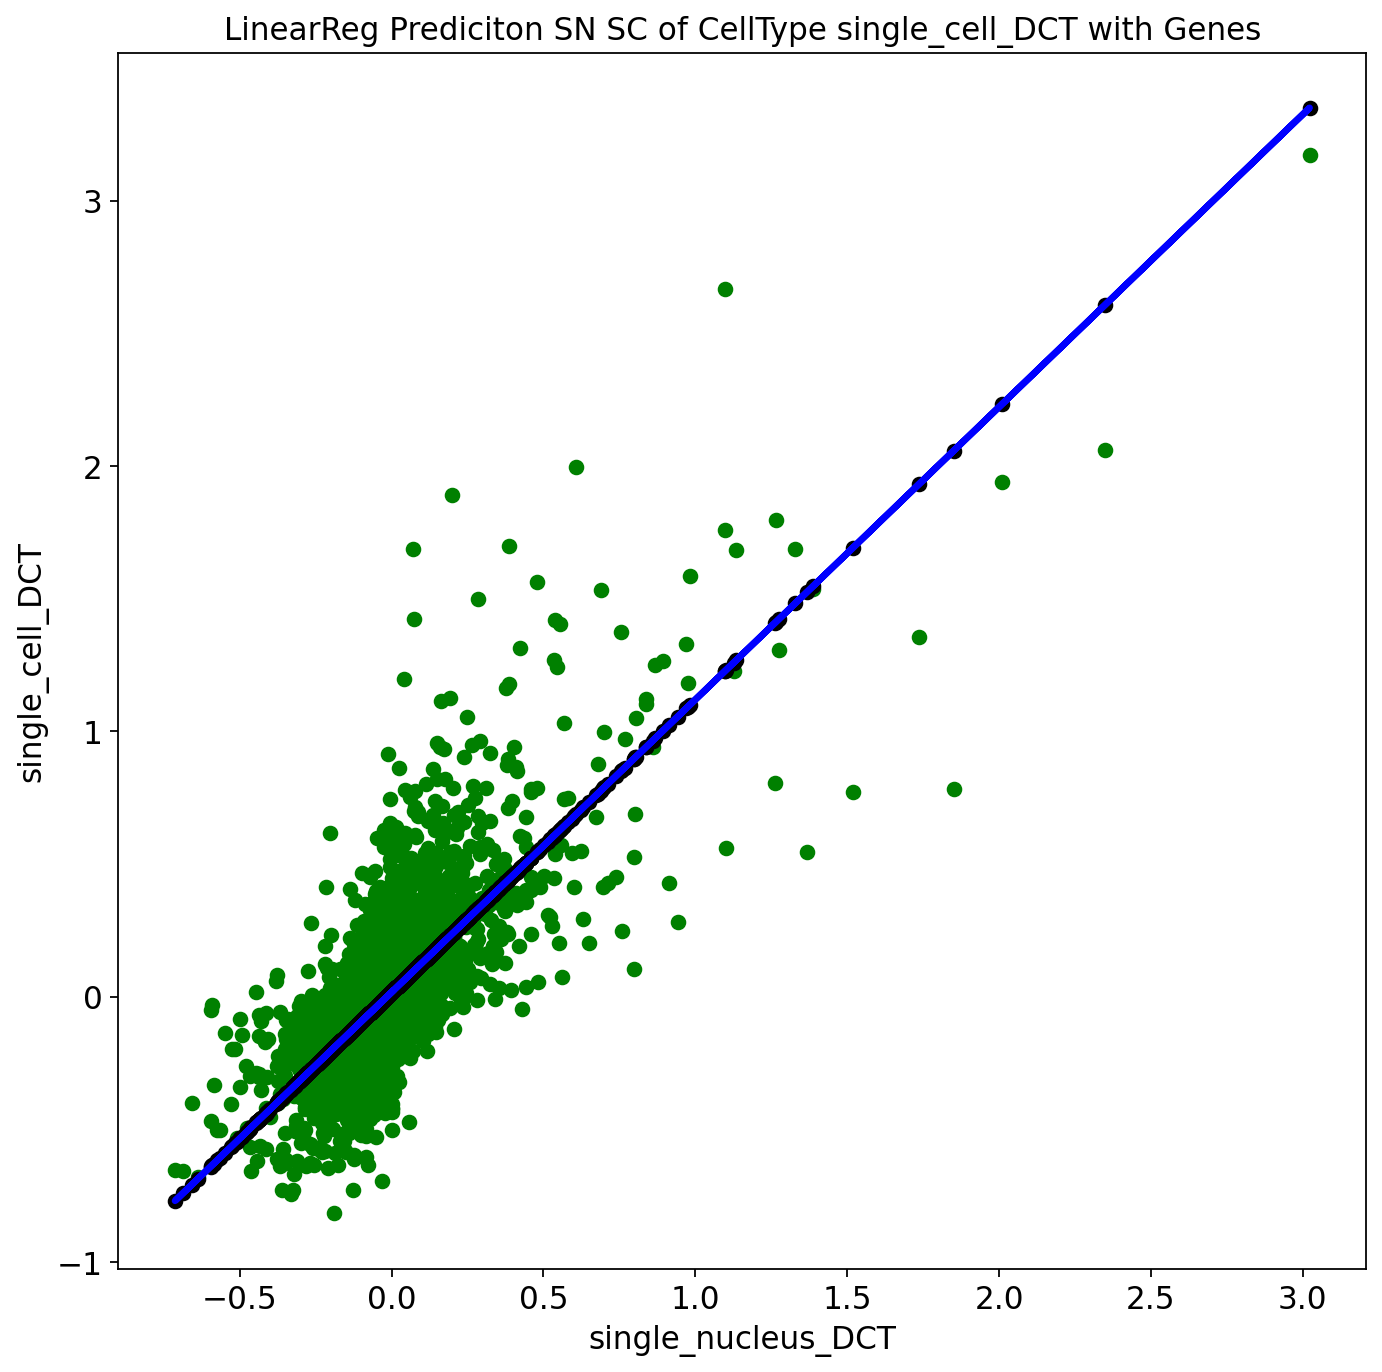

In [246]:
regr_DCT_g, x_train_DCT_g, y_train_DCT_g, x_test_DCT_g, y_test_DCT_g, y_pred_DCT_g = translator_fcn.linear_model_cell_gene(single_adata, "orig_and_celltype", "single_nucleus_DCT", "single_cell_DCT", 10000, 3000)

Coefficients: 
 [[0.9999994]]
Mean squared error: 0.04
Coefficient of determination: 0.21


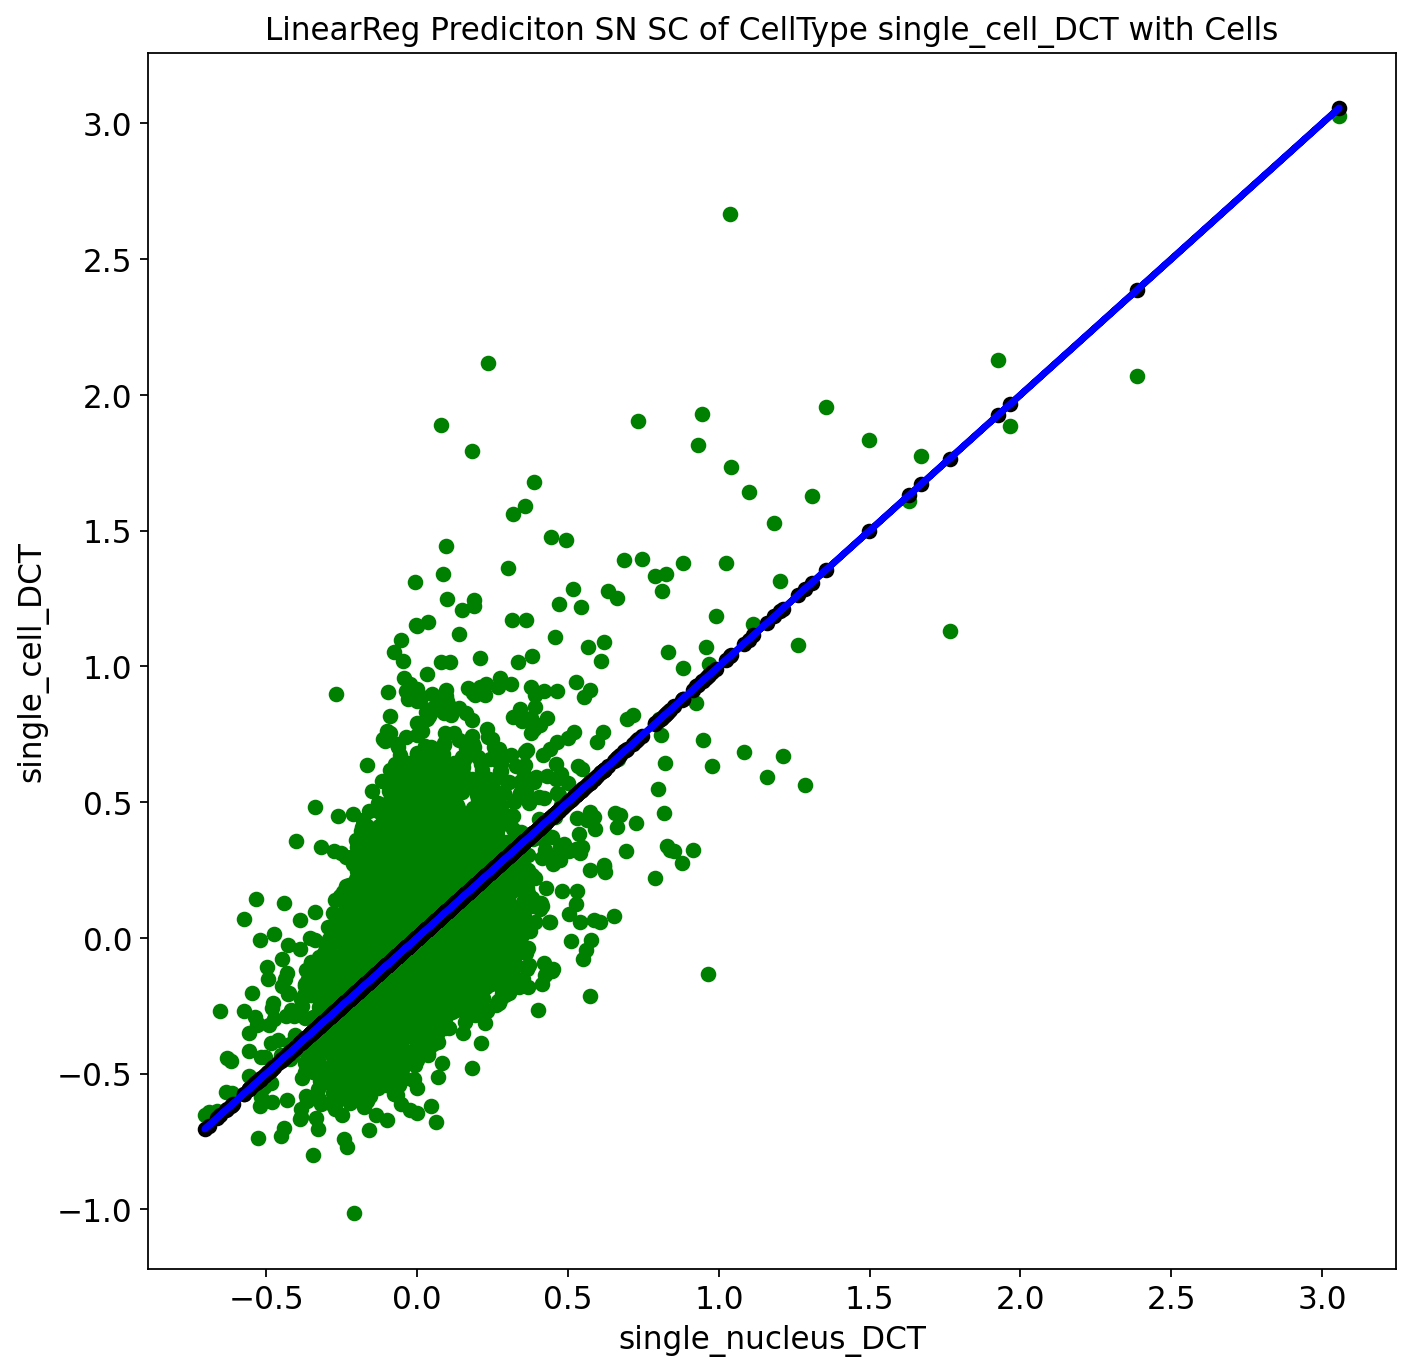

In [247]:
regr_DCT, x_train_DCT, y_train_DCT, x_test_DCT, y_test_DCT, y_pred_DCT = translator_fcn.linear_model_cellnum(single_adata, "orig_and_celltype", "single_nucleus_DCT", "single_cell_DCT", 0.2)

Coefficients: 
 [1.349975]
Mean squared error: 0.05
Coefficient of determination: 0.53


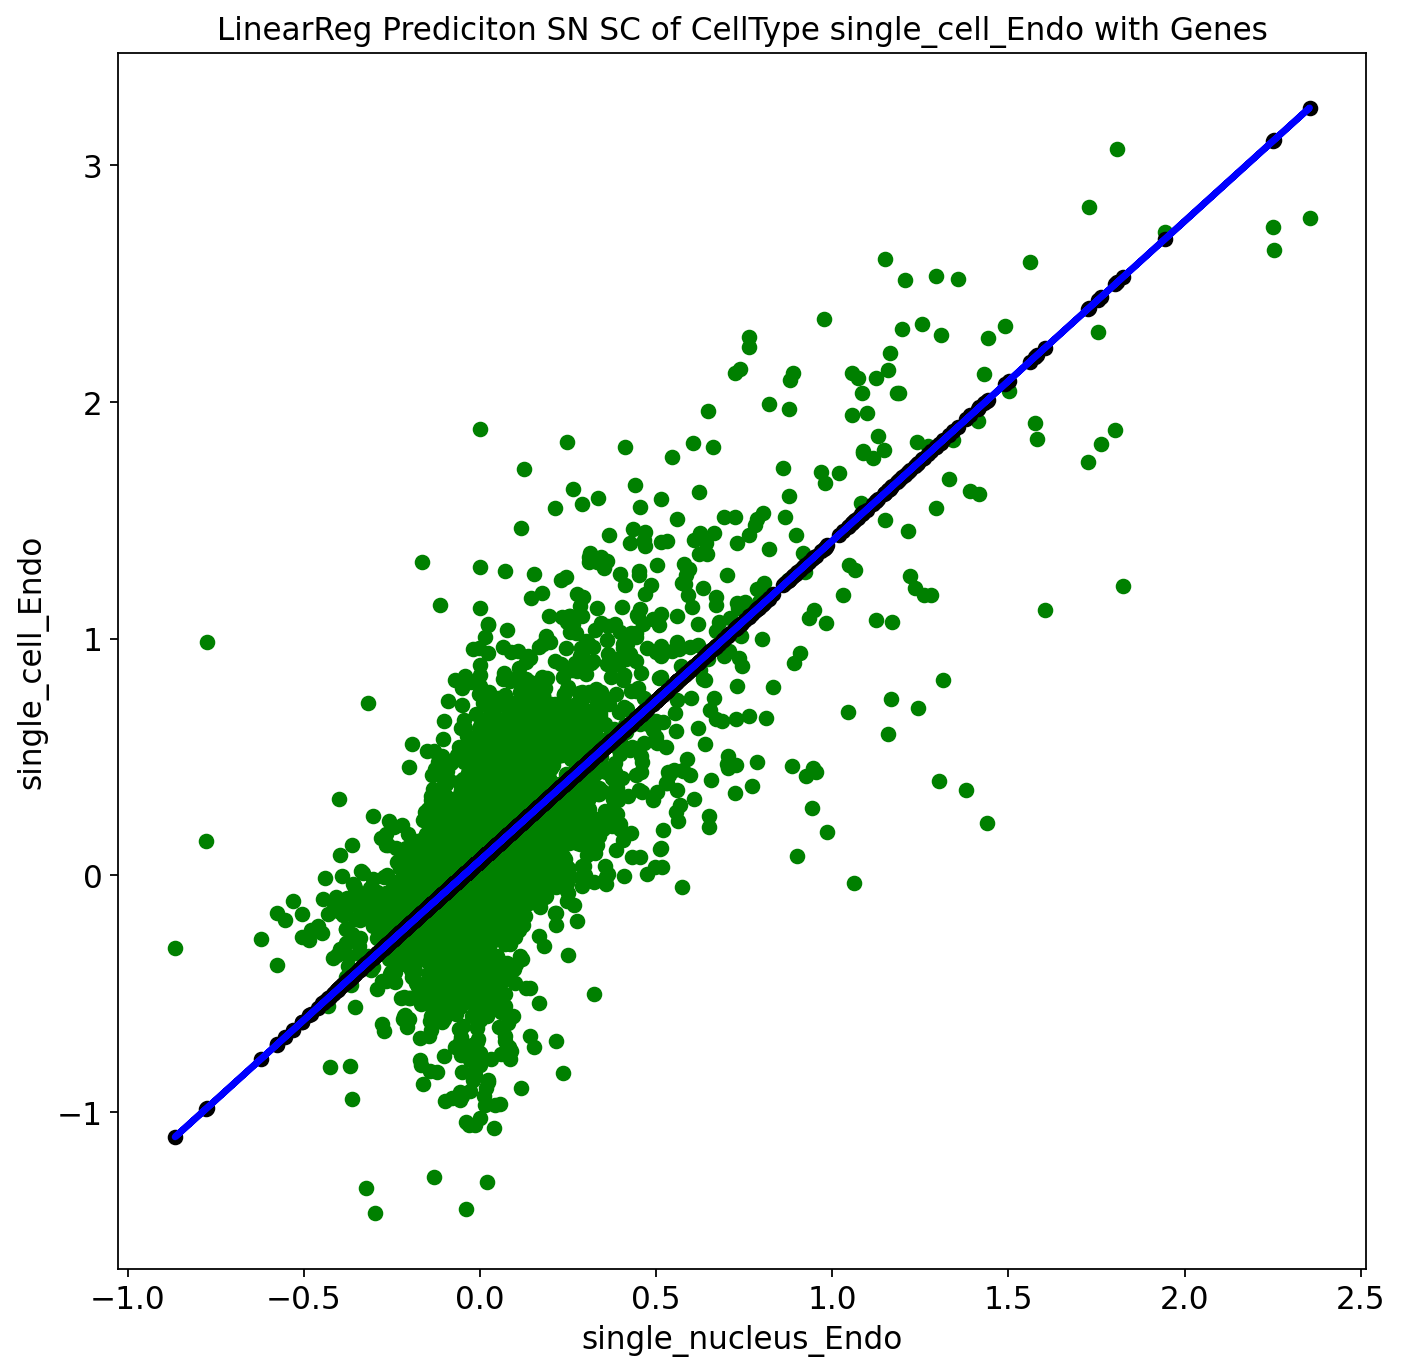

In [248]:
regr_Endo_g, x_train_Endo_g, y_train_Endo_g, x_test_Endo_g, y_test_Endo_g, y_pred_Endo_g = translator_fcn.linear_model_cell_gene(single_adata, "orig_and_celltype", "single_nucleus_Endo", "single_cell_Endo", 10000, 3000)

Coefficients: 
 [[0.99999994]]
Mean squared error: 0.08
Coefficient of determination: 0.35


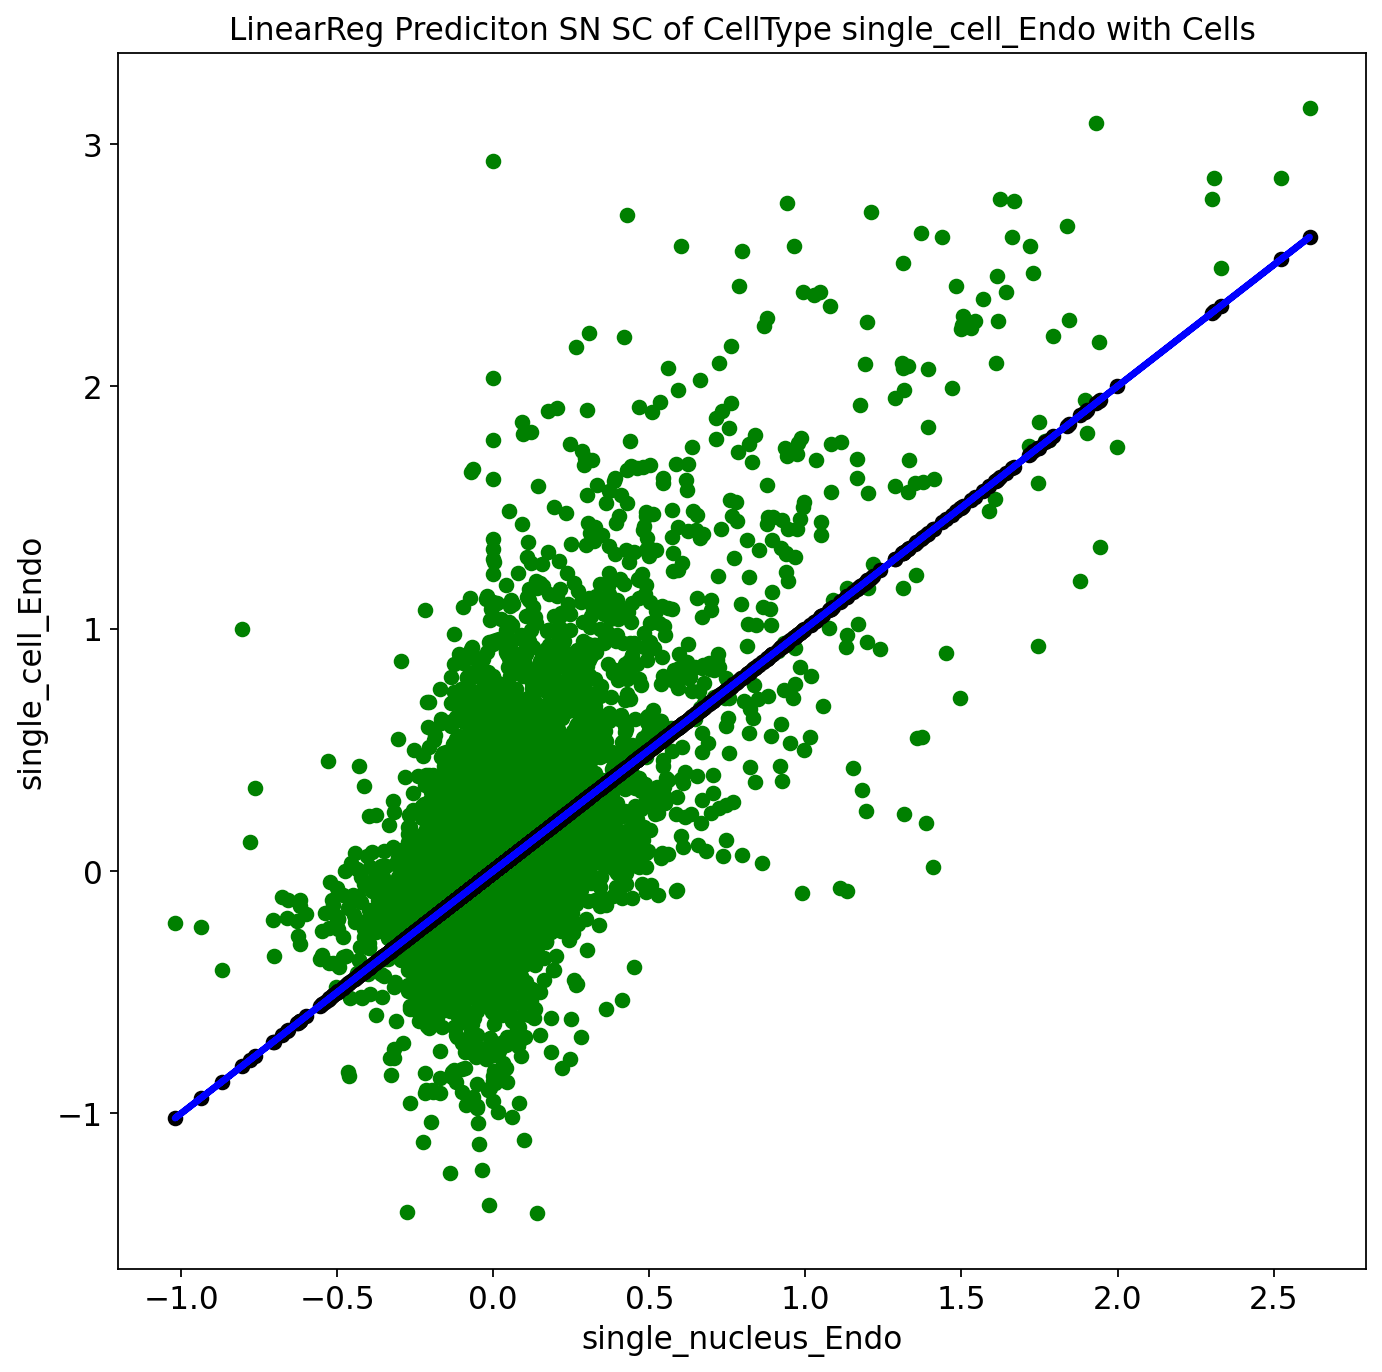

In [249]:
regr_Endo, x_train_Endo, y_train_Endo, x_test_Endo, y_test_Endo, y_pred_Endo = translator_fcn.linear_model_cellnum(single_adata, "orig_and_celltype", "single_nucleus_Endo", "single_cell_Endo", 0.2)

Coefficients: 
 [0.7351912]
Mean squared error: 0.13
Coefficient of determination: 0.14


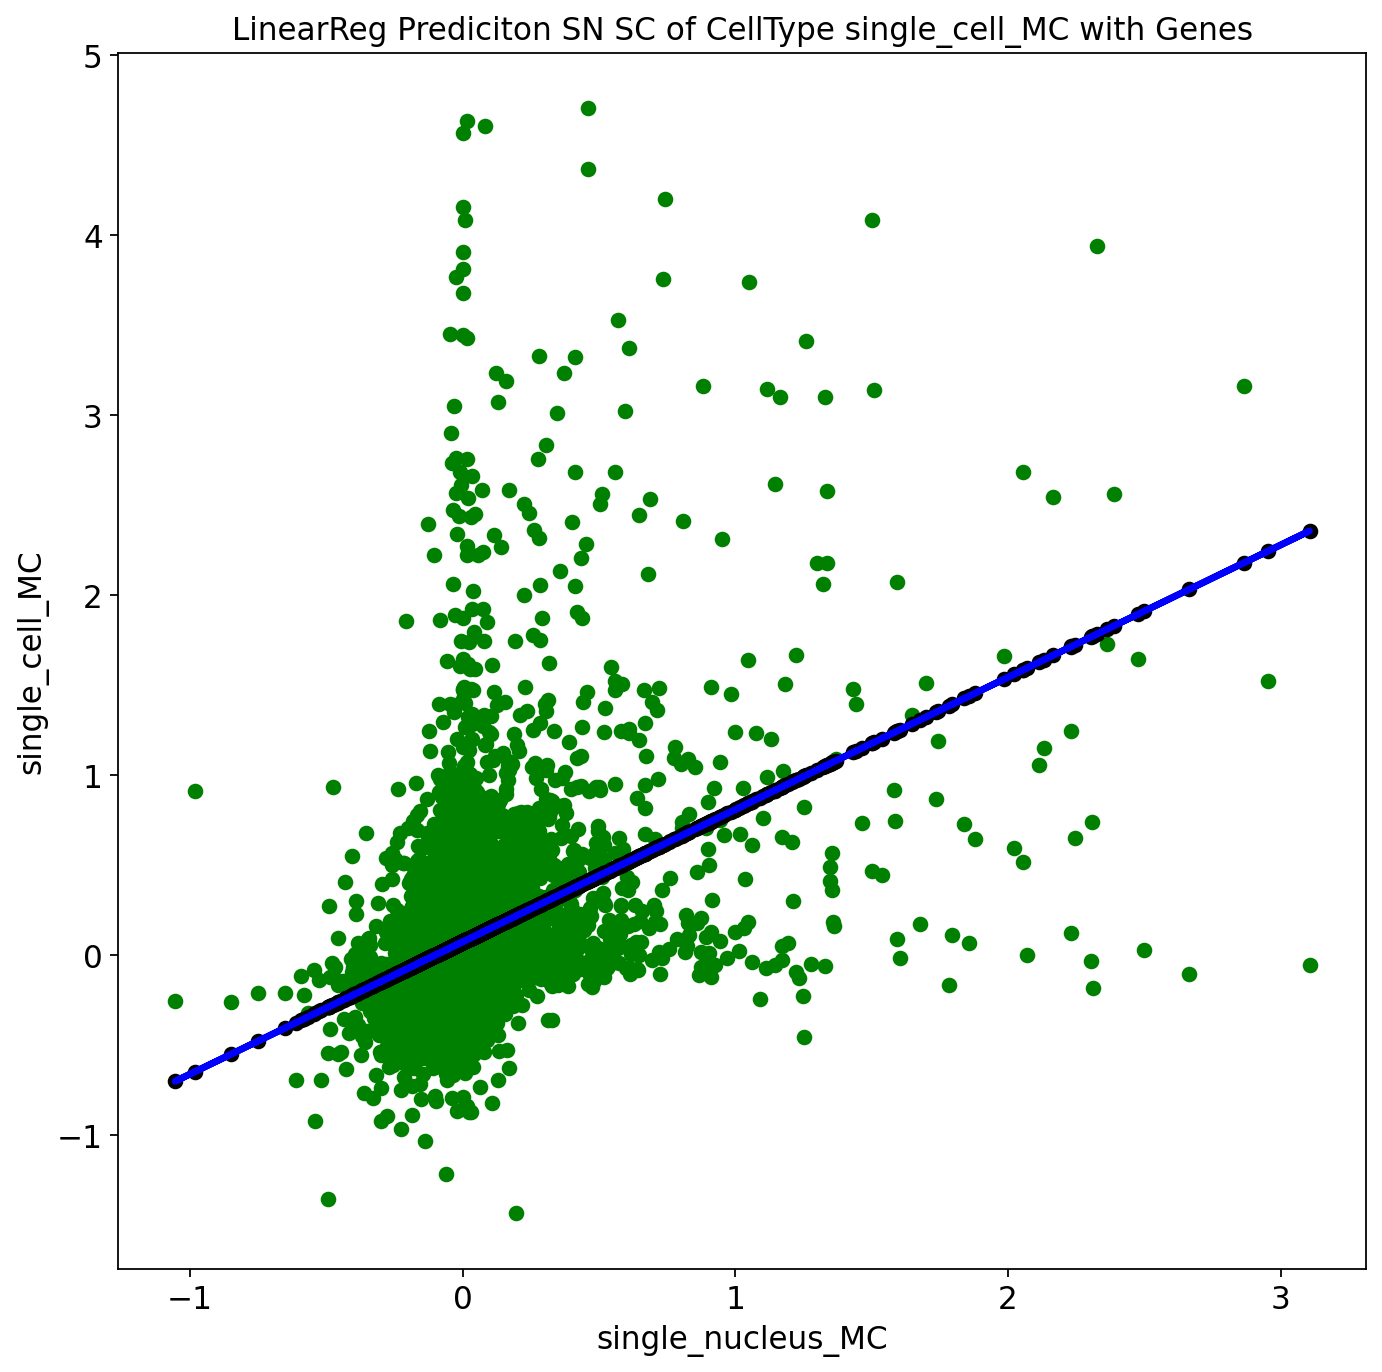

In [333]:
regr_MC_g, x_train_MC_g, y_train_MC_g, x_test_MC_g, y_test_MC_g, y_pred_MC_g = translator_fcn.linear_model_cell_genes(single_adata, "orig_and_celltype", "single_nucleus_MC", "single_cell_MC", 10000, 3000)

Coefficients: 
 [[1.0000004]]
Mean squared error: 0.19
Coefficient of determination: 0.01


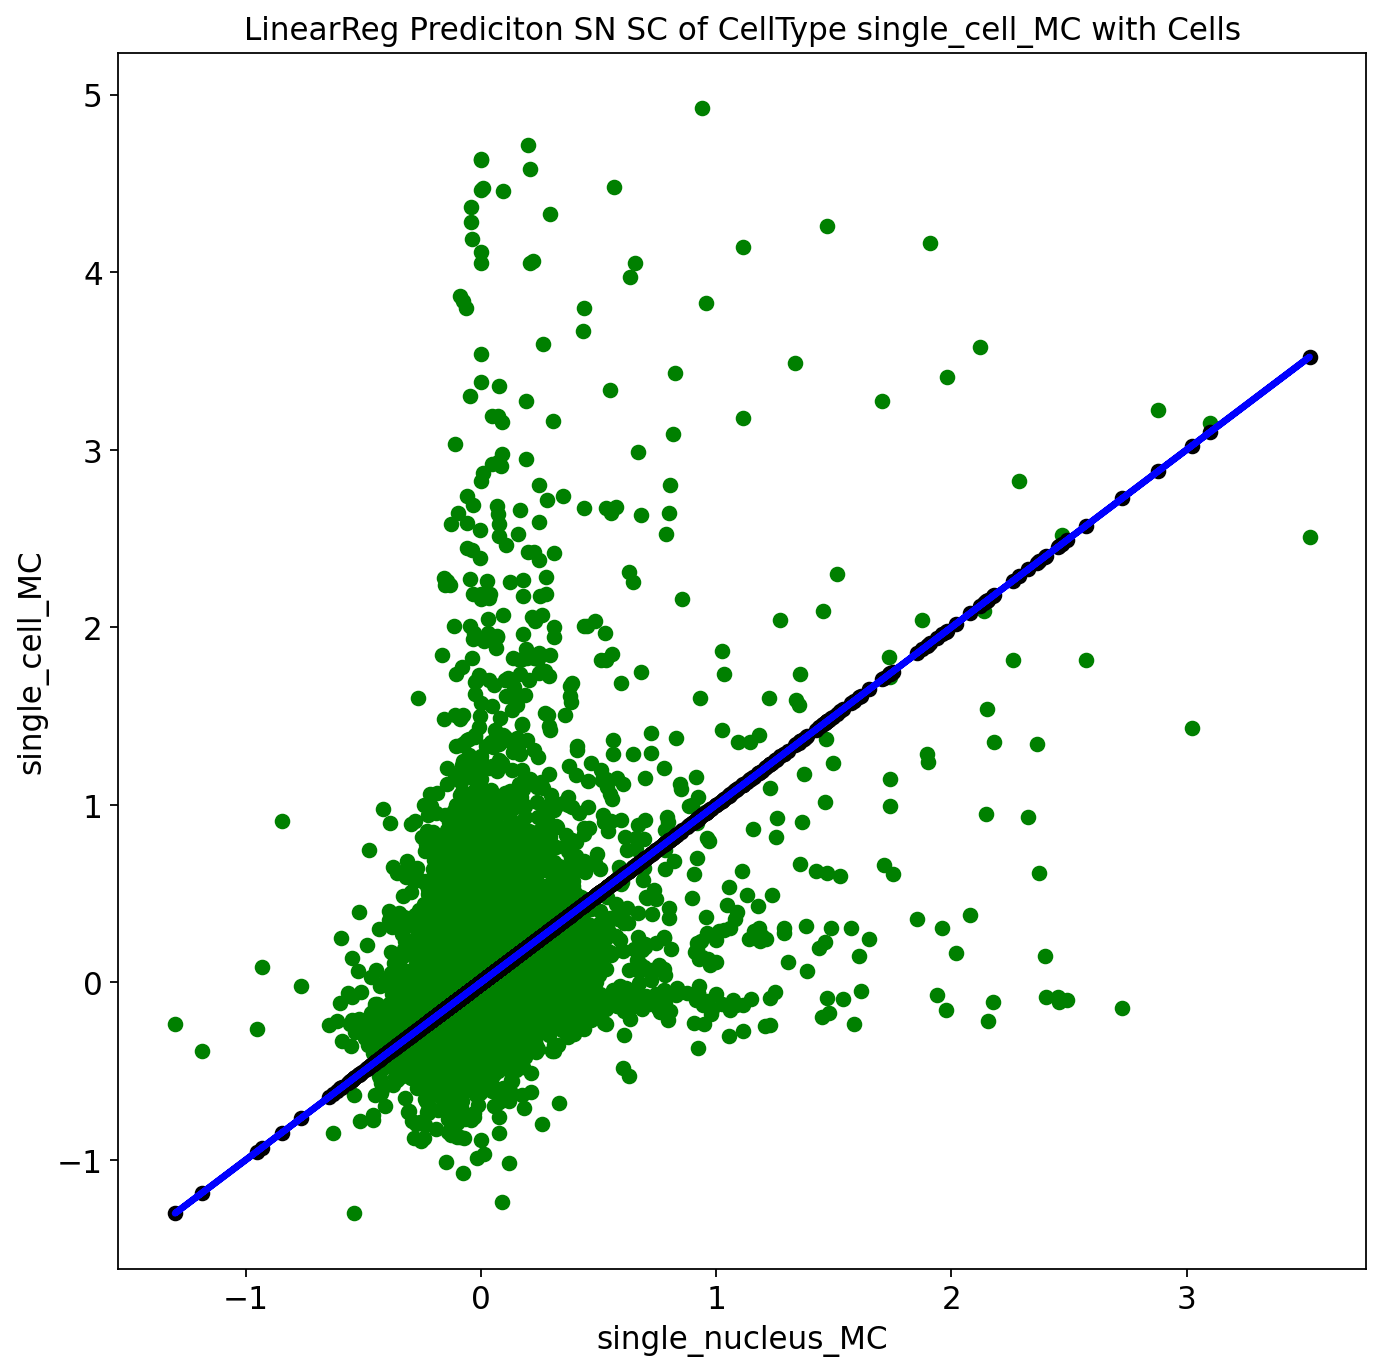

In [251]:
regr_MC, x_train_MC, y_train_MC, x_test_MC, y_test_MC, y_pred_MC = translator_fcn.linear_model_cellnum(single_adata, "orig_and_celltype", "single_nucleus_MC", "single_cell_MC", .2)

Coefficients: 
 [1.040792]
Mean squared error: 0.11
Coefficient of determination: 0.13


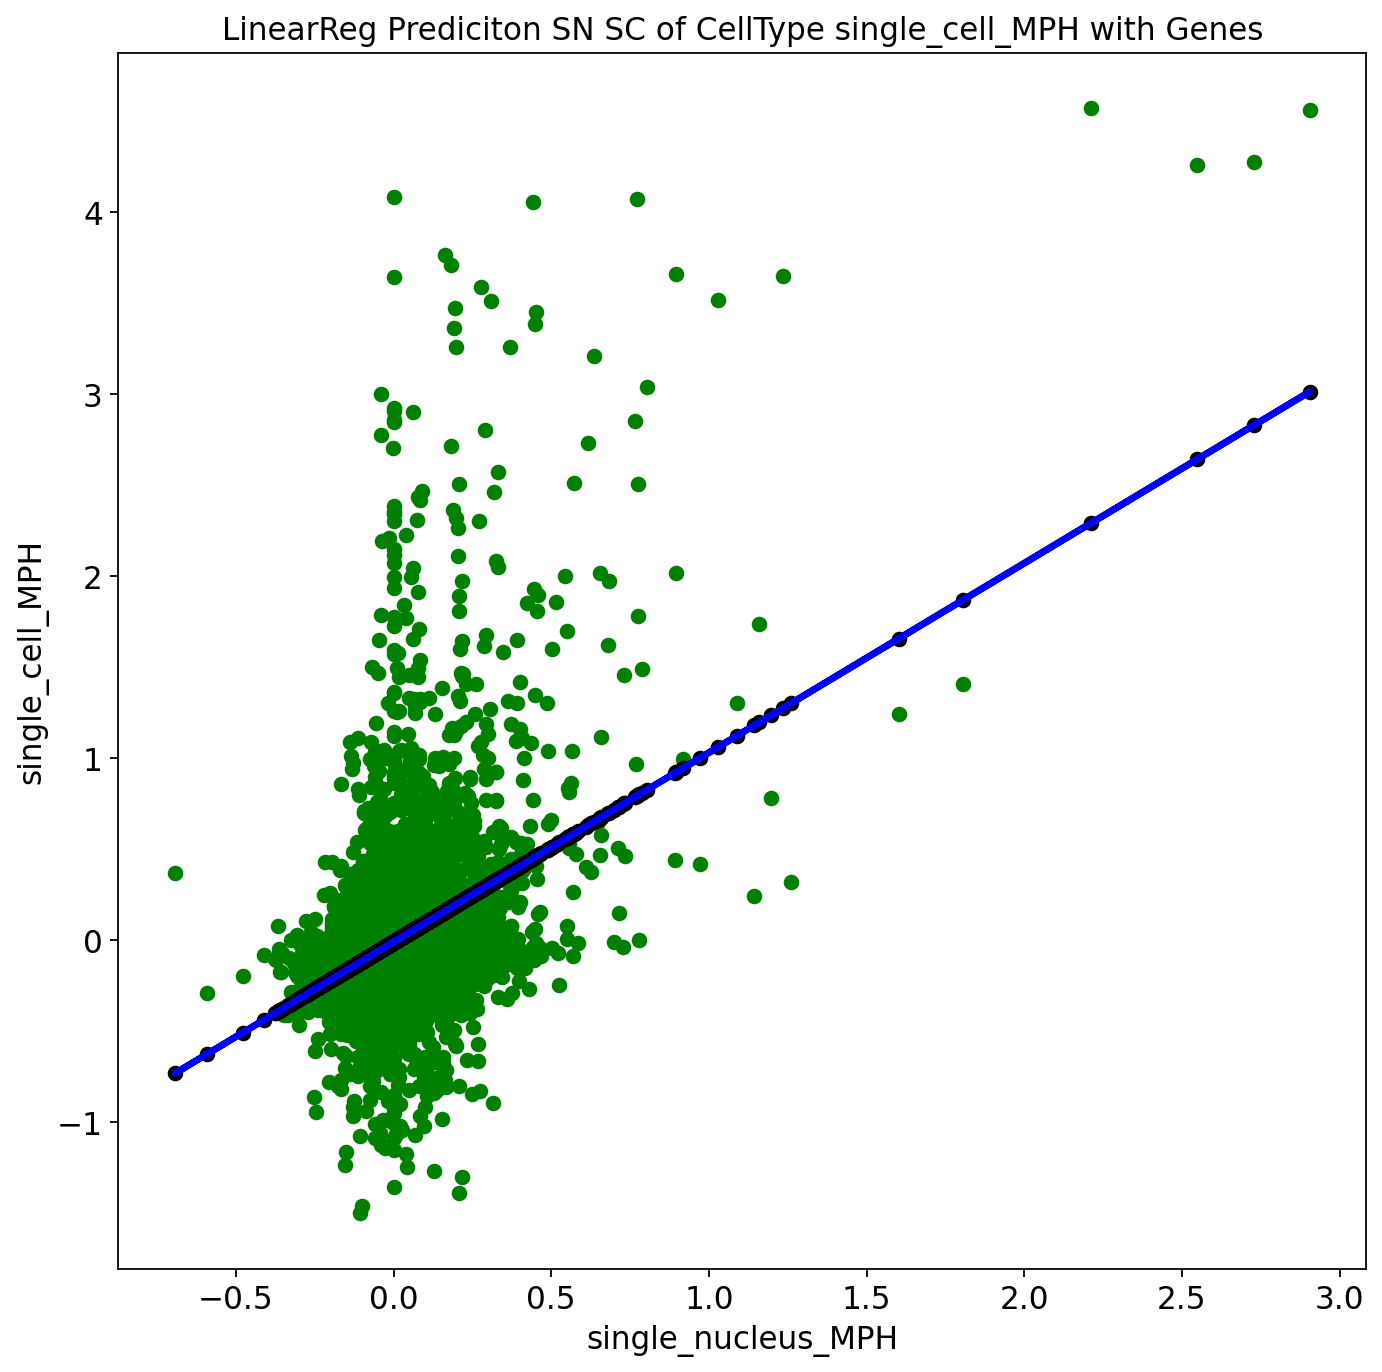

In [252]:
regr_MPH_g, x_train_MPH_g, y_train_MPH_g, x_test_MPH_g, y_test_MPH_g, y_pred_MPH_g = translator_fcn.linear_model_cell_gene(single_adata, "orig_and_celltype", "single_nucleus_MPH", "single_cell_MPH", 10000, 3000)

Coefficients: 
 [[0.9999997]]
Mean squared error: 0.16
Coefficient of determination: -0.12


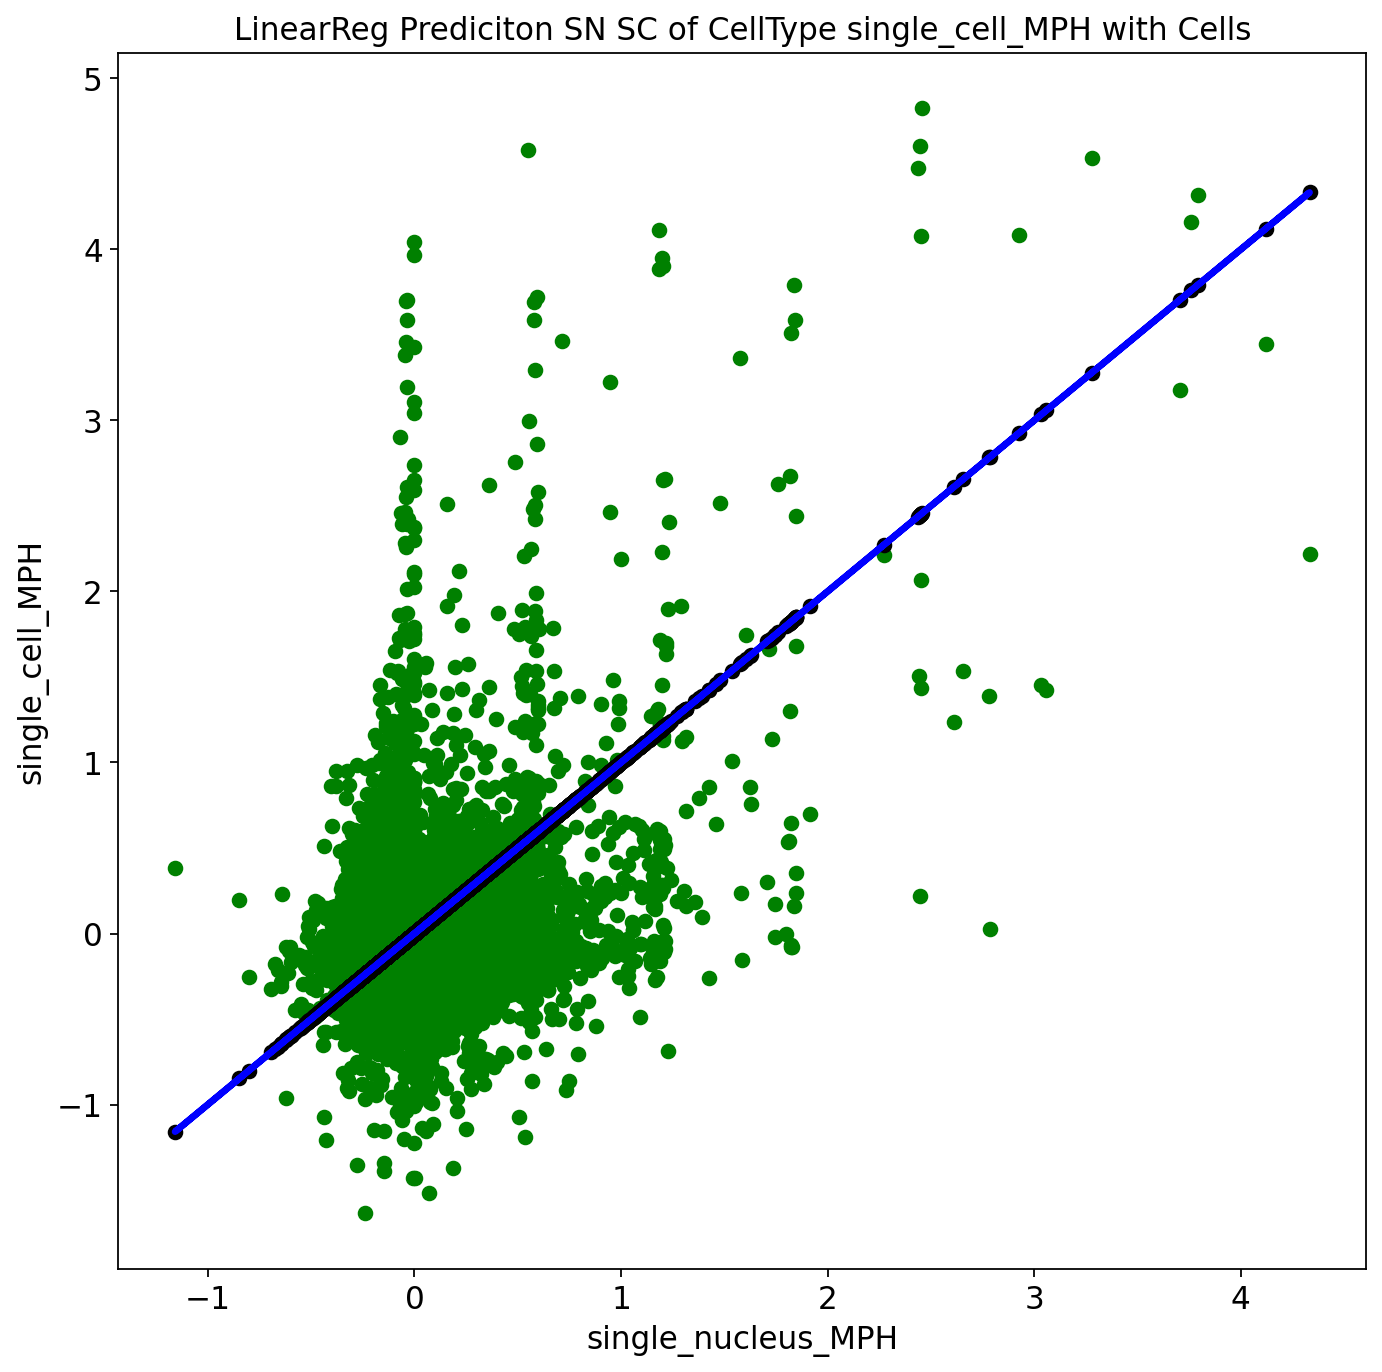

In [253]:
regr_MPH, x_train_MPH, y_train_MPH, x_test_MPH, y_test_MPH, y_pred_MPH = translator_fcn.linear_model_cellnum(single_adata, "orig_and_celltype", "single_nucleus_MPH", "single_cell_MPH", 0.2)

Coefficients: 
 [1.4936565]
Mean squared error: 0.01
Coefficient of determination: 0.43


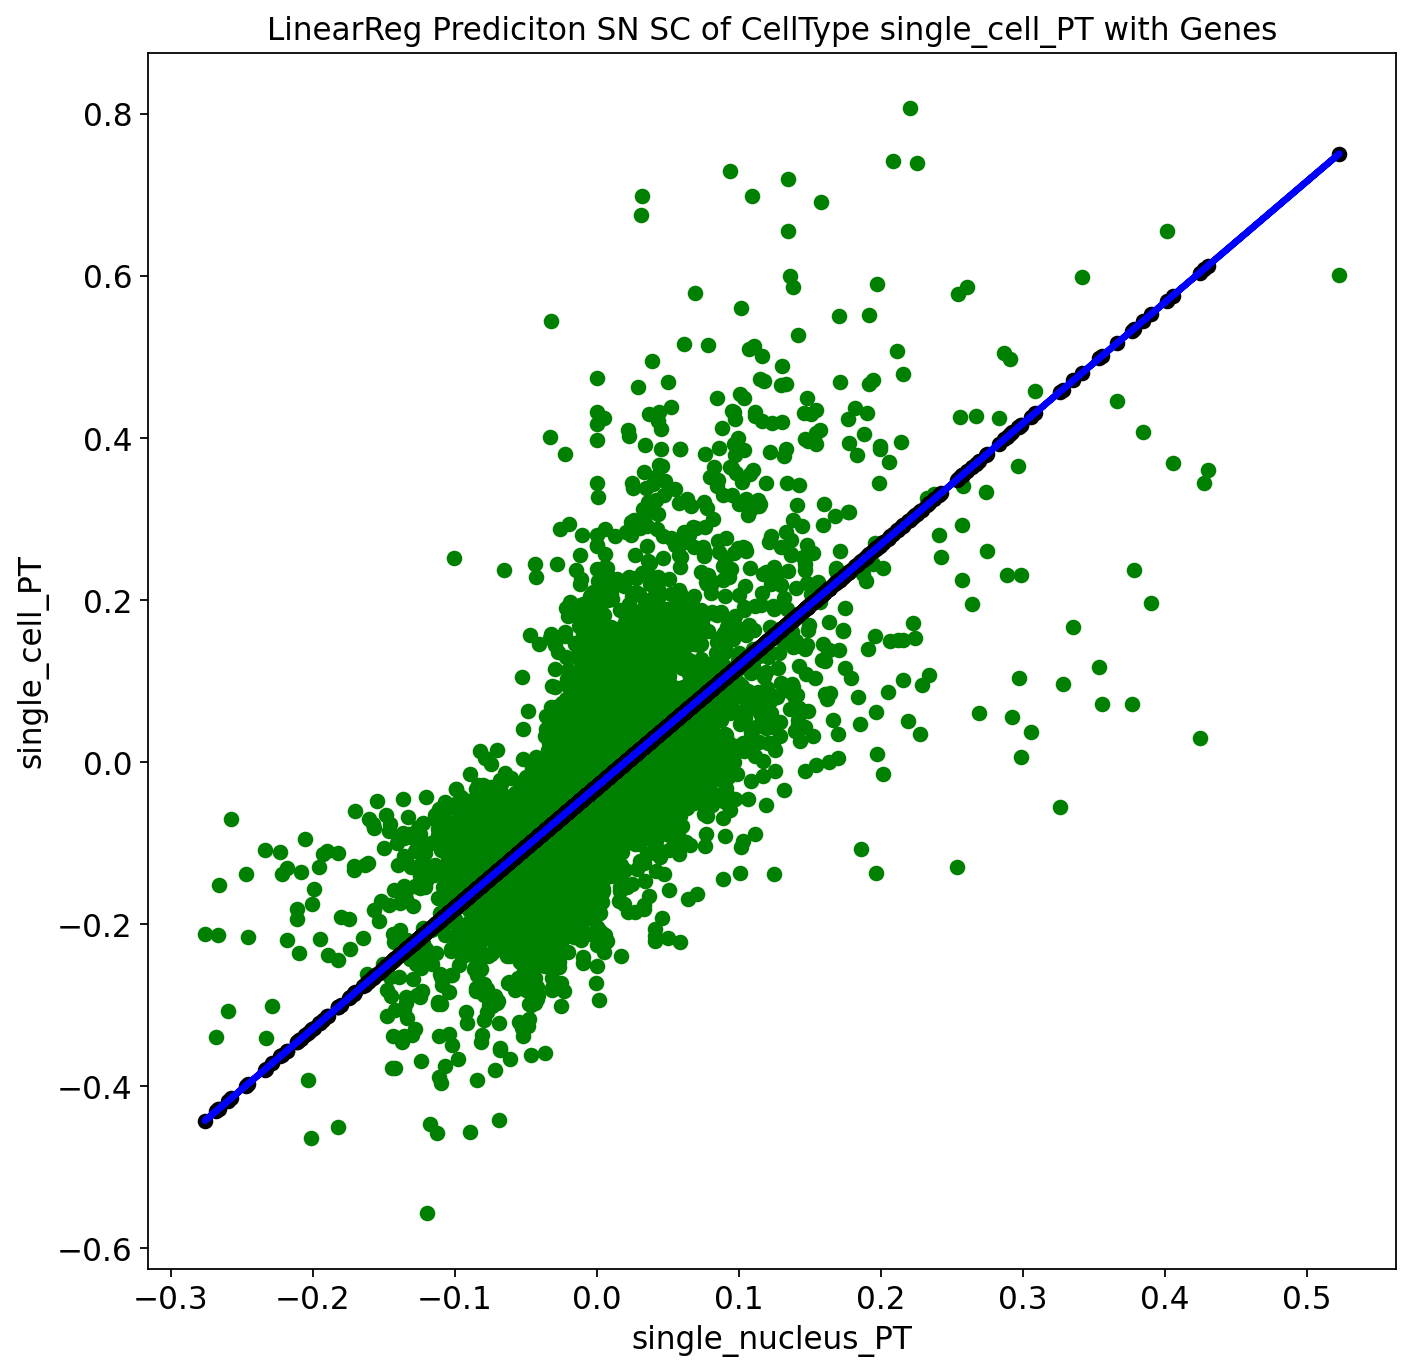

In [254]:
regr_PT_g, x_train_PT_g, y_train_PT_g, x_test_PT_g, y_test_PT_g, y_pred_PT_g = translator_fcn.linear_model_cell_gene(single_adata, "orig_and_celltype", "single_nucleus_PT", "single_cell_PT", 10000, 3000)

Coefficients: 
 [[1.0000002]]
Mean squared error: 0.01
Coefficient of determination: 0.26


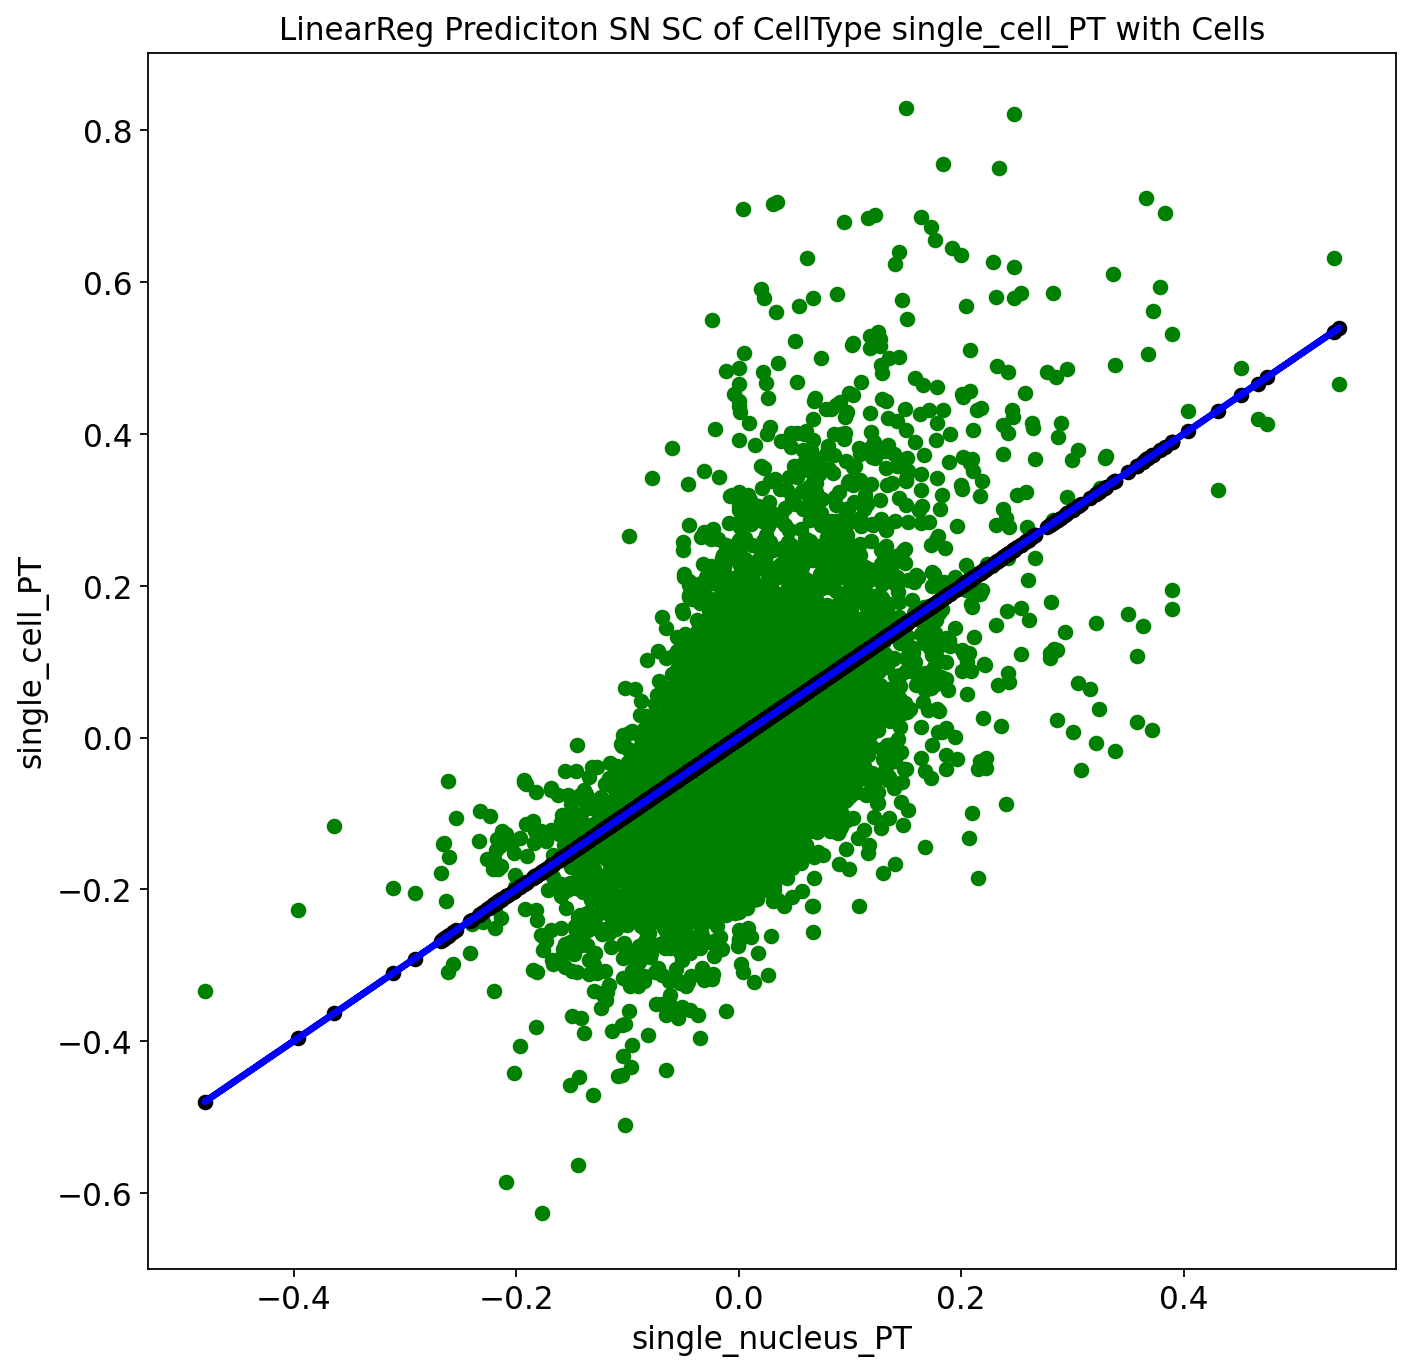

In [255]:
regr_PT, x_train_PT, y_train_PT, x_test_PT, y_test_PT, y_pred_PT = translator_fcn.linear_model_cellnum(single_adata, "orig_and_celltype", "single_nucleus_PT", "single_cell_PT", 0.2)

Coefficients: 
 [1.1100638]
Mean squared error: 0.13
Coefficient of determination: 0.41


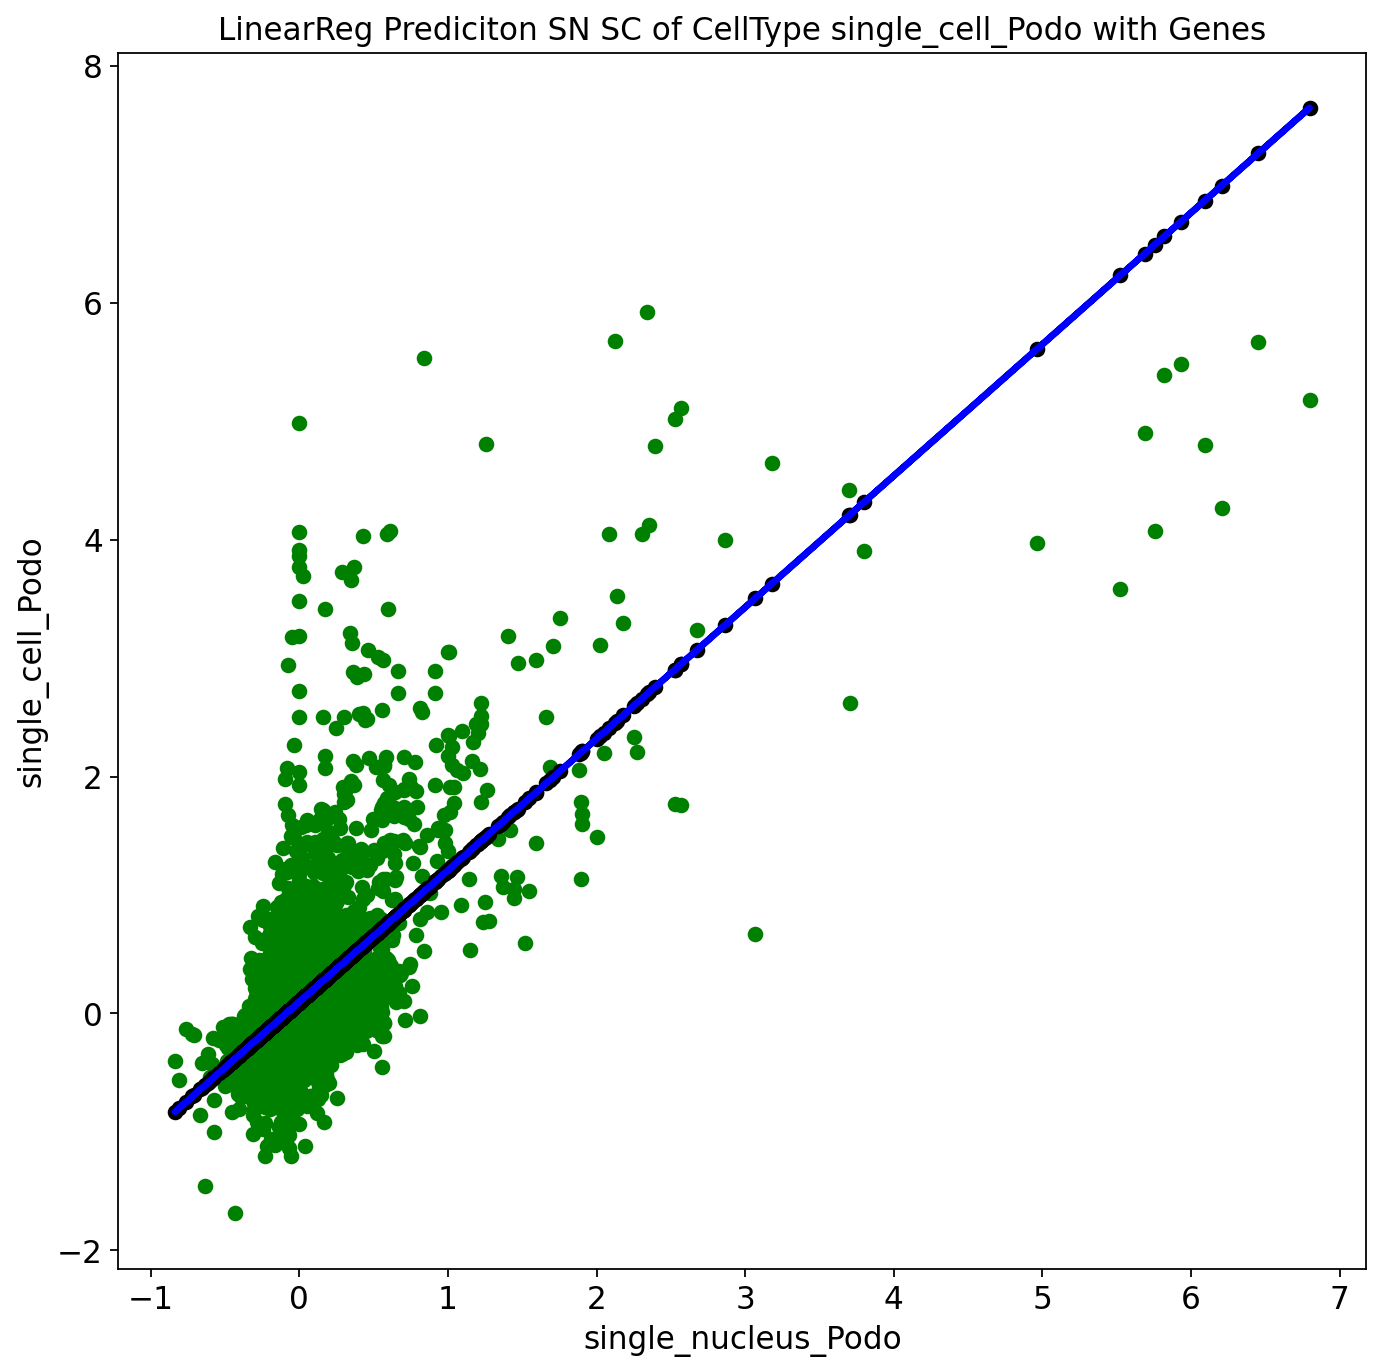

In [256]:
regr_Podo_g, x_train_Podo_g, y_train_Podo_g, x_test_Podo_g, y_test_Podo_g, y_pred_Podo_g = translator_fcn.linear_model_cell_gene(single_adata, "orig_and_celltype", "single_nucleus_Podo", "single_cell_Podo", 10000, 3000)

Coefficients: 
 [[0.9999996]]
Mean squared error: 0.24
Coefficient of determination: 0.10


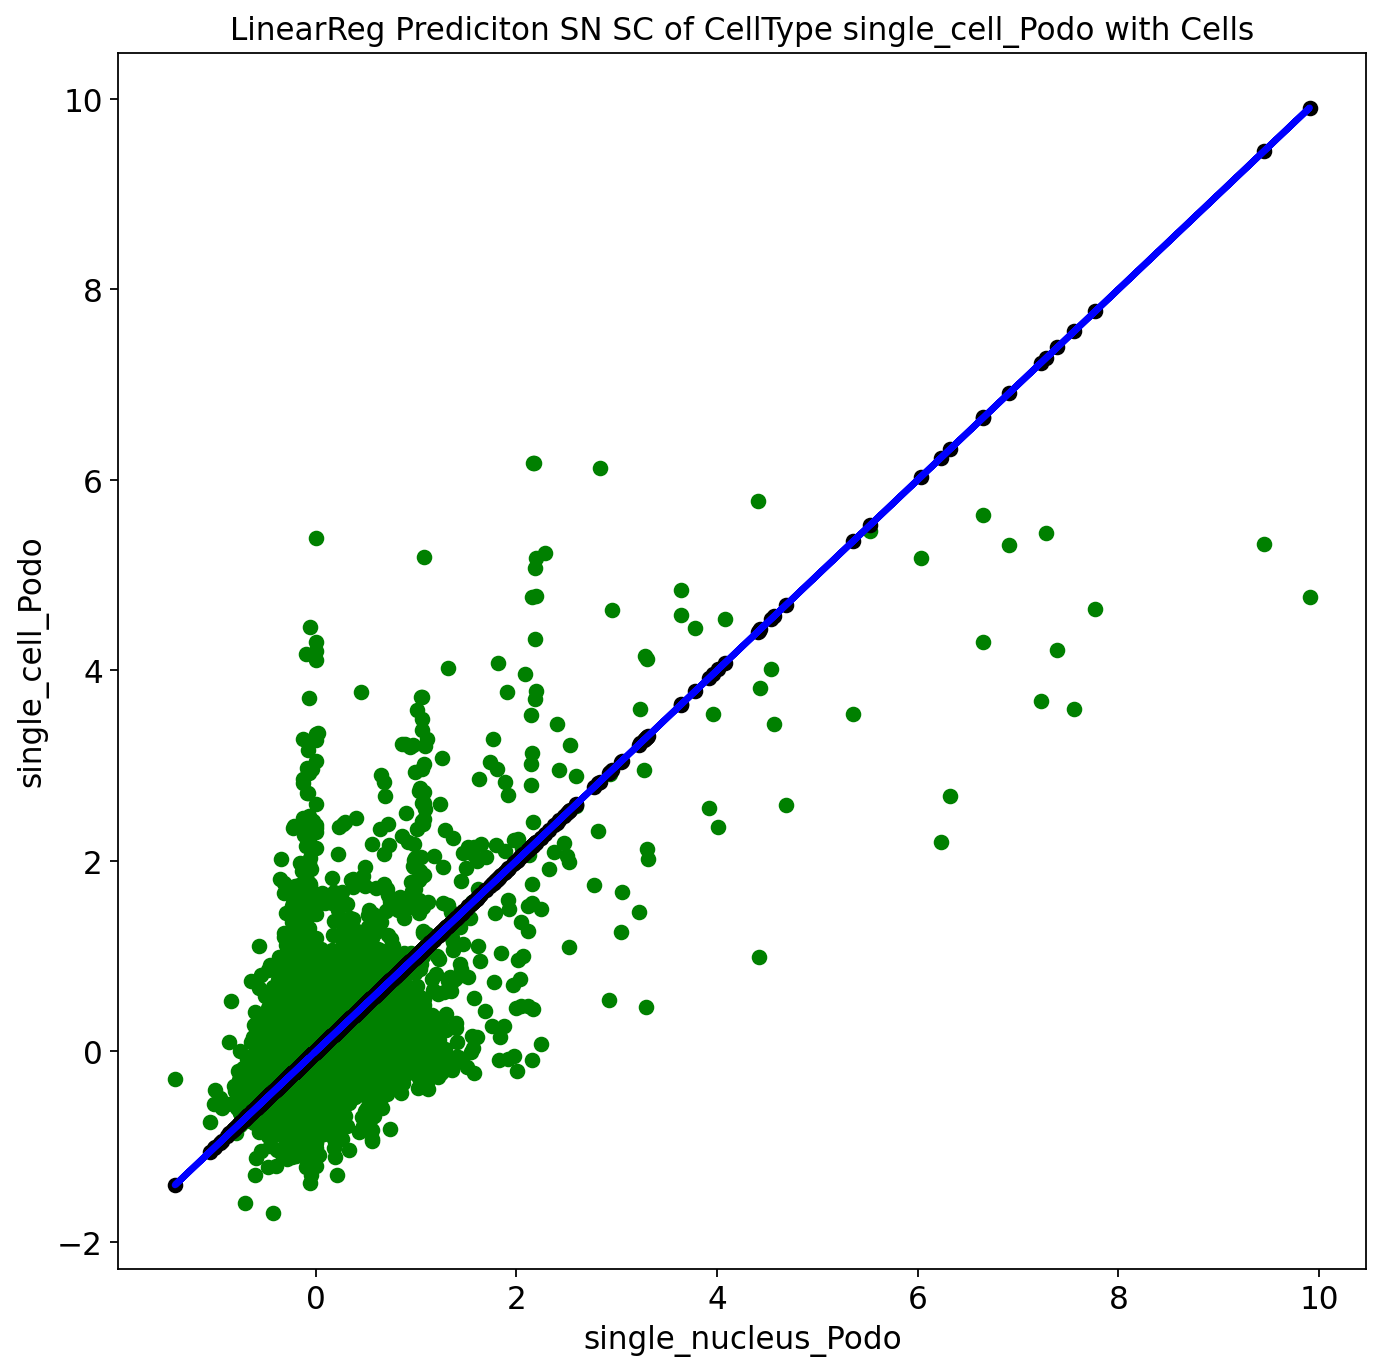

In [257]:
regr_Podo, x_train_Podo, y_train_Podo, x_test_Podo, y_test_Podo, y_pred_Podo = translator_fcn.linear_model_cellnum(single_adata, "orig_and_celltype", "single_nucleus_Podo", "single_cell_Podo", 0.2)

Coefficients: 
 [1.4443864]
Mean squared error: 0.02
Coefficient of determination: 0.48


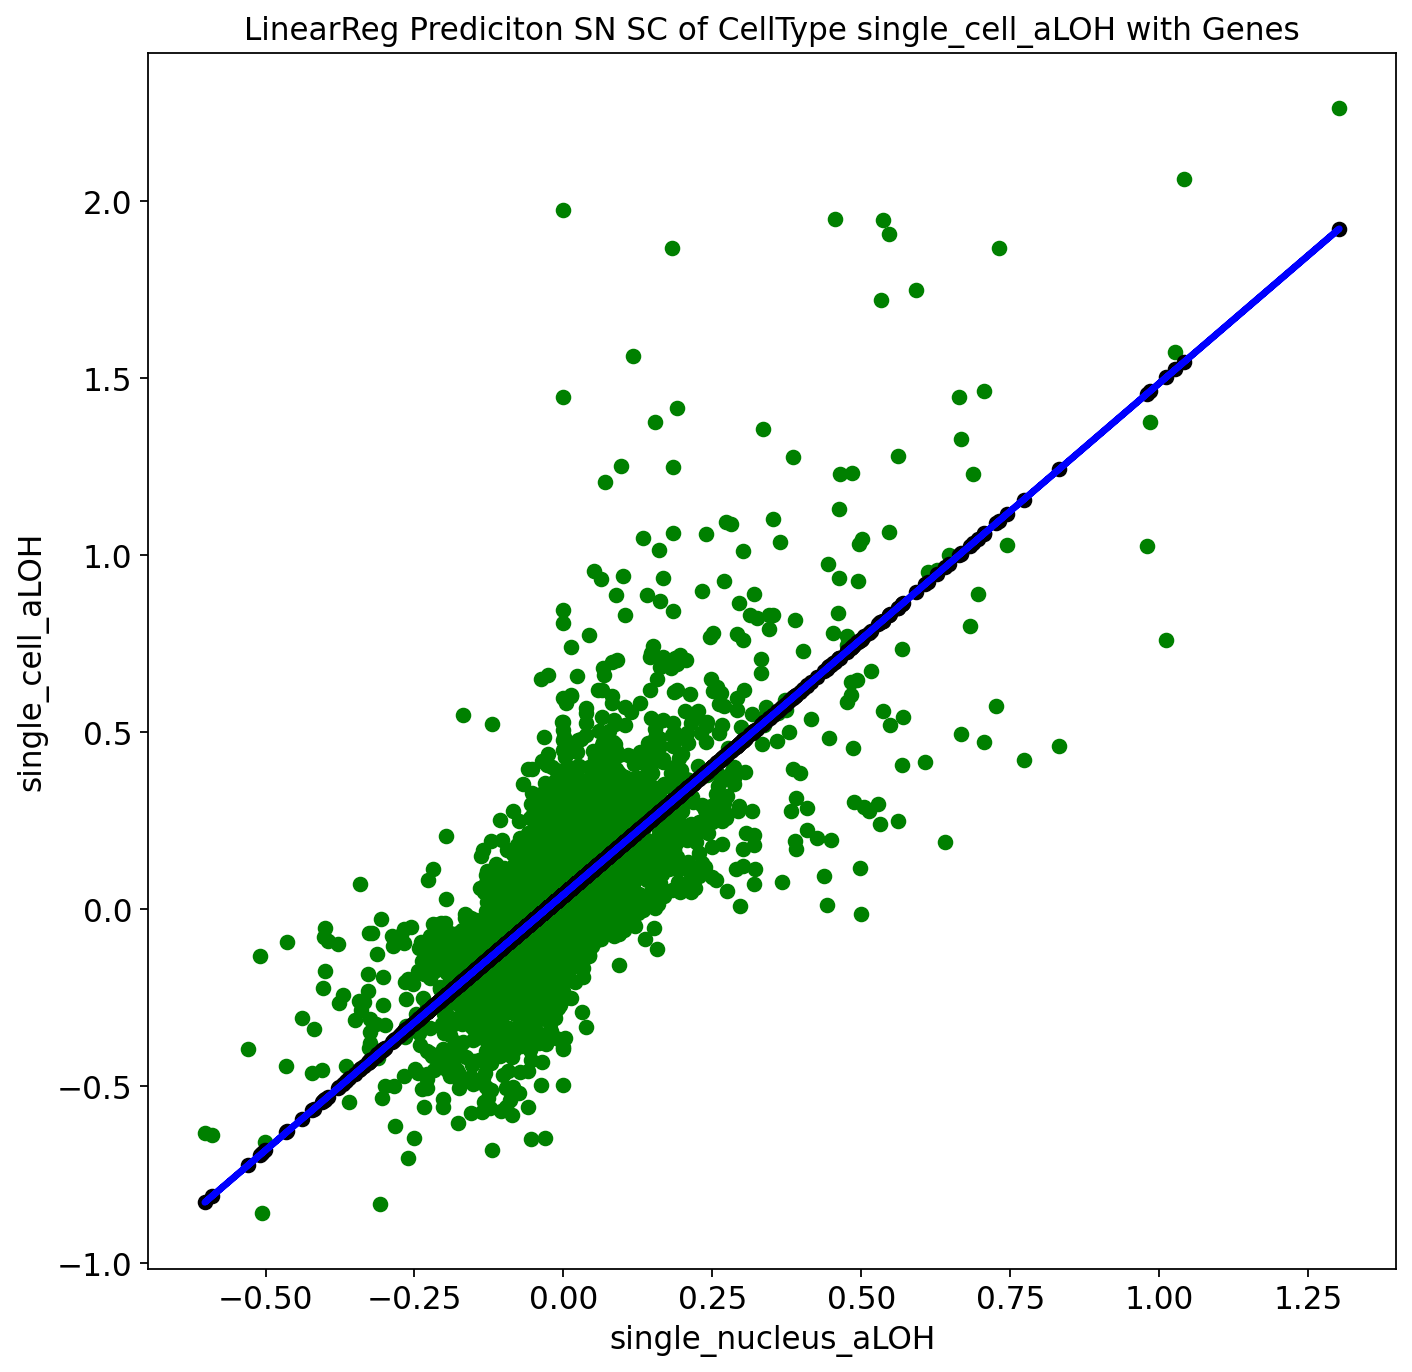

In [258]:
regr_aLOH_g, x_train_aLOH_g, y_train_aLOH_g, x_test_aLOH_g, y_test_aLOH_g, y_pred_aLOH_g = translator_fcn.linear_model_cell_gene(single_adata, "orig_and_celltype", "single_nucleus_aLOH", "single_cell_aLOH", 10000, 3000)

Coefficients: 
 [[0.9999999]]
Mean squared error: 0.03
Coefficient of determination: 0.28


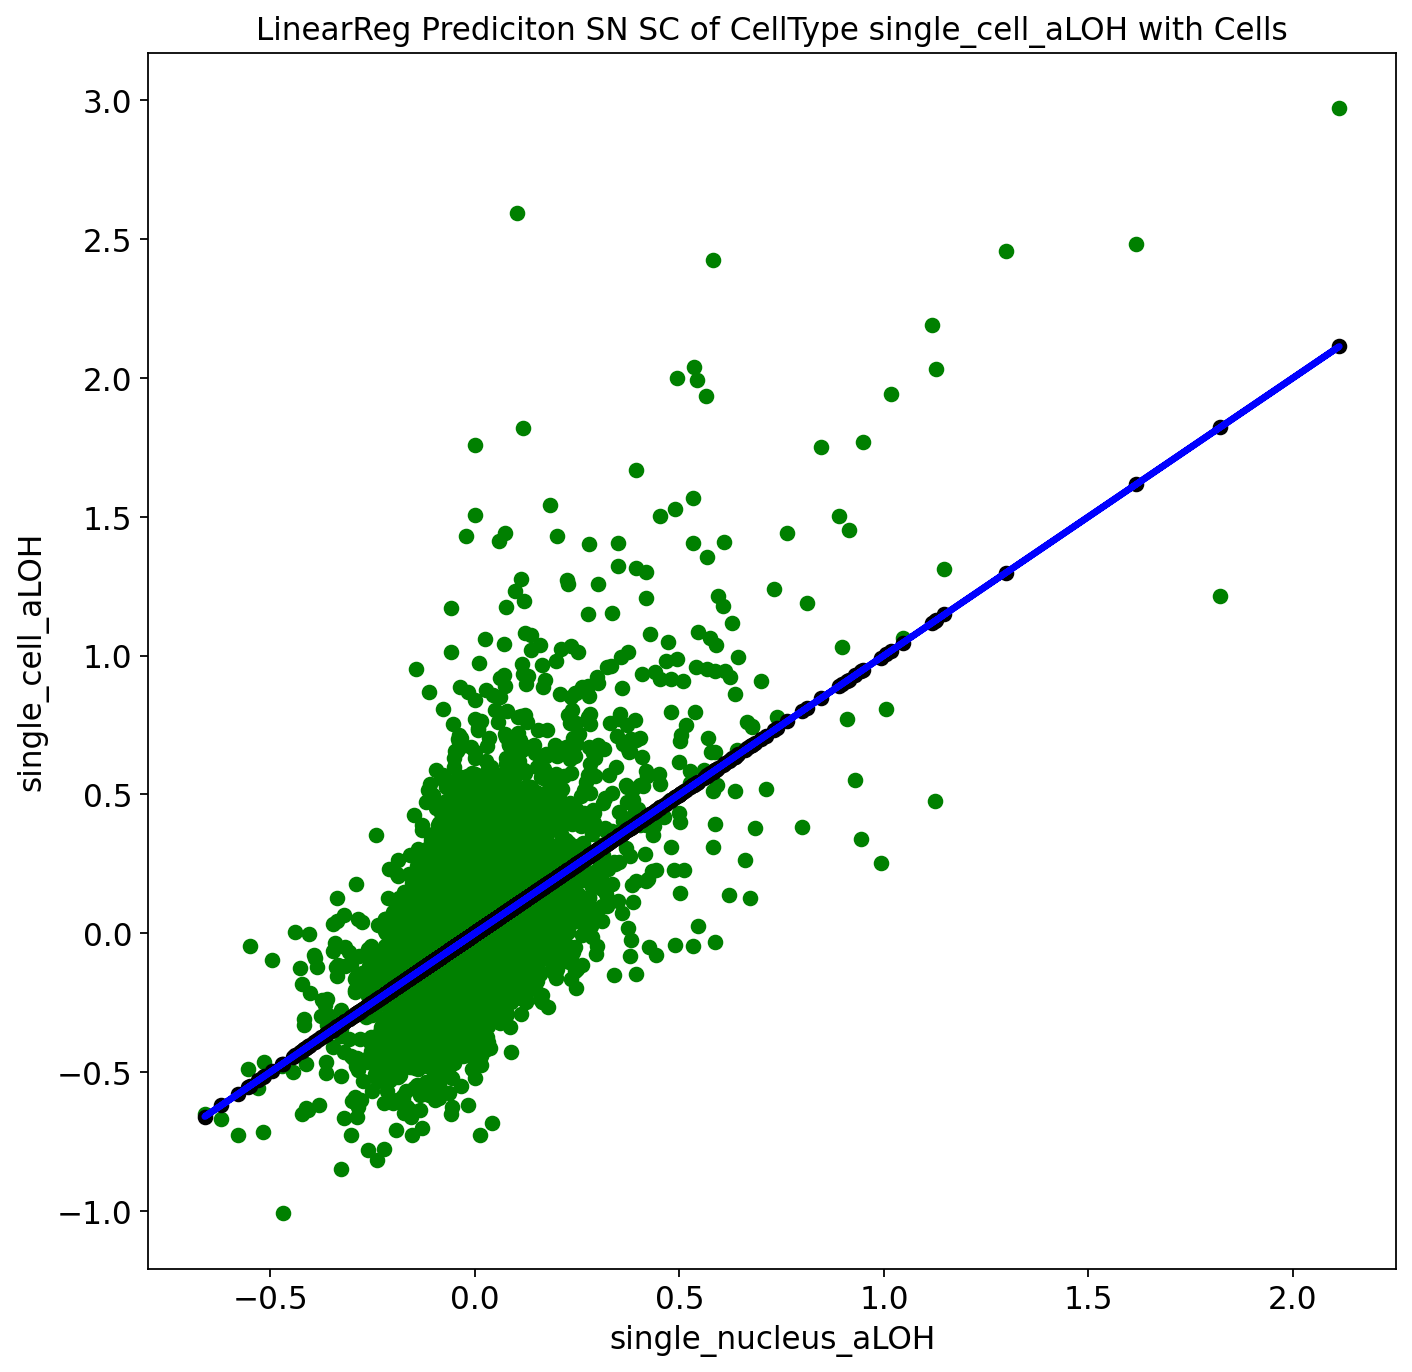

In [259]:
regr_aLOH, x_train_aLOH, y_train_aLOH, x_test_aLOH, y_test_aLOH, y_pred_aLOH = translator_fcn.linear_model_cellnum(single_adata, "orig_and_celltype", "single_nucleus_aLOH", "single_cell_aLOH", 0.2)

Calculating and Plotting Pearson and MSE for each:

In [260]:
#calculate and save pearon correlations
values_df = pd.DataFrame(columns=matching_celltypes, index=["PearsonCorr", "MeanSqError" ,"PearsonCorr_g", "MeanSqError_g"])

values_df["CD_IC"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_CD_IC), np.squeeze(y_pred_CD_IC))[0]

values_df["CD_PC"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_CD_PC), np.squeeze(y_pred_CD_PC))[0]

values_df["CNT"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_CNT), np.squeeze(y_pred_CNT))[0]

values_df["DCT"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_DCT), np.squeeze(y_pred_DCT))[0]

values_df["Endo"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_Endo), np.squeeze(y_pred_Endo))[0]

values_df["MC"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_MC), np.squeeze(y_pred_MC))[0]

values_df["MPH"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_MPH), np.squeeze(y_pred_MPH))[0]

values_df["PT"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_PT), np.squeeze(y_pred_PT))[0]

values_df["Podo"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_Podo), np.squeeze(y_pred_Podo))[0]

values_df["aLOH"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_aLOH), np.squeeze(y_pred_aLOH))[0]

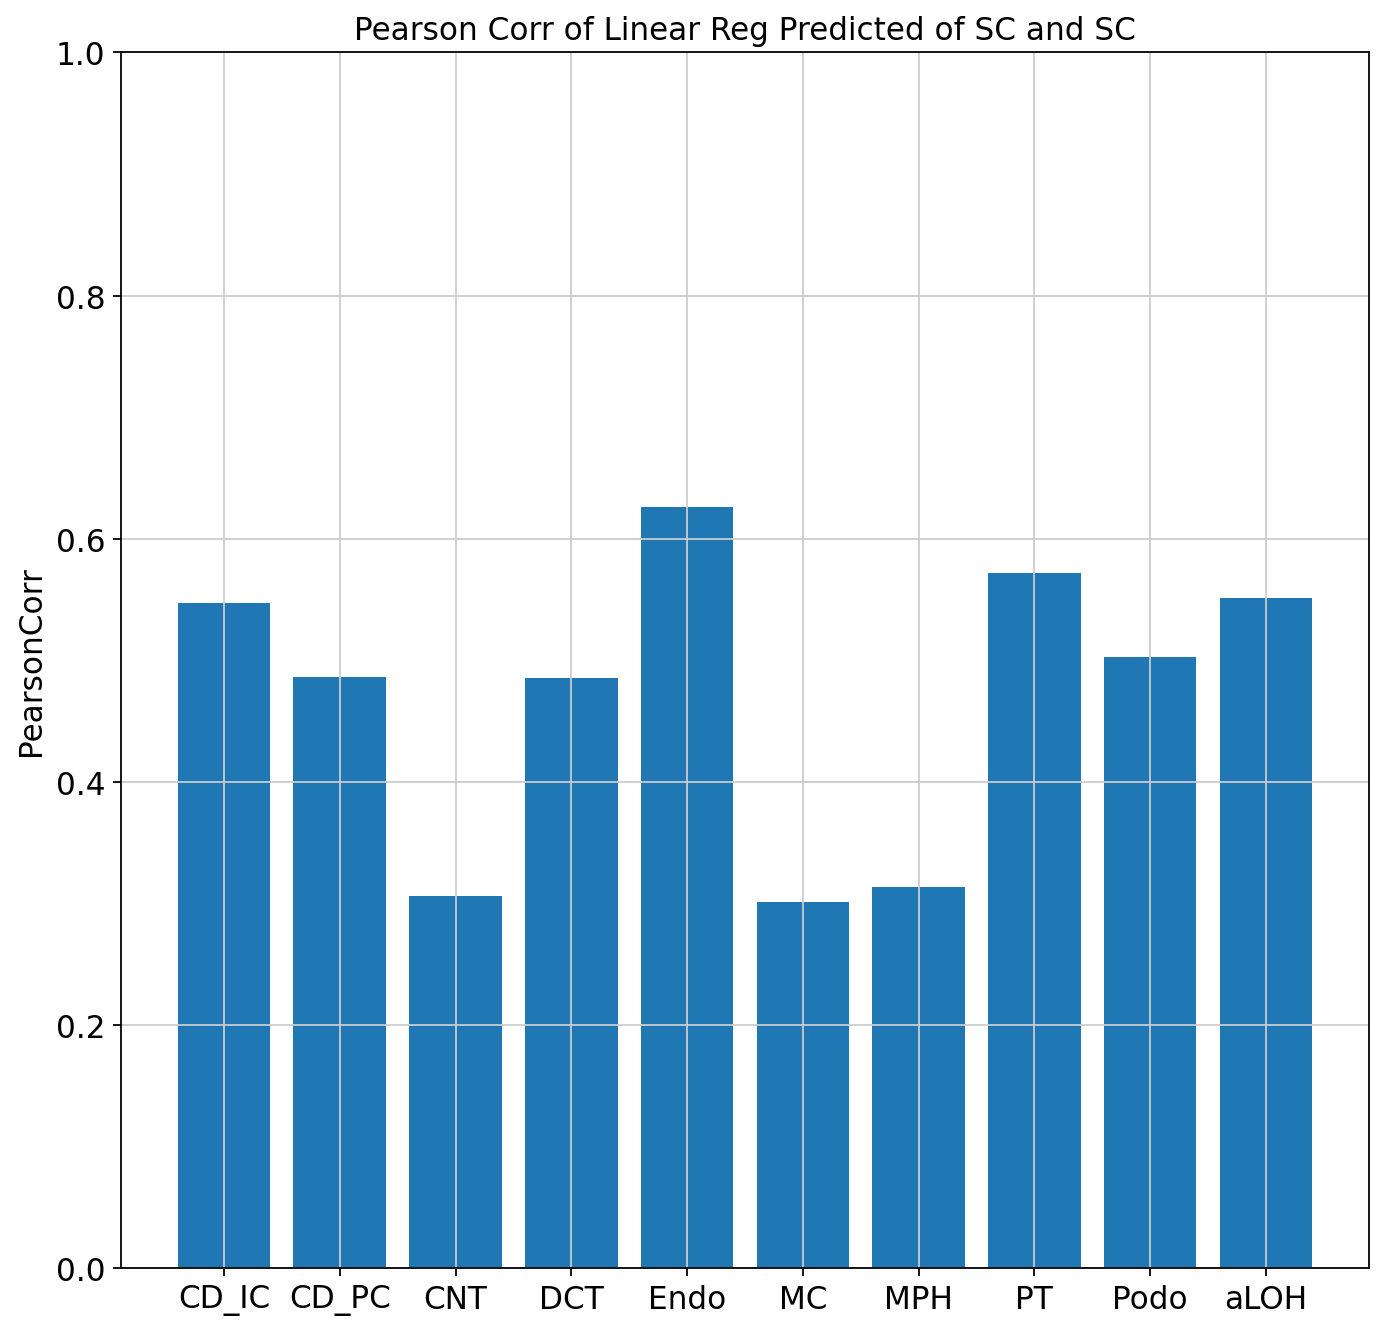

In [261]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
titles = values_df.columns
counts = values_df.iloc[0]
bar_labels = values_df.columns

ax.bar(titles, counts, label=bar_labels)
ax.set_ylim([0,1])
ax.set_ylabel(values_df.iloc[0].name)
ax.set_title('Pearson Corr of Linear Reg Predicted of SC and SC')

plt.show()

In [262]:
#calculate and save MSEs
values_df["CD_IC"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_CD_IC, y_pred_CD_IC)

values_df["CD_PC"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_CD_PC, y_pred_CD_PC)

values_df["CNT"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_CNT, y_pred_CNT)

values_df["DCT"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_DCT, y_pred_DCT)

values_df["Endo"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_Endo, y_pred_Endo)

values_df["MC"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_MC, y_pred_MC)

values_df["MPH"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_MPH, y_pred_MPH)

values_df["PT"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_PT, y_pred_PT)

values_df["Podo"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_Podo, y_pred_Podo)

values_df["aLOH"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_aLOH, y_pred_aLOH)

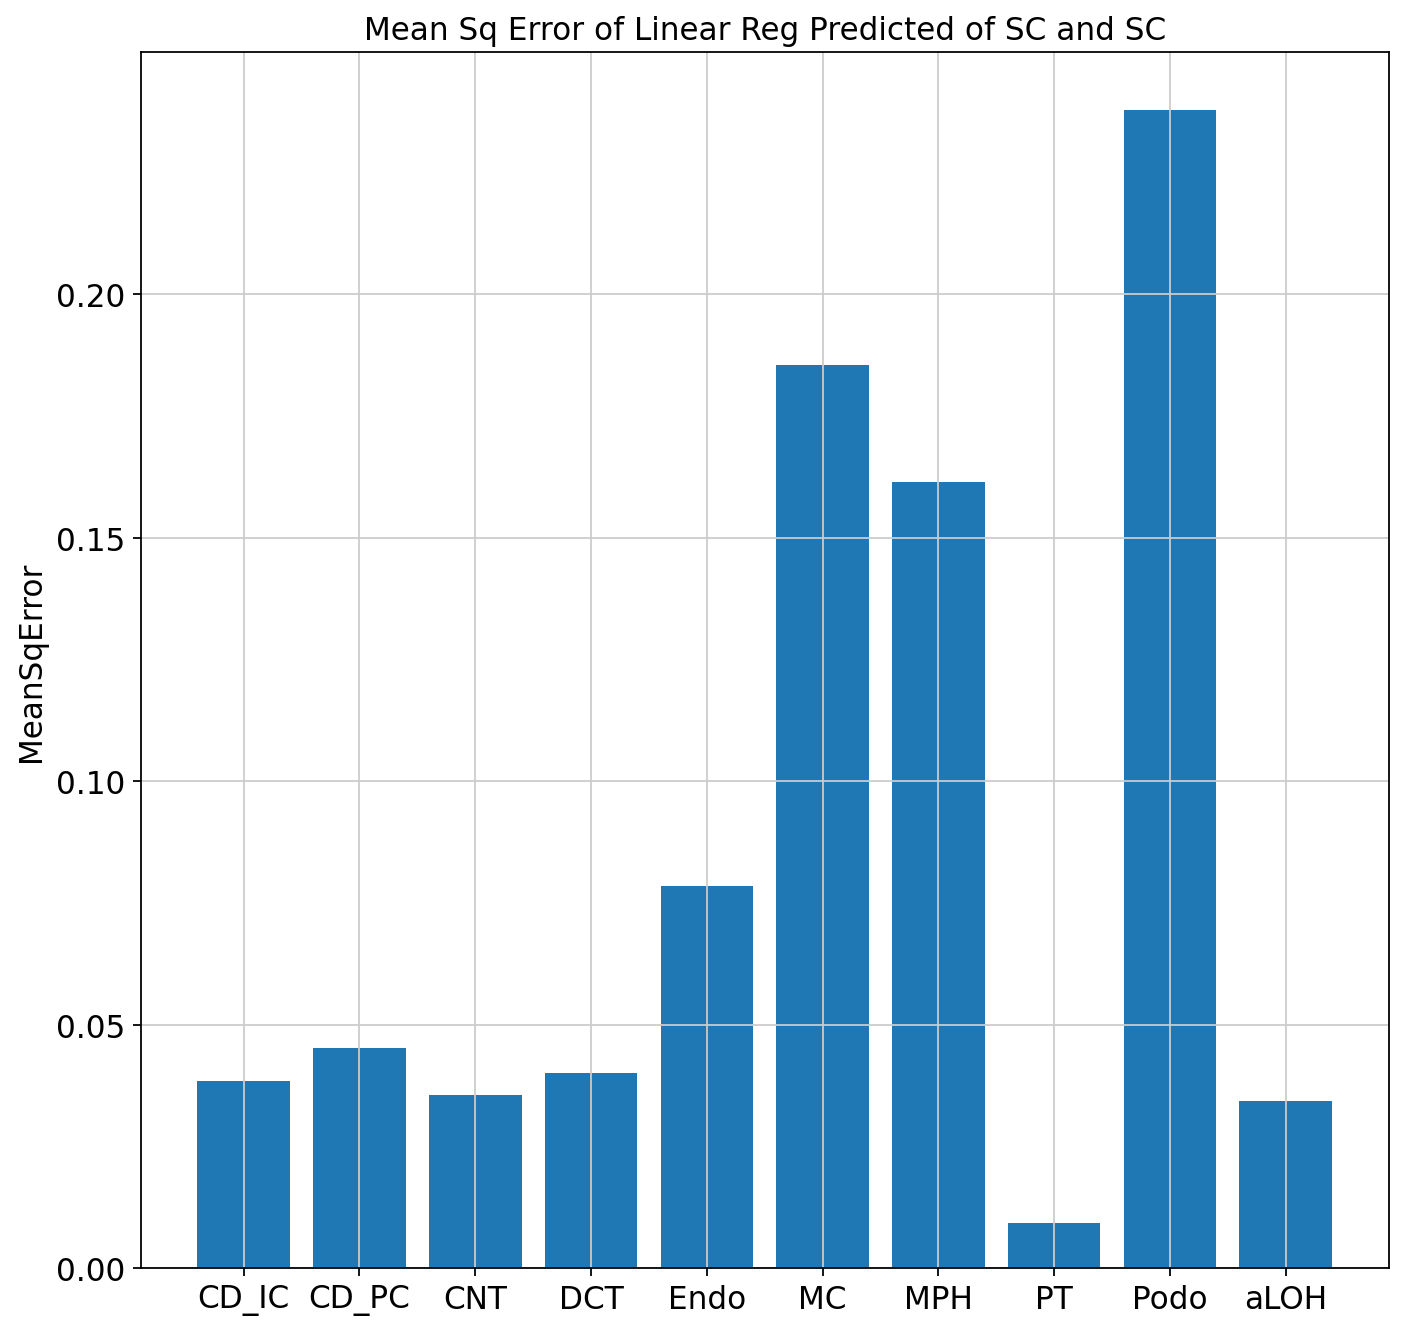

In [263]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
titles = values_df.columns
counts = values_df.iloc[1]
bar_labels = values_df.columns

ax.bar(titles, counts, label=bar_labels)
ax.set_ylabel(values_df.iloc[1].name)
ax.set_title('Mean Sq Error of Linear Reg Predicted of SC and SC')

plt.show()

In [264]:
#calculate and save pearon correlations

values_df["CD_IC"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_CD_IC_g), np.squeeze(y_pred_CD_IC_g))[0]

values_df["CD_PC"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_CD_PC_g), np.squeeze(y_pred_CD_PC_g))[0]

values_df["CNT"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_CNT_g), np.squeeze(y_pred_CNT_g))[0]

values_df["DCT"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_DCT_g), np.squeeze(y_pred_DCT_g))[0]

values_df["Endo"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_Endo_g), np.squeeze(y_pred_Endo_g))[0]

values_df["MC"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_MC_g), np.squeeze(y_pred_MC_g))[0]

values_df["MPH"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_MPH_g), np.squeeze(y_pred_MPH_g))[0]

values_df["PT"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_PT_g), np.squeeze(y_pred_PT_g))[0]

values_df["Podo"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_Podo_g), np.squeeze(y_pred_Podo_g))[0]

values_df["aLOH"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_aLOH_g), np.squeeze(y_pred_aLOH_g))[0]

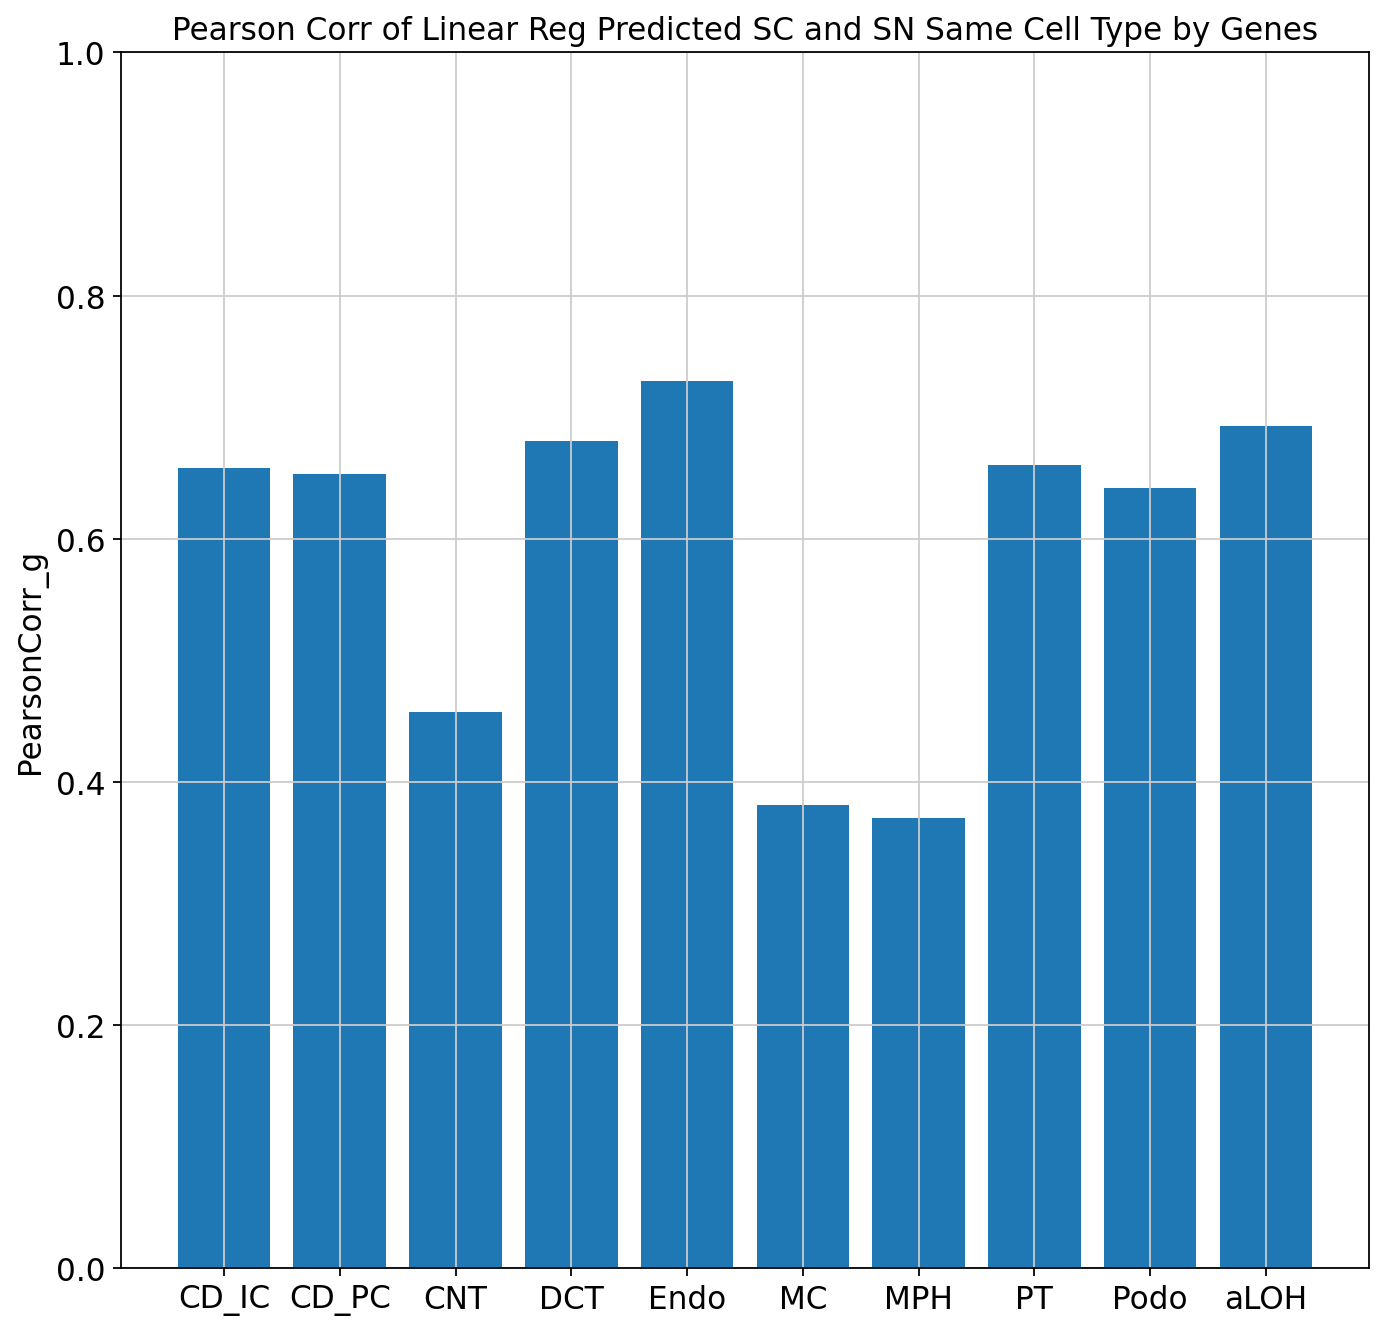

In [265]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
titles = values_df.columns
counts = values_df.iloc[2]
bar_labels = values_df.columns

ax.bar(titles, counts, label=bar_labels)
ax.set_ylim([0,1])
ax.set_ylabel(values_df.iloc[2].name)
ax.set_title('Pearson Corr of Linear Reg Predicted SC and SN Same Cell Type by Genes')

plt.show()

In [266]:
#calculate and save pearon correlations
values_df["CD_IC"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_CD_IC_g, y_pred_CD_IC_g)

values_df["CD_PC"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_CD_PC_g, y_pred_CD_PC_g)

values_df["CNT"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_CNT_g, y_pred_CNT_g)

values_df["DCT"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_DCT_g, y_pred_DCT_g)

values_df["Endo"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_Endo_g, y_pred_Endo_g)

values_df["MC"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_MC_g, y_pred_MC_g)

values_df["MPH"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_MPH_g, y_pred_MPH_g)

values_df["PT"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_PT_g, y_pred_PT_g)

values_df["Podo"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_Podo_g, y_pred_Podo_g)

values_df["aLOH"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_aLOH_g, y_pred_aLOH_g)

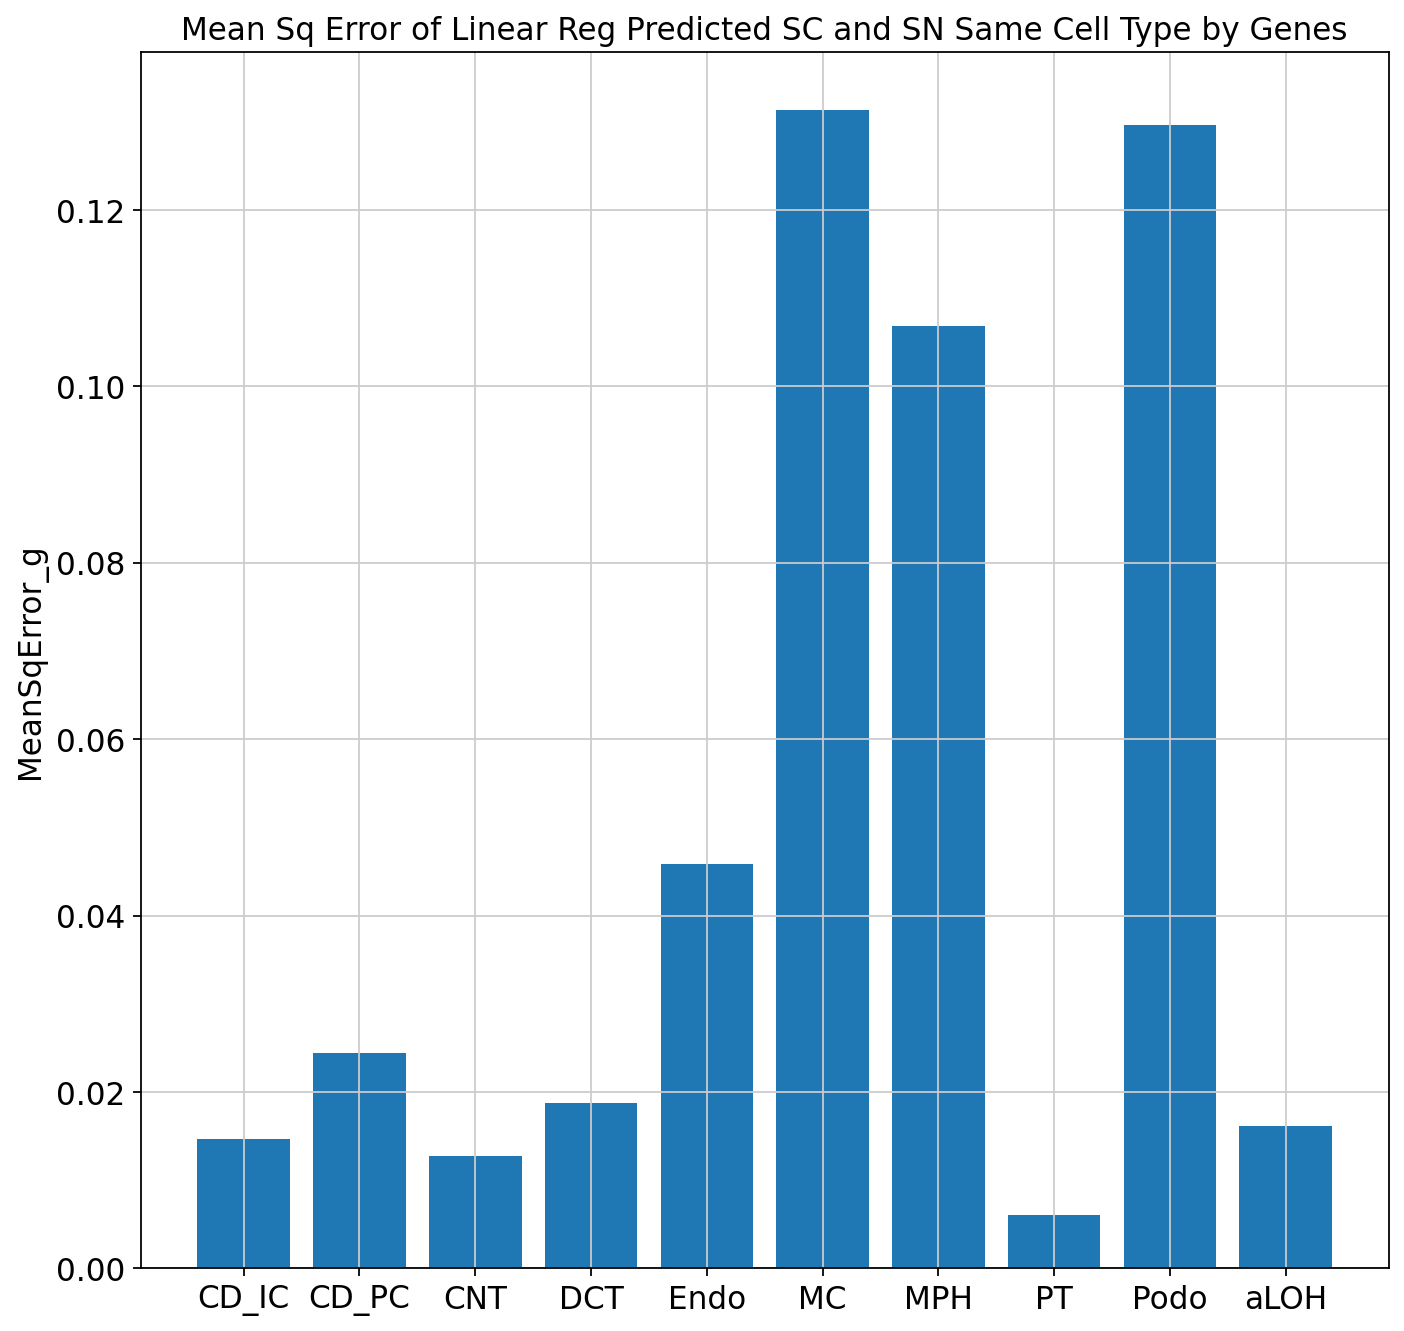

In [267]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
titles = values_df.columns
counts = values_df.iloc[3]
bar_labels = values_df.columns

ax.bar(titles, counts, label=bar_labels)
ax.set_ylabel(values_df.iloc[3].name)
ax.set_title('Mean Sq Error of Linear Reg Predicted SC and SN Same Cell Type by Genes')

plt.show()

Now filtering the datasets and doing again:

In [268]:
#reading in the combined data (normalized separately) processed in R Seurat
sn_path = f"{path}/../data/mouse_kidney/GSE141115_withnames/M7_SN_FANS_3×500g.txt.gz"
sn_adata_filt = sc.read_text(sn_path)
sn_adata_filt

AnnData object with n_obs × n_vars = 16524 × 8611

In [269]:
sc_path = f"{path}/../data/mouse_kidney/GSE141115_withnames/M7_SC_ColdDiss_Fresh.txt.gz"
sc_adata_filt = sc.read_text(sc_path)
sc_adata_filt

AnnData object with n_obs × n_vars = 14310 × 4606

In [270]:
bulk_path = f"{path}/../data/mouse_kidney/GSE141115_withnames/M7_BulkSeq_ColdDiss_Fresh.txt.gz"
bulk_adata_filt = sc.read_text(bulk_path, delimiter=None)
bulk_adata_filt

AnnData object with n_obs × n_vars = 29071 × 1

In [271]:
#all datasets need transposing:
sn_adata_filt = sn_adata_filt.transpose()
sc_adata_filt = sc_adata_filt.transpose()
bulk_adat_filt = bulk_adata_filt.transpose()

In [272]:
sn_adata_filt.var_names_make_unique()
sc_adata_filt.var_names_make_unique()  

In [273]:
#importing the paper's excel sheet with cell types:
cell_path = f"{path}/../data/mouse_kidney/cell_assignments/13059_2020_2048_MOESM3_ESM.xlsx"
cell_assign_sn = pd.read_excel(cell_path, sheet_name = 'cells_and_nuclei_v2_chemistry')
cell_assign_sc = pd.read_excel(cell_path, sheet_name = 'cells_and_nuclei_v3_chemistry')


In [274]:
sn_celltypes = cell_assign_sn[cell_assign_sn['Library']=='MJ06']
sn_celltypes['Cell type']

9153     aLOH
9154     aLOH
9155     aLOH
9156       PT
9157     aLOH
         ... 
17759      PT
17760    aLOH
17761      PT
17762      PT
17763    aLOH
Name: Cell type, Length: 8611, dtype: object

In [275]:
sn_adata_filt.obs['cell_type'] = sn_celltypes['Cell type'].values
sn_adata_filt.obs

cell_type
MJ06_SN_AAACCTGAGATCCCGC      aLOH
MJ06_SN_AAACCTGAGCCACTAT      aLOH
MJ06_SN_AAACCTGAGCGTGAAC      aLOH
MJ06_SN_AAACCTGAGTACGCGA        PT
MJ06_SN_AAACCTGCAACACCTA      aLOH
...                            ...
MJ06_SN_TTTGTCAGTGCAACGA        PT
MJ06_SN_TTTGTCAGTTCCATGA      aLOH
MJ06_SN_TTTGTCATCCTACAGA        PT
MJ06_SN_TTTGTCATCGCGATCG        PT
MJ06_SN_TTTGTCATCTGACCTC      aLOH

[8611 rows x 1 columns]

In [276]:
#now assigning sc cell types
sc_celltypes = cell_assign_sc[cell_assign_sc['Library']=='LD01']
sc_celltypes

Unnamed: 0 Library Protocol Cell type
0     LD01_SC_FRESH_AAACCCACAACCACAT    LD01    SC_v3     CD_IC
1     LD01_SC_FRESH_AAACCCAGTATGACAA    LD01    SC_v3     CD_IC
2     LD01_SC_FRESH_AAACCCAGTTCAAGGG    LD01    SC_v3       CNT
3     LD01_SC_FRESH_AAACCCATCAGCTTCC    LD01    SC_v3        PT
4     LD01_SC_FRESH_AAACCCATCCTTTGAT    LD01    SC_v3     CD_PC
...                              ...     ...      ...       ...
4601  LD01_SC_FRESH_TTTGTTGGTGAGATCG    LD01    SC_v3        PT
4602  LD01_SC_FRESH_TTTGTTGGTTTCACAG    LD01    SC_v3       CNT
4603  LD01_SC_FRESH_TTTGTTGTCCCTCGTA    LD01    SC_v3      aLOH
4604  LD01_SC_FRESH_TTTGTTGTCGAGAGAC    LD01    SC_v3      Endo
4605  LD01_SC_FRESH_TTTGTTGTCGAGATGG    LD01    SC_v3        PT

[4606 rows x 4 columns]

In [277]:
sc_adata_filt.obs['cell_type'] = sc_celltypes['Cell type'].values
sc_adata_filt.obs

cell_type
LD01_SC_FRESH_AAACCCACAACCACAT     CD_IC
LD01_SC_FRESH_AAACCCAGTATGACAA     CD_IC
LD01_SC_FRESH_AAACCCAGTTCAAGGG       CNT
LD01_SC_FRESH_AAACCCATCAGCTTCC        PT
LD01_SC_FRESH_AAACCCATCCTTTGAT     CD_PC
...                                  ...
LD01_SC_FRESH_TTTGTTGGTGAGATCG        PT
LD01_SC_FRESH_TTTGTTGGTTTCACAG       CNT
LD01_SC_FRESH_TTTGTTGTCCCTCGTA      aLOH
LD01_SC_FRESH_TTTGTTGTCGAGAGAC      Endo
LD01_SC_FRESH_TTTGTTGTCGAGATGG        PT

[4606 rows x 1 columns]

In [278]:
new_cell_names_sc = dict(
         CD_IC= 'CD_IC',
         CNT = 'CNT',
         PT= 'PT',
         CD_PC = 'CD_PC',
         MC = 'MC',
         Endo = 'Endo',
         DCT= 'DCT',
         Podo = 'Podo',
         aLOH = 'aLOH',
         MPH = 'MPH',
         CD_Trans= 'CD_Trans',
         NK = 'NK',
         Fib = 'Fib',
         T = 'T',
         Neut = 'Neut')

sc_adata_filt.obs['cell_type'] = (
    sc_adata_filt.obs['cell_type']
    .map(new_cell_names_sc )
    .astype('category')
)


In [279]:
new_cell_names_sn = dict(aLOH = 'aLOH',
                     PT = 'PT',
                     CD_PC = 'CD_PC',
                     DCT = 'DCT', 
                     MC = 'MC',
                     CNT = 'CNT', 
                     Podo = 'Podo', 
                     Endo = 'Endo', 
                     CD_IC_A = 'CD_IC', 
                     MPH = 'MPH',
                     CD_IC_B= 'CD_IC',
                     Unknown = 'Unknown')

sn_adata_filt.obs['cell_type'] = (
    sn_adata_filt.obs['cell_type']
    .map(new_cell_names_sn )
    .astype('category')
)


In [280]:
sn_adata_filt.obs['orig'] = 'single_nucleus'
together_sn = list()
counter_sn = 0
for value in sn_adata_filt.obs['orig']:
    together_sn.append(f"{value}_{sn_adata_filt.obs['cell_type'][counter_sn]}")
    counter_sn = counter_sn+1
sn_adata_filt.obs['orig_and_celltype'] = together_sn

In [281]:
sc_adata_filt.obs['orig'] = 'single_cell'
together_sc = list()
counter_sc = 0
for value in sc_adata_filt.obs['orig']:
    together_sc.append(f"{value}_{sc_adata_filt.obs['cell_type'][counter_sc]}")
    counter_sc = counter_sc+1
sc_adata_filt.obs['orig_and_celltype'] = together_sc

In [282]:
sn_adata_filt[sn_adata_filt.obs['orig_and_celltype'] == "single_nucleus_Endo"]

View of AnnData object with n_obs × n_vars = 524 × 16524
    obs: 'cell_type', 'orig', 'orig_and_celltype'

In [283]:
sn_adata_filt[sn_adata_filt.obs['orig_and_celltype'] == "single_nucleus_CD_IC"]

View of AnnData object with n_obs × n_vars = 263 × 16524
    obs: 'cell_type', 'orig', 'orig_and_celltype'

Filtering both:
Starting with SN:

In [284]:
sc.pp.filter_cells(sn_adata_filt, min_genes=200)
sc.pp.filter_genes(sn_adata_filt, min_cells=3)

filtered out 781 genes that are detected in less than 3 cells


In [285]:
sn_adata_filt.var['mt'] = sn_adata_filt.var_names.str.startswith('Mt')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(sn_adata_filt, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/beevol/home/ivicha/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig' as categorical
/beevol/home/ivicha/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig_and_celltype' as categorical


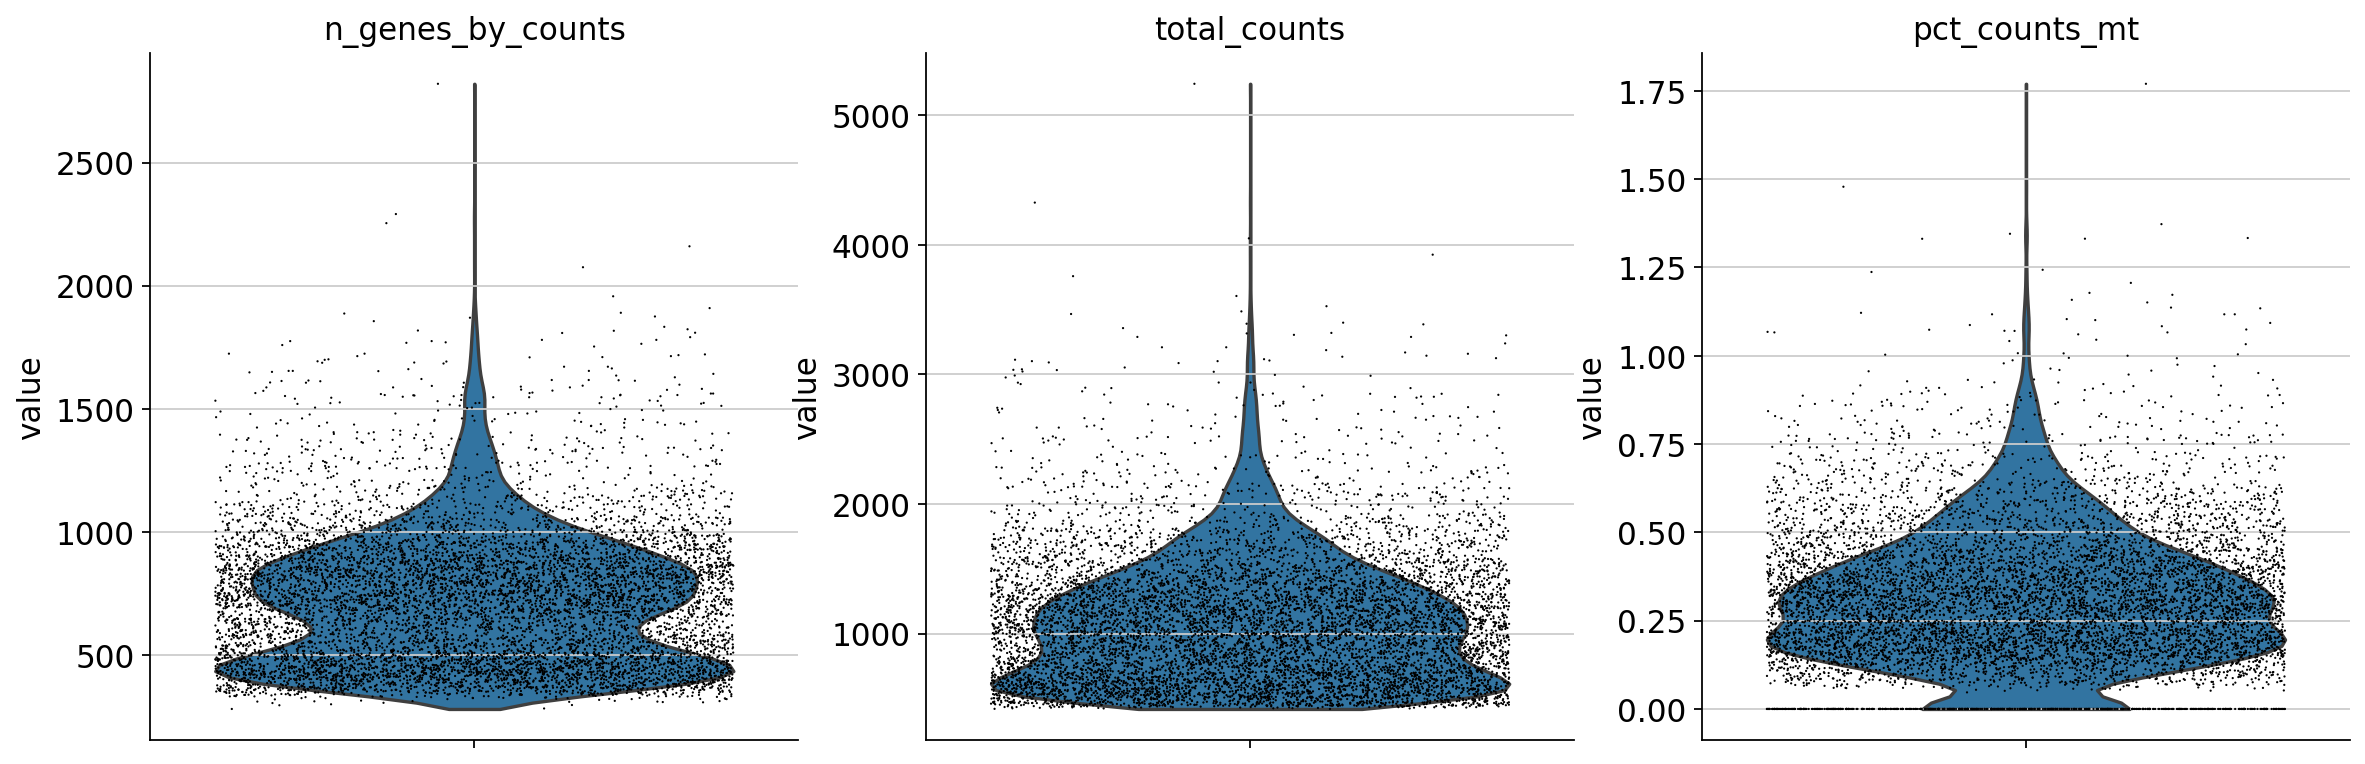

In [286]:
sc.pl.violin(sn_adata_filt, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [287]:
sn_data_filt = sn_adata_filt[sn_adata_filt.obs.n_genes_by_counts < 2000, :]
sn_adata_filt = sn_adata_filt[sn_adata_filt.obs.pct_counts_mt < 1.5, :]

In [288]:
sc.pp.normalize_total(sn_adata_filt, target_sum=1e4)
sc.pp.log1p(sn_adata_filt)

/beevol/home/ivicha/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [289]:
sc.pp.highly_variable_genes(sn_adata_filt, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [290]:
sn_adata_filt = sn_adata_filt[:, sn_adata_filt.var.highly_variable]

In [291]:
sc.pp.regress_out(sn_adata_filt, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:27)


In [292]:
sc.pp.scale(sn_adata_filt, max_value=10)

Now filtering SC:

In [293]:
sc.pp.filter_cells(sc_adata_filt, min_genes=200)
sc.pp.filter_genes(sc_adata_filt, min_cells=3)

filtered out 528 genes that are detected in less than 3 cells


In [294]:
sc_adata_filt.var['mt'] = sc_adata_filt.var_names.str.startswith('Mt')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(sc_adata_filt, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/beevol/home/ivicha/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig' as categorical
/beevol/home/ivicha/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig_and_celltype' as categorical


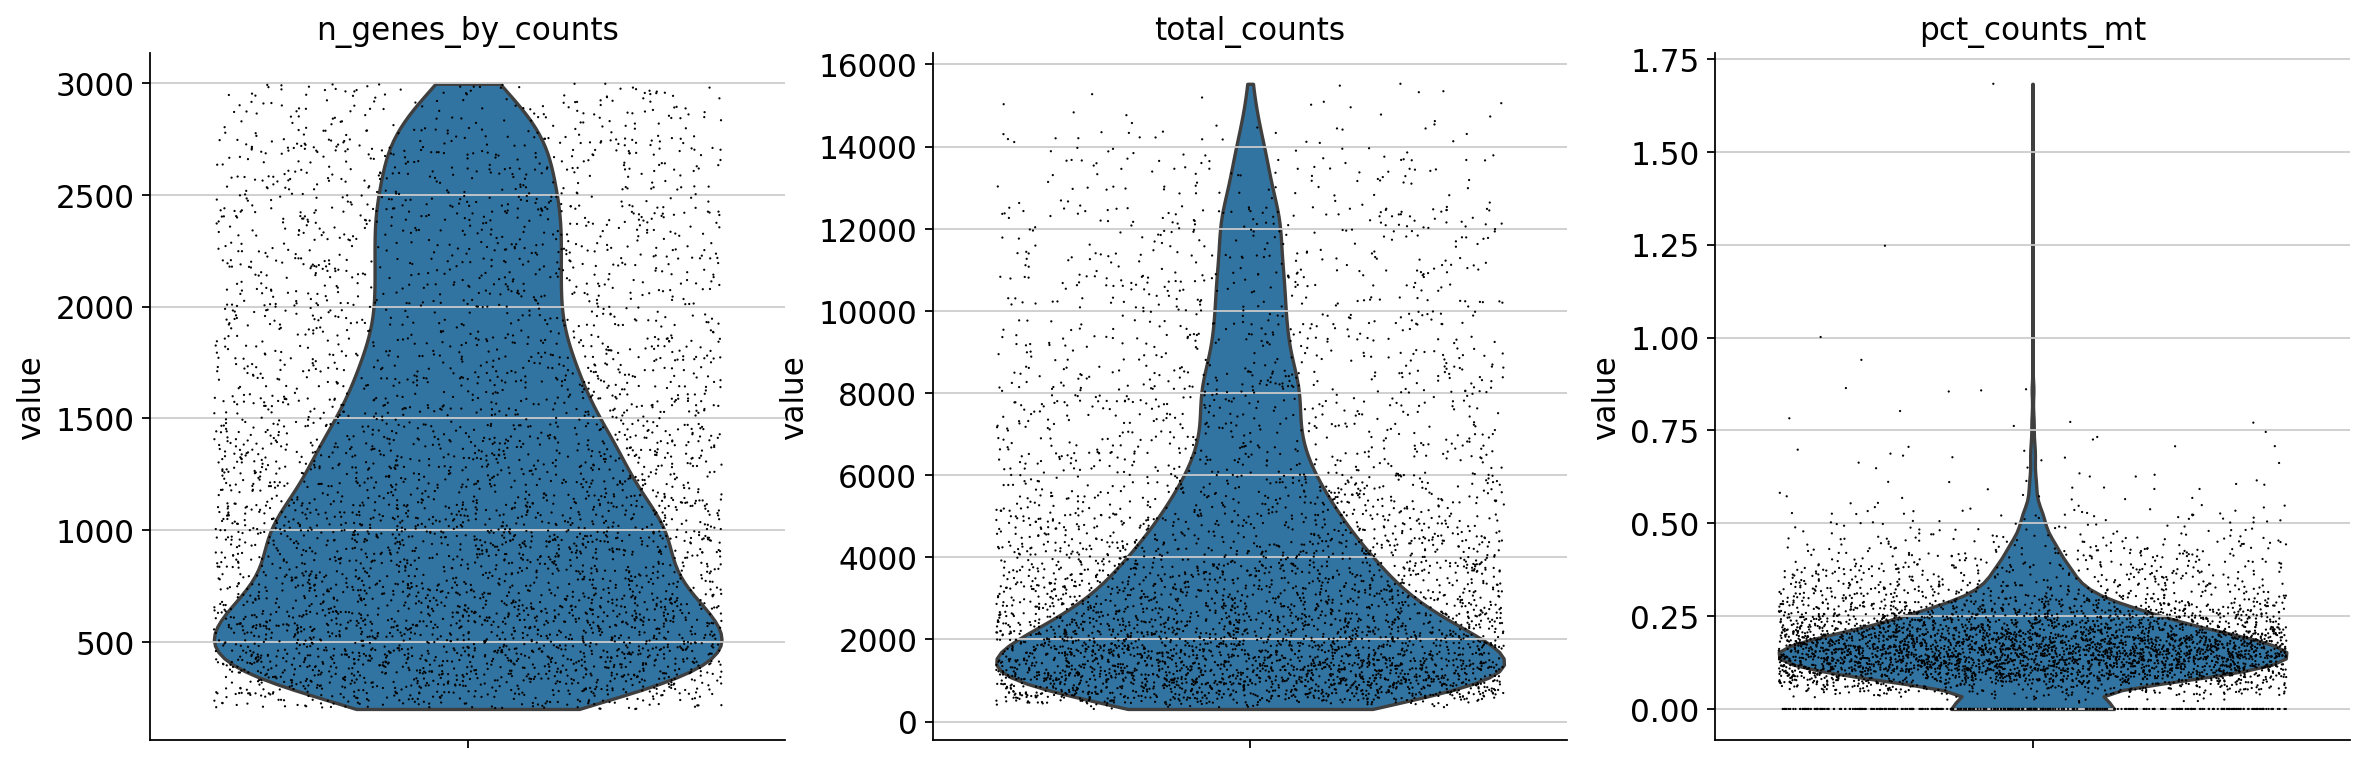

In [295]:
sc.pl.violin(sc_adata_filt, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [296]:
sc_data_filt = sc_adata_filt[sc_adata_filt.obs.n_genes_by_counts < 2000, :]
sc_adata_filt = sc_adata_filt[sc_adata_filt.obs.pct_counts_mt < 1.5, :]

In [297]:
sc.pp.normalize_total(sc_adata_filt, target_sum=1e4)
sc.pp.log1p(sc_adata_filt)

/beevol/home/ivicha/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [298]:
sc.pp.highly_variable_genes(sc_adata_filt, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [299]:
sc_adata_filt = sc_adata_filt[:, sc_adata_filt.var.highly_variable]

In [300]:
sc.pp.regress_out(sc_adata_filt , ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:16)


In [301]:
sc.pp.scale(sc_adata_filt , max_value=10)

In [302]:
#now combining both anndatas, outer and inner (including mismatch vs not including mismatch):
single_adata_filt= sn_adata_filt.concatenate(sc_adata_filt, join='inner')
single_adata_filt

AnnData object with n_obs × n_vars = 13215 × 972
    obs: 'cell_type', 'orig', 'orig_and_celltype', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'mt', 'highly_variable', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'mean-0', 'std-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'mean-1', 'std-1'

Now do the same linear reg:

Coefficients: 
 [0.6672611]
Mean squared error: 0.04
Coefficient of determination: 0.63


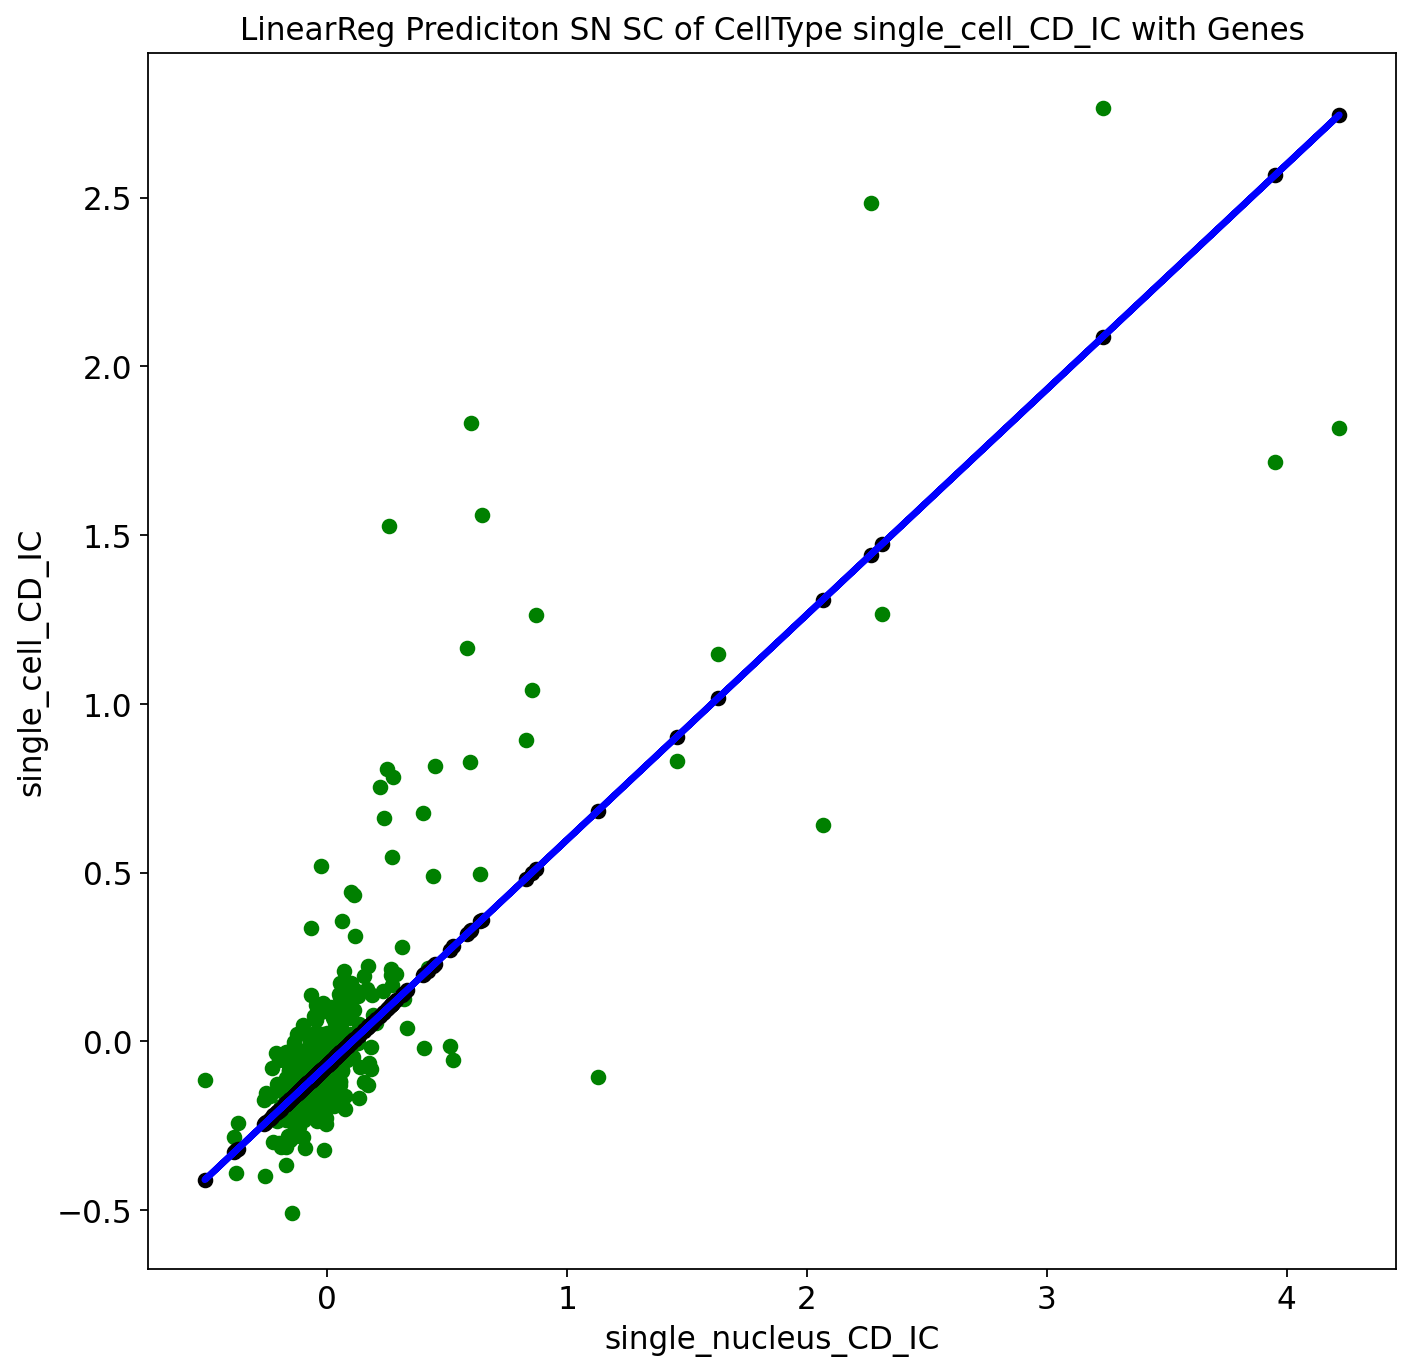

In [303]:
regr_CD_ICf_g, x_train_CD_ICf_g, y_train_CD_ICf_g, x_test_CD_ICf_g, y_test_CD_ICf_g, y_pred_CD_ICf_g = translator_fcn.linear_model_cell_gene(single_adata_filt , "orig_and_celltype", "single_nucleus_CD_IC", "single_cell_CD_IC", 500, 472)

Coefficients: 
 [[0.9999997]]
Mean squared error: 0.09
Coefficient of determination: 0.36


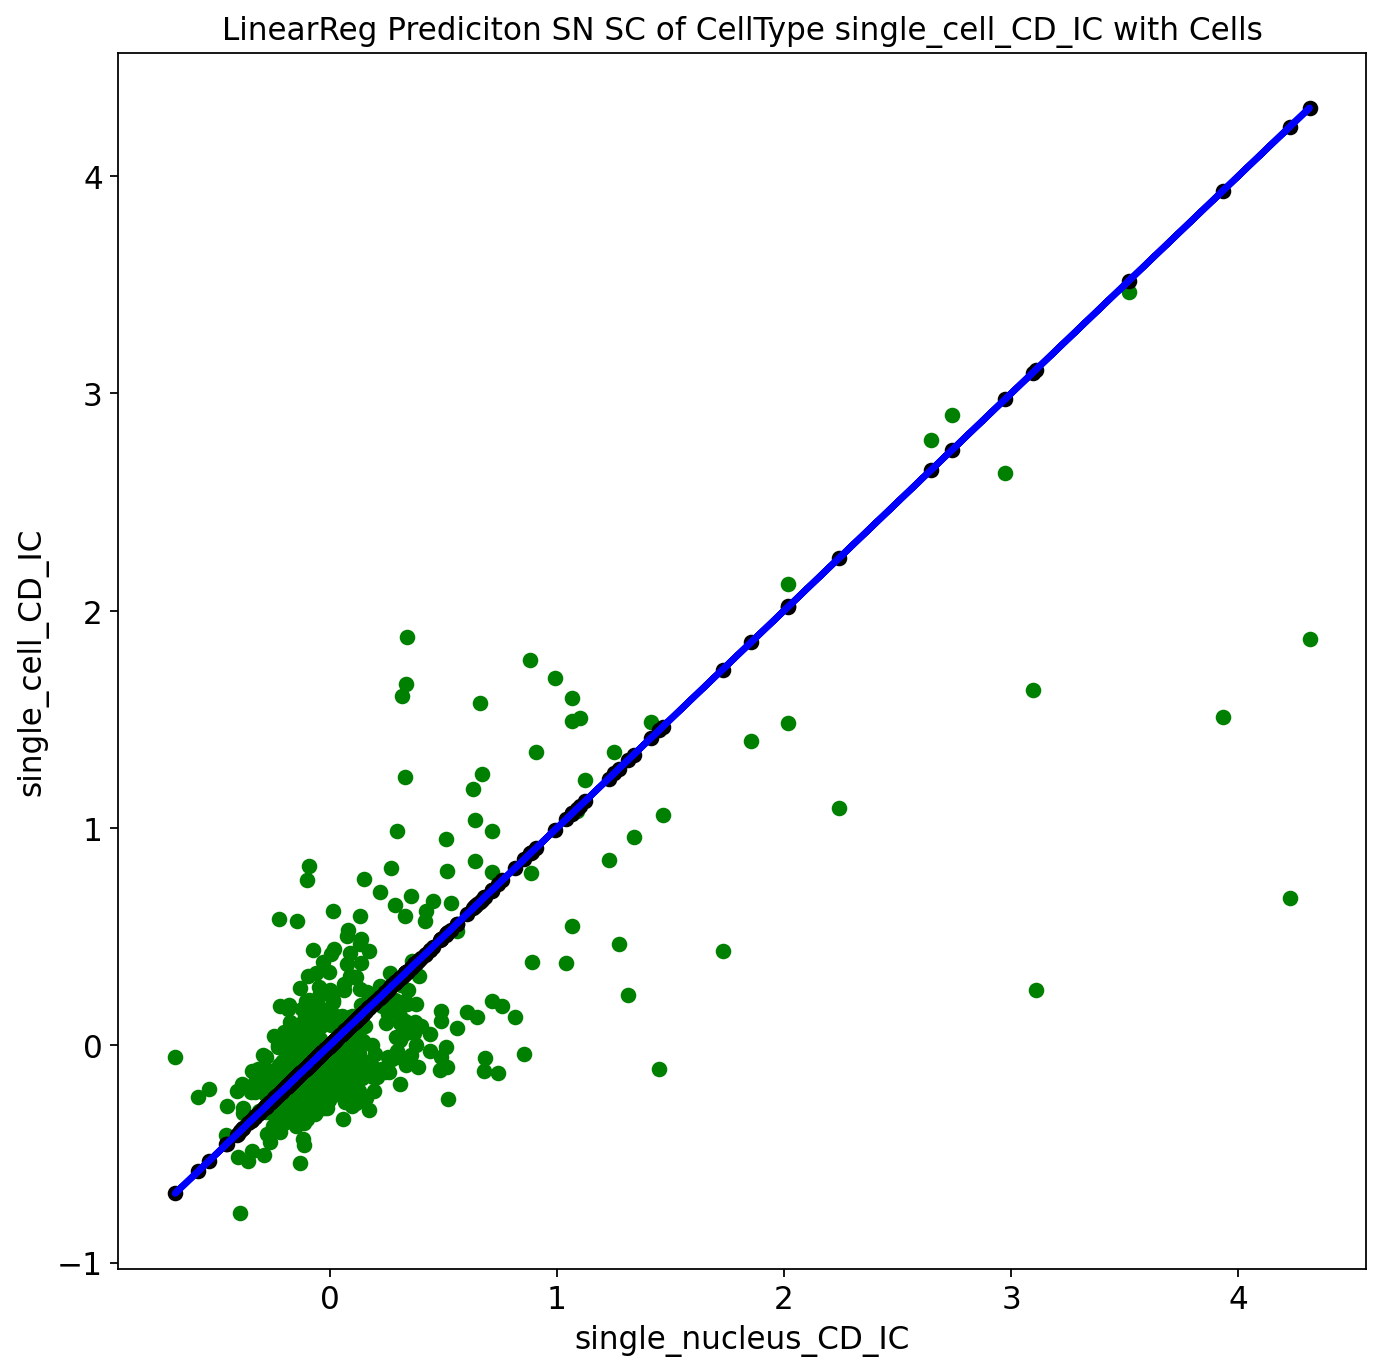

In [304]:
regr_CD_ICf, x_train_CD_ICf, y_train_CD_ICf, x_test_CD_ICf, y_test_CD_ICf, y_pred_CD_ICf = translator_fcn.linear_model_cellnum(single_adata_filt , "orig_and_celltype", "single_nucleus_CD_IC", "single_cell_CD_IC",0.2)

Coefficients: 
 [1.2532325]
Mean squared error: 0.05
Coefficient of determination: 0.61


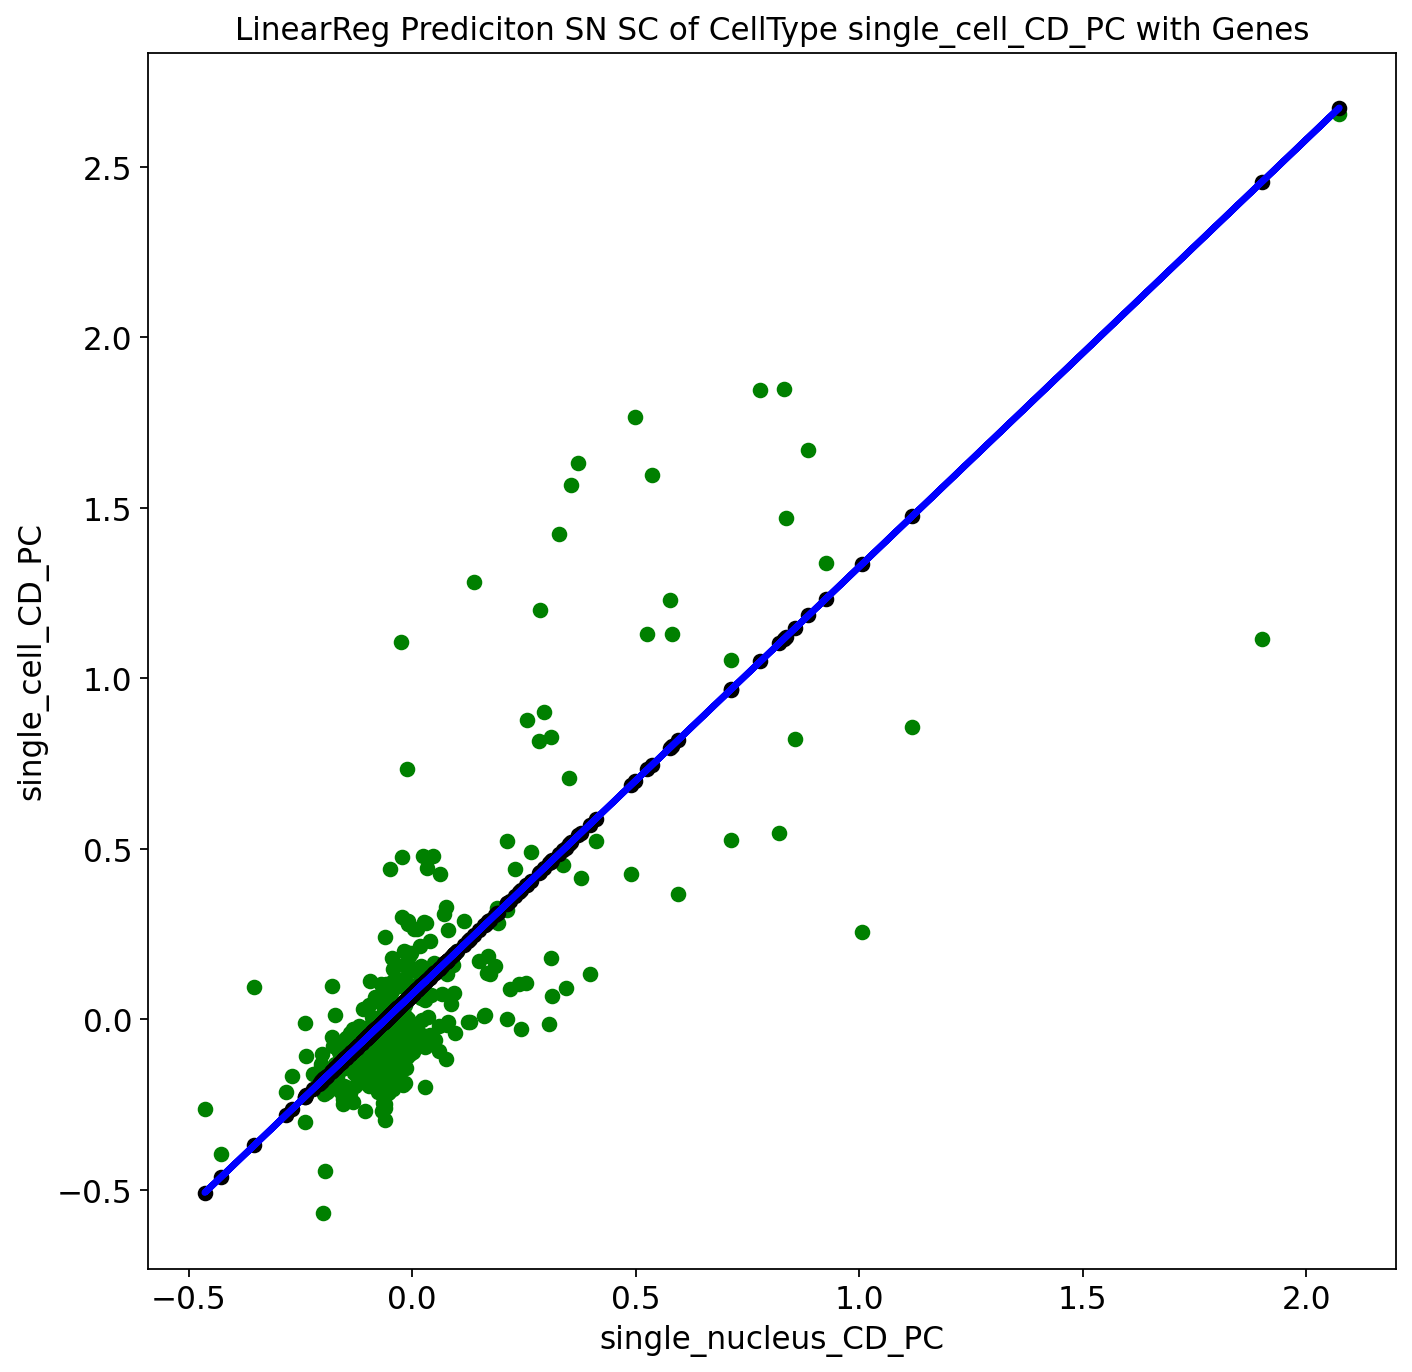

In [305]:
regr_CD_PCf_g, x_train_CD_PCf_g, y_train_CD_PCf_g, x_test_CD_PCf_g, y_test_CD_PCf_g, y_pred_CD_PCf_g = translator_fcn.linear_model_cell_gene(single_adata_filt , "orig_and_celltype", "single_nucleus_CD_PC", "single_cell_CD_PC", 500, 472)

Coefficients: 
 [[1.0000001]]
Mean squared error: 0.08
Coefficient of determination: 0.52


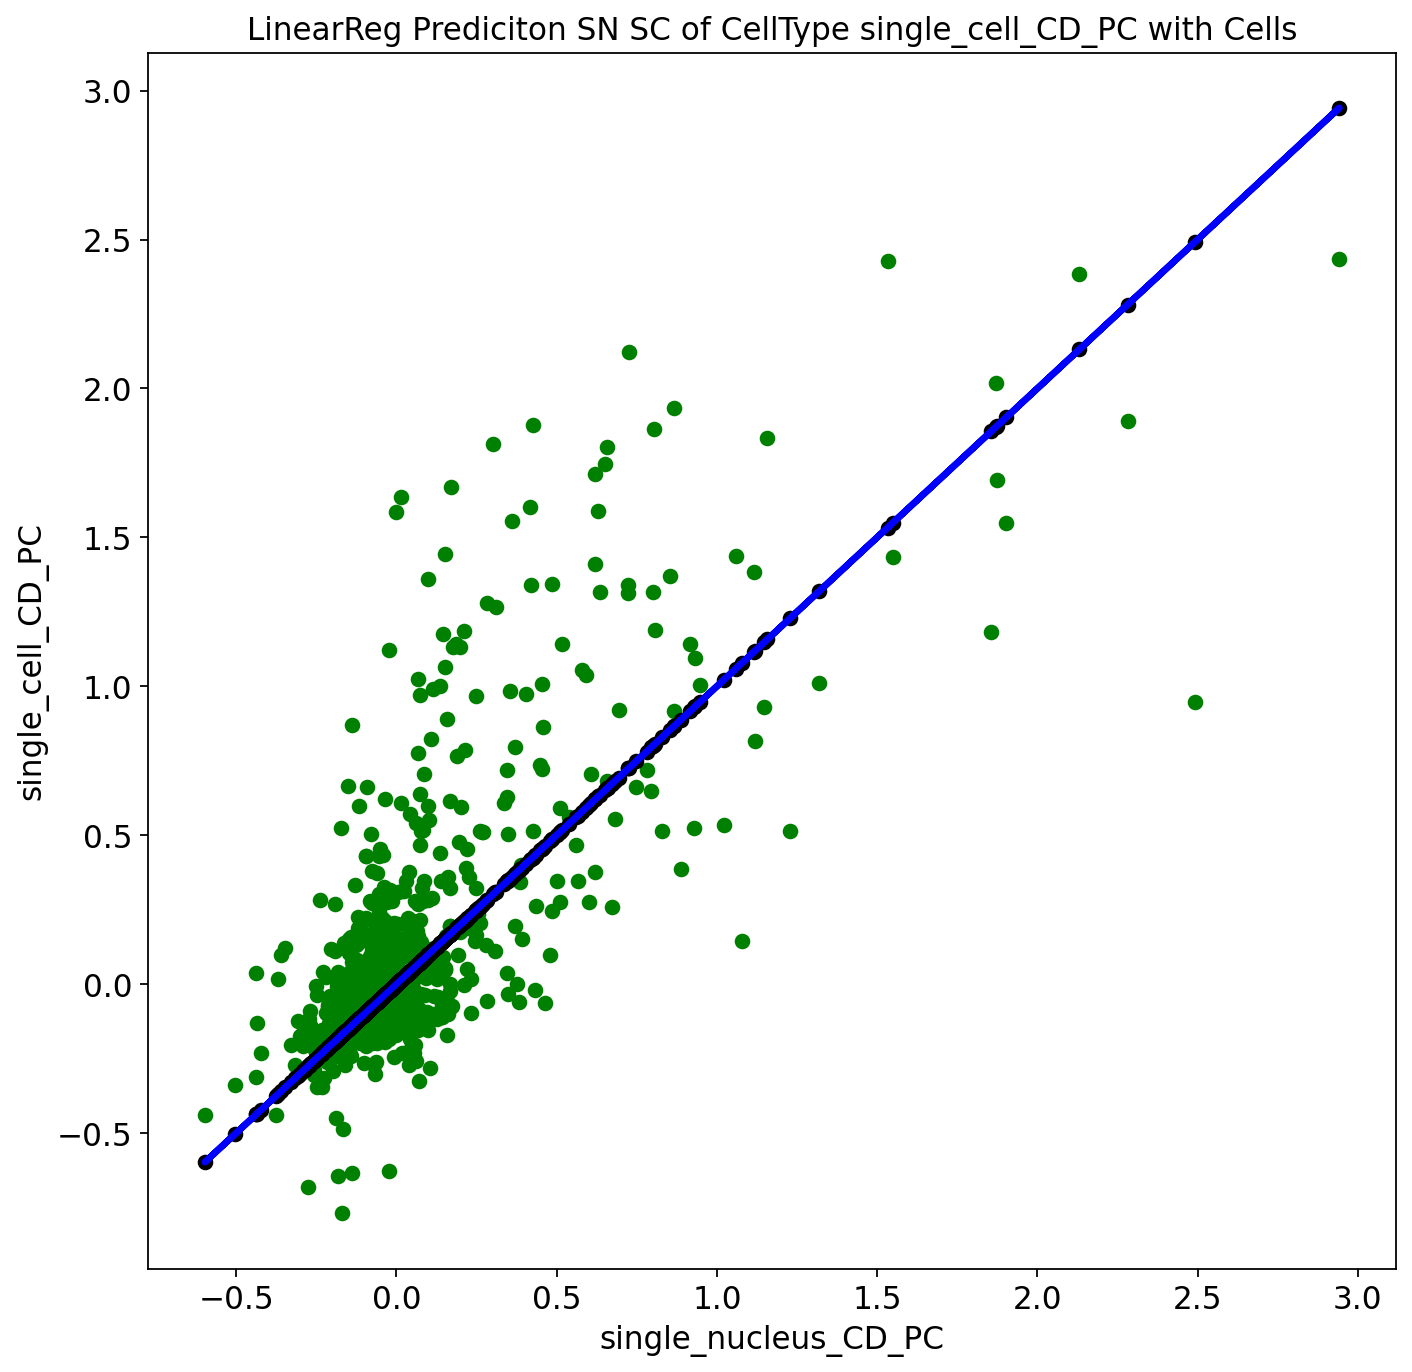

In [306]:
regr_CD_PCf, x_train_CD_PCf, y_train_CD_PCf, x_test_CD_PCf, y_test_CD_PCf, y_pred_CD_PCf = translator_fcn.linear_model_cellnum(single_adata_filt , "orig_and_celltype", "single_nucleus_CD_PC", "single_cell_CD_PC", 0.2)

Coefficients: 
 [0.71295494]
Mean squared error: 0.03
Coefficient of determination: 0.19


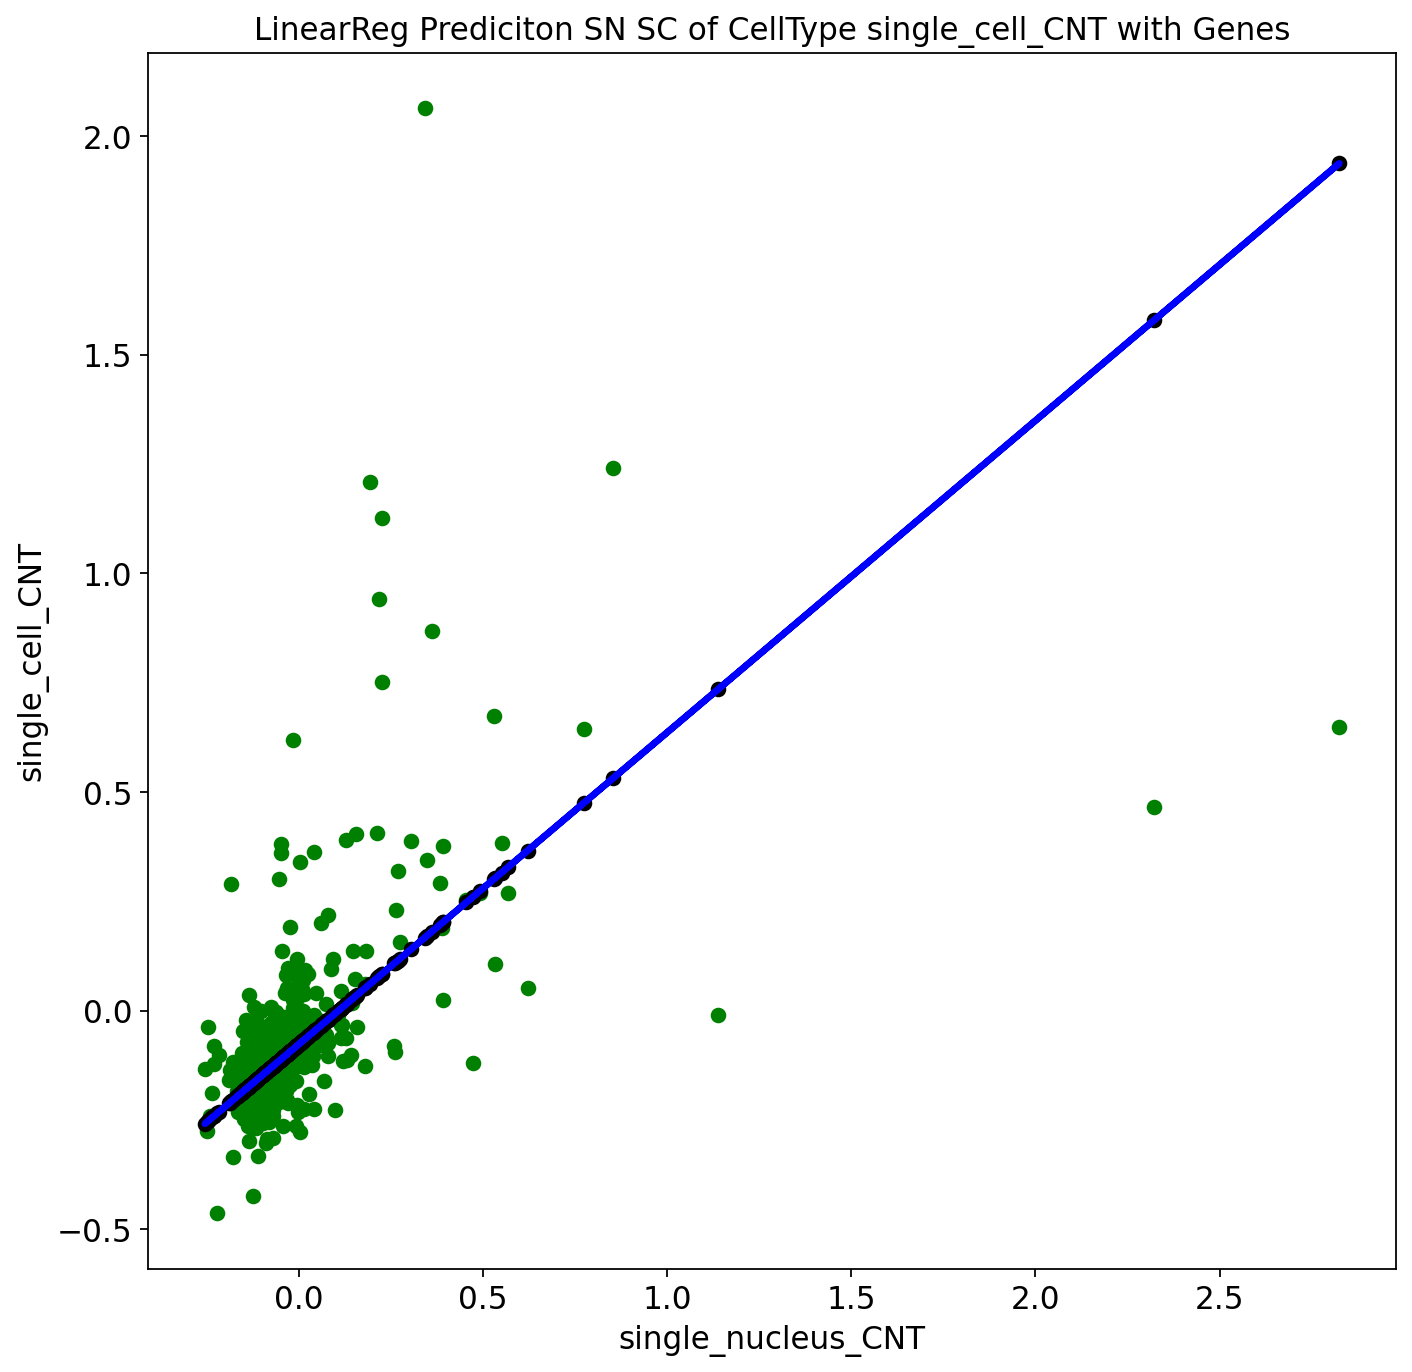

In [307]:
regr_CNTf_g, x_train_CNTf_g, y_train_CNTf_g, x_test_CNTf_g, y_test_CNTf_g, y_pred_CNTf_g = translator_fcn.linear_model_cell_gene(single_adata_filt , "orig_and_celltype", "single_nucleus_CNT", "single_cell_CNT",500, 472)

Coefficients: 
 [[1.]]
Mean squared error: 0.06
Coefficient of determination: -0.01


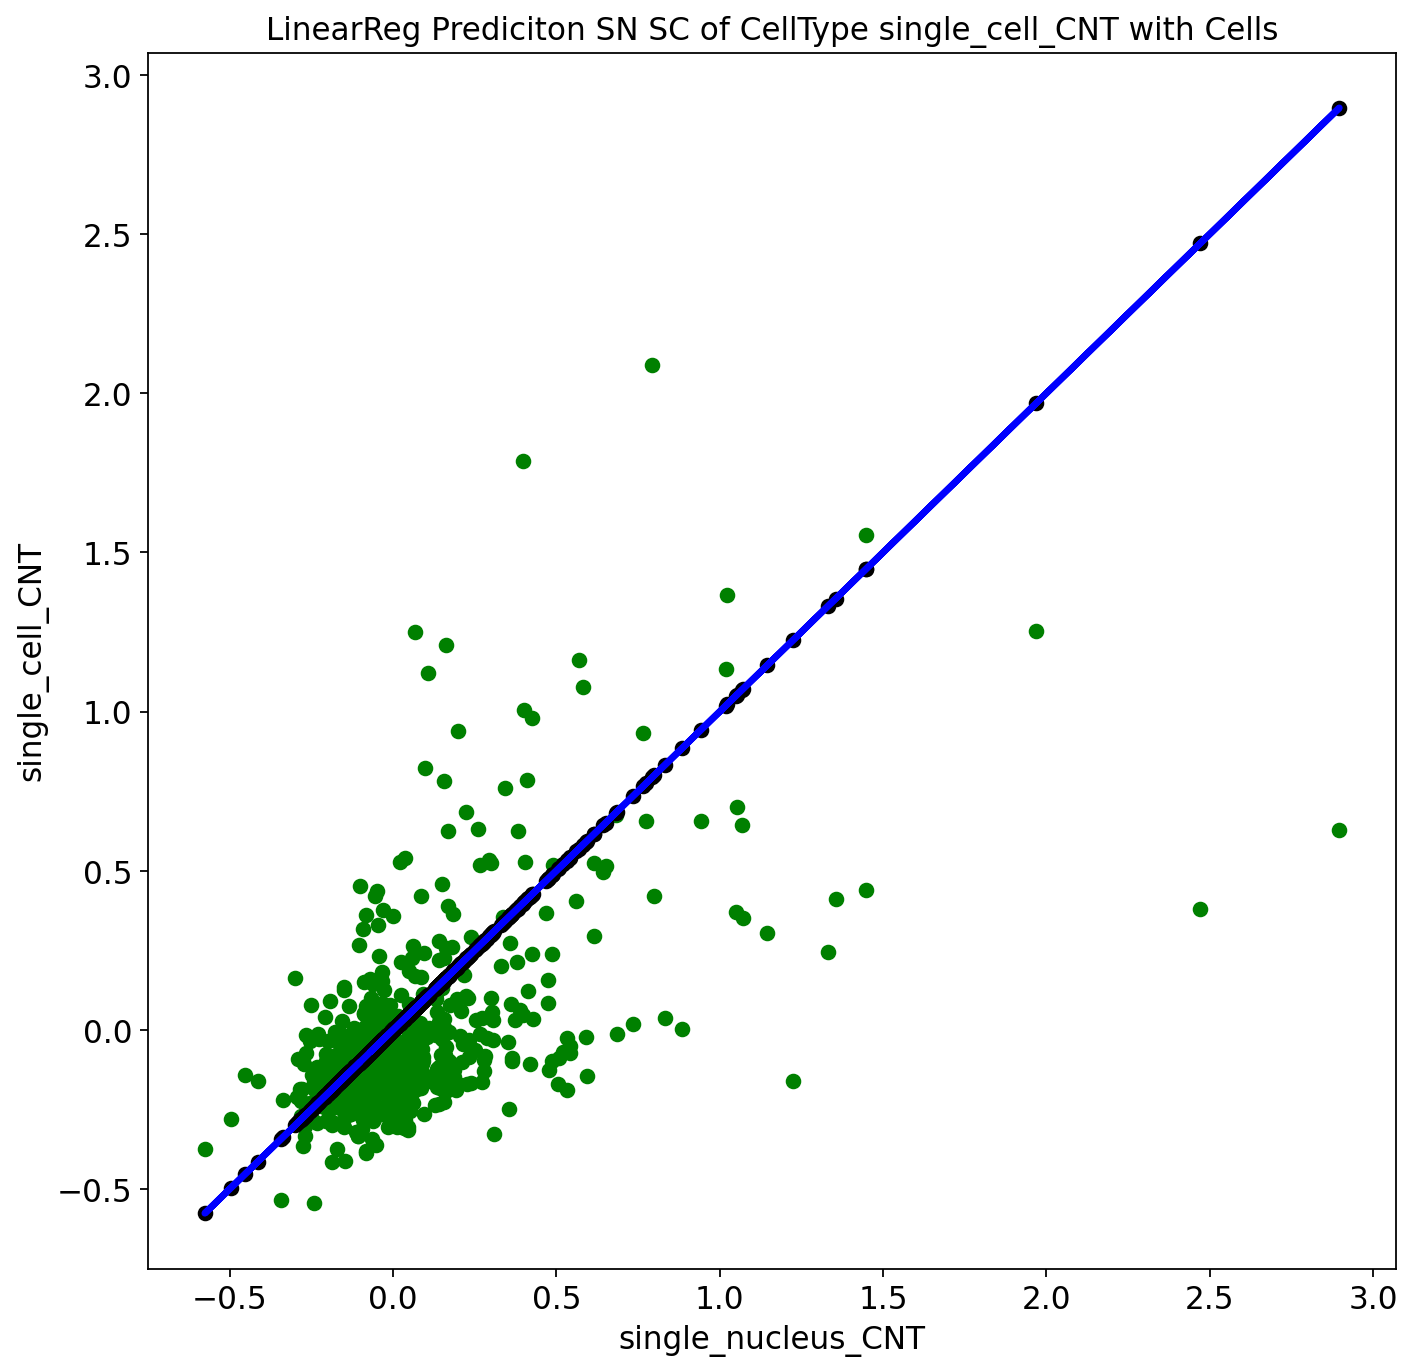

In [308]:
regr_CNTf, x_train_CNTf, y_train_CNTf, x_test_CNTf, y_test_CNTf, y_pred_CNTf = translator_fcn.linear_model_cellnum(single_adata_filt , "orig_and_celltype", "single_nucleus_CNT", "single_cell_CNT",0.2)

Coefficients: 
 [1.1893743]
Mean squared error: 0.03
Coefficient of determination: 0.63


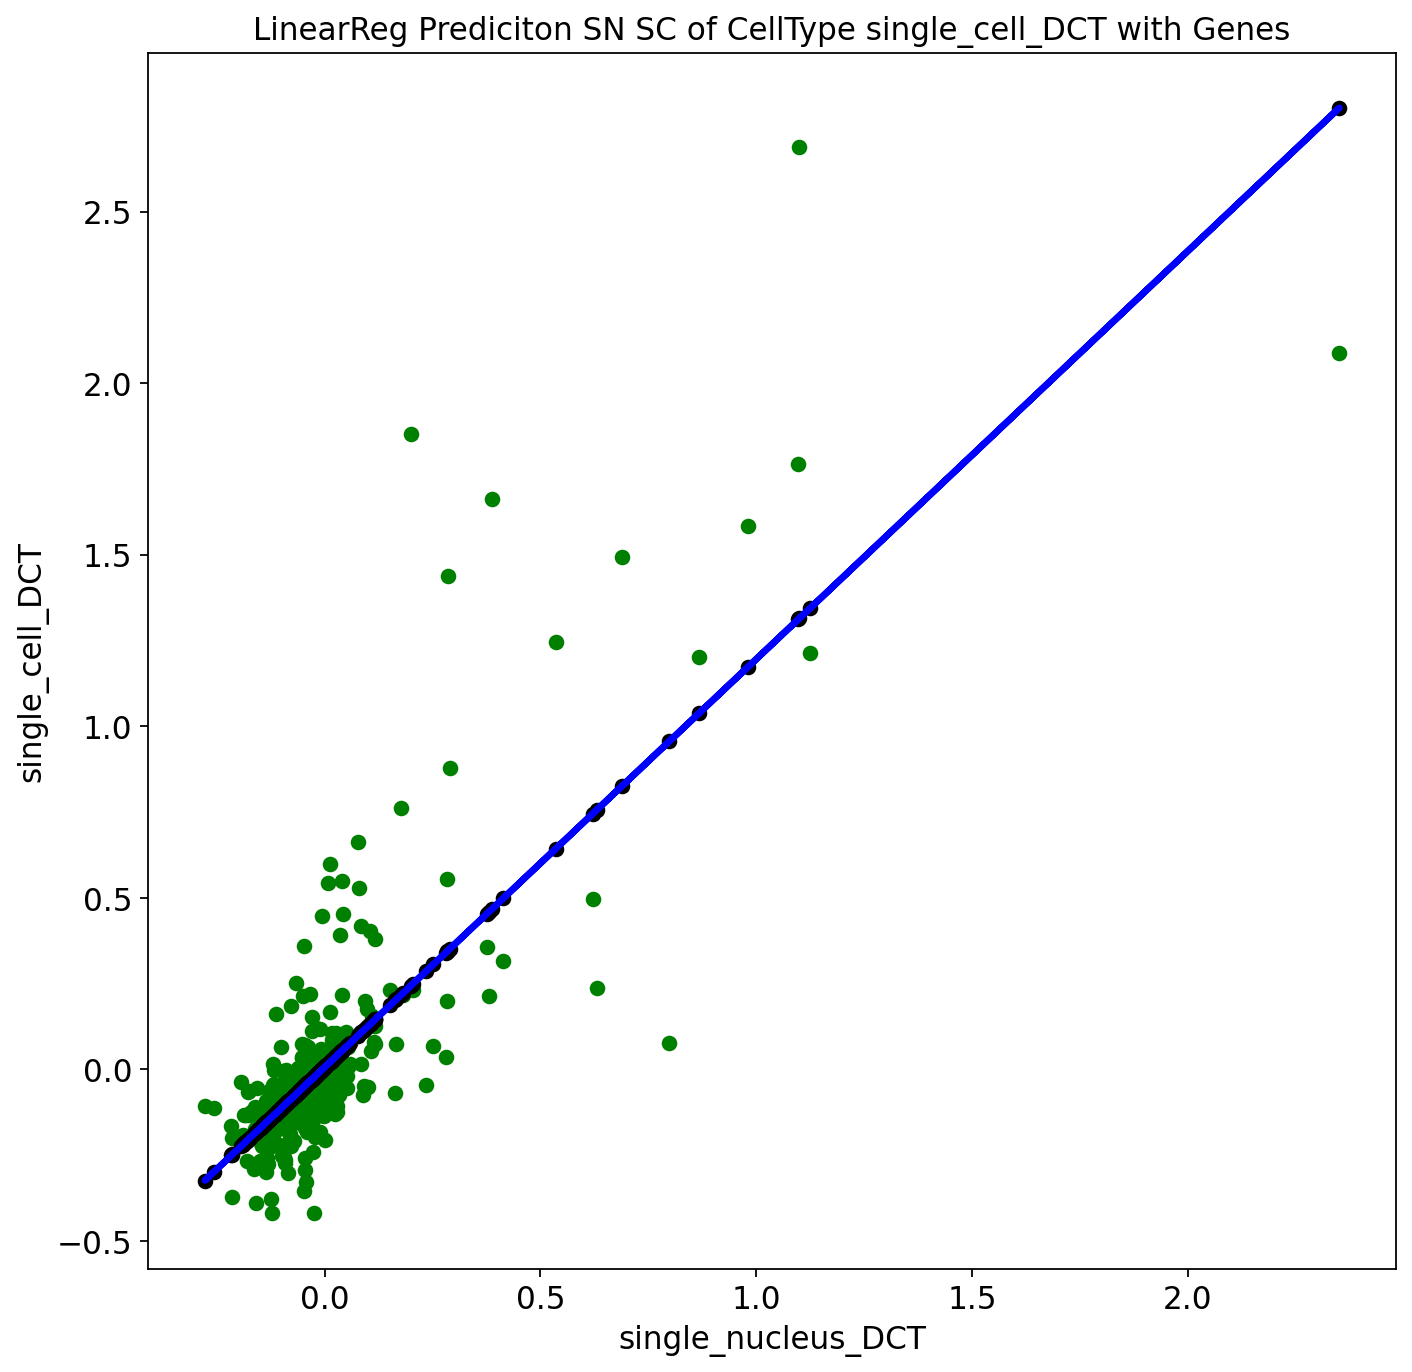

In [309]:
regr_DCTf_g, x_train_DCTf_g, y_train_DCTf_g, x_test_DCTf_g, y_test_DCTf_g, y_pred_DCTf_g = translator_fcn.linear_model_cell_gene(single_adata_filt , "orig_and_celltype", "single_nucleus_DCT", "single_cell_DCT", 500, 472)

Coefficients: 
 [[0.9999999]]
Mean squared error: 0.04
Coefficient of determination: 0.57


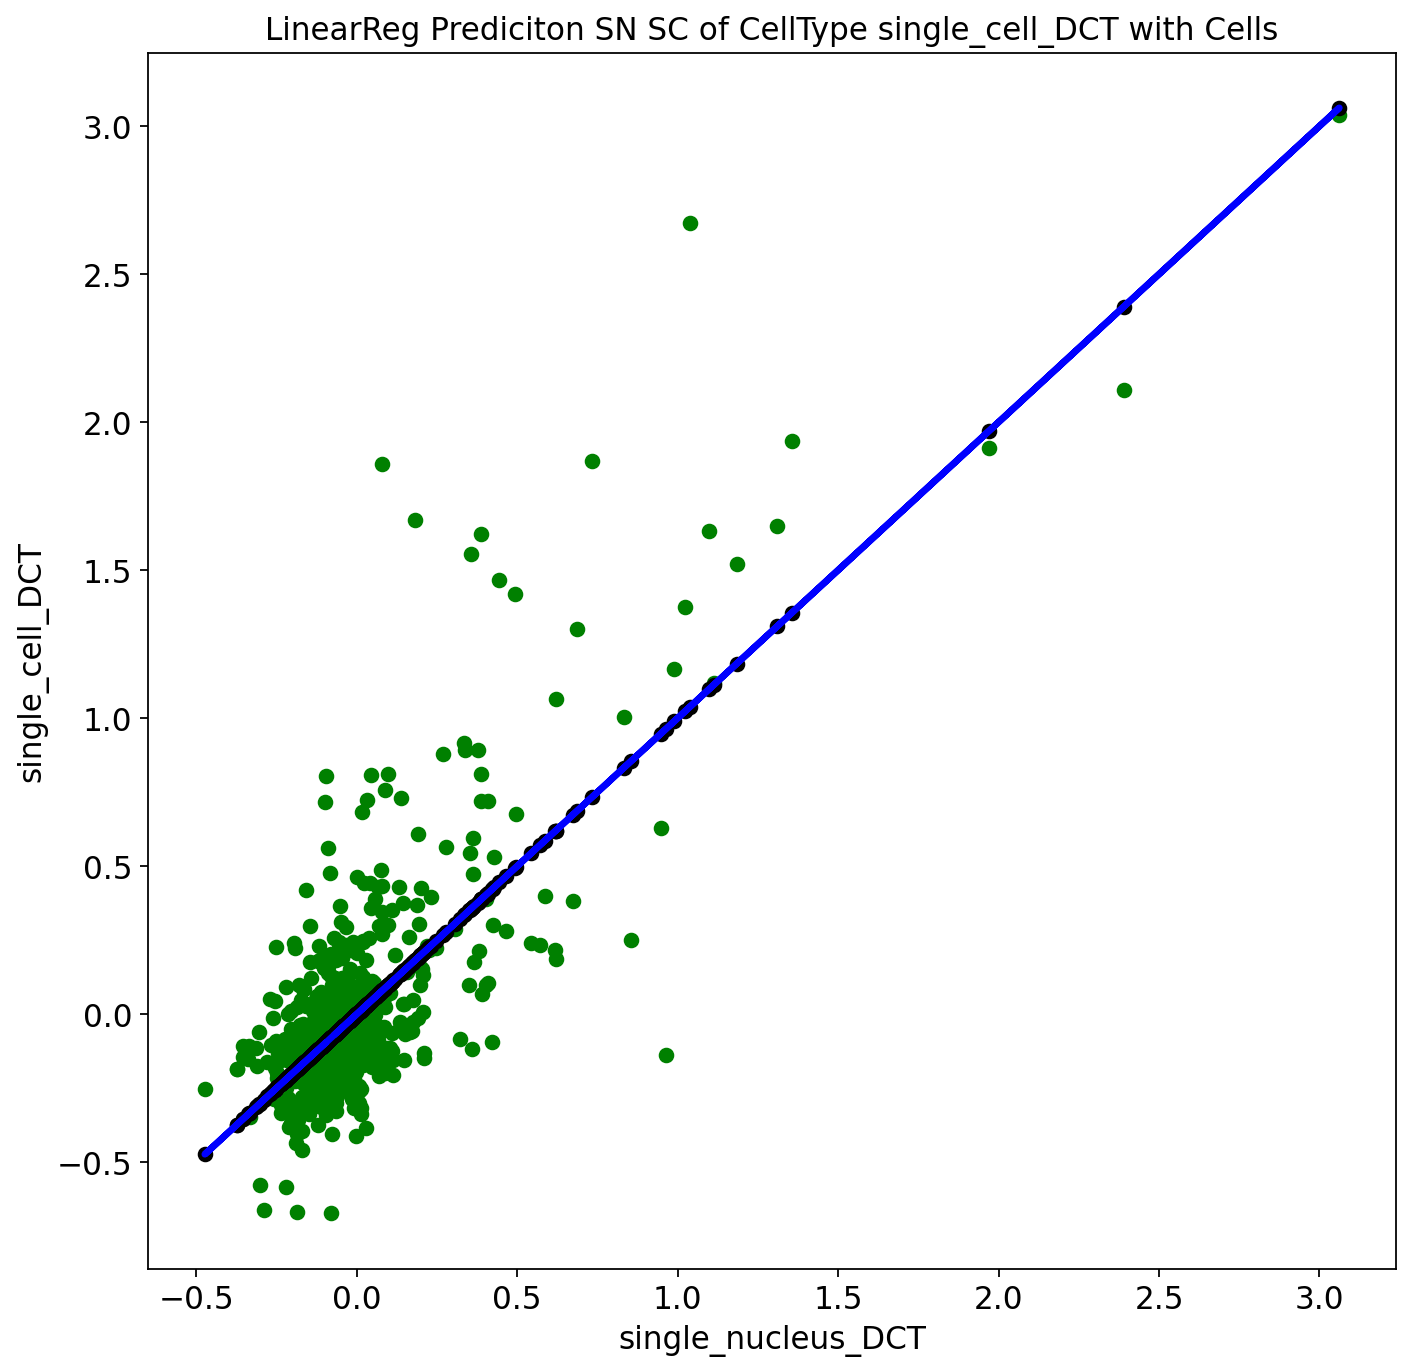

In [310]:
regr_DCTf, x_train_DCTf, y_train_DCTf, x_test_DCTf, y_test_DCTf, y_pred_DCTf = translator_fcn.linear_model_cellnum(single_adata_filt , "orig_and_celltype", "single_nucleus_DCT", "single_cell_DCT",0.2)

Coefficients: 
 [1.3924723]
Mean squared error: 0.13
Coefficient of determination: 0.72


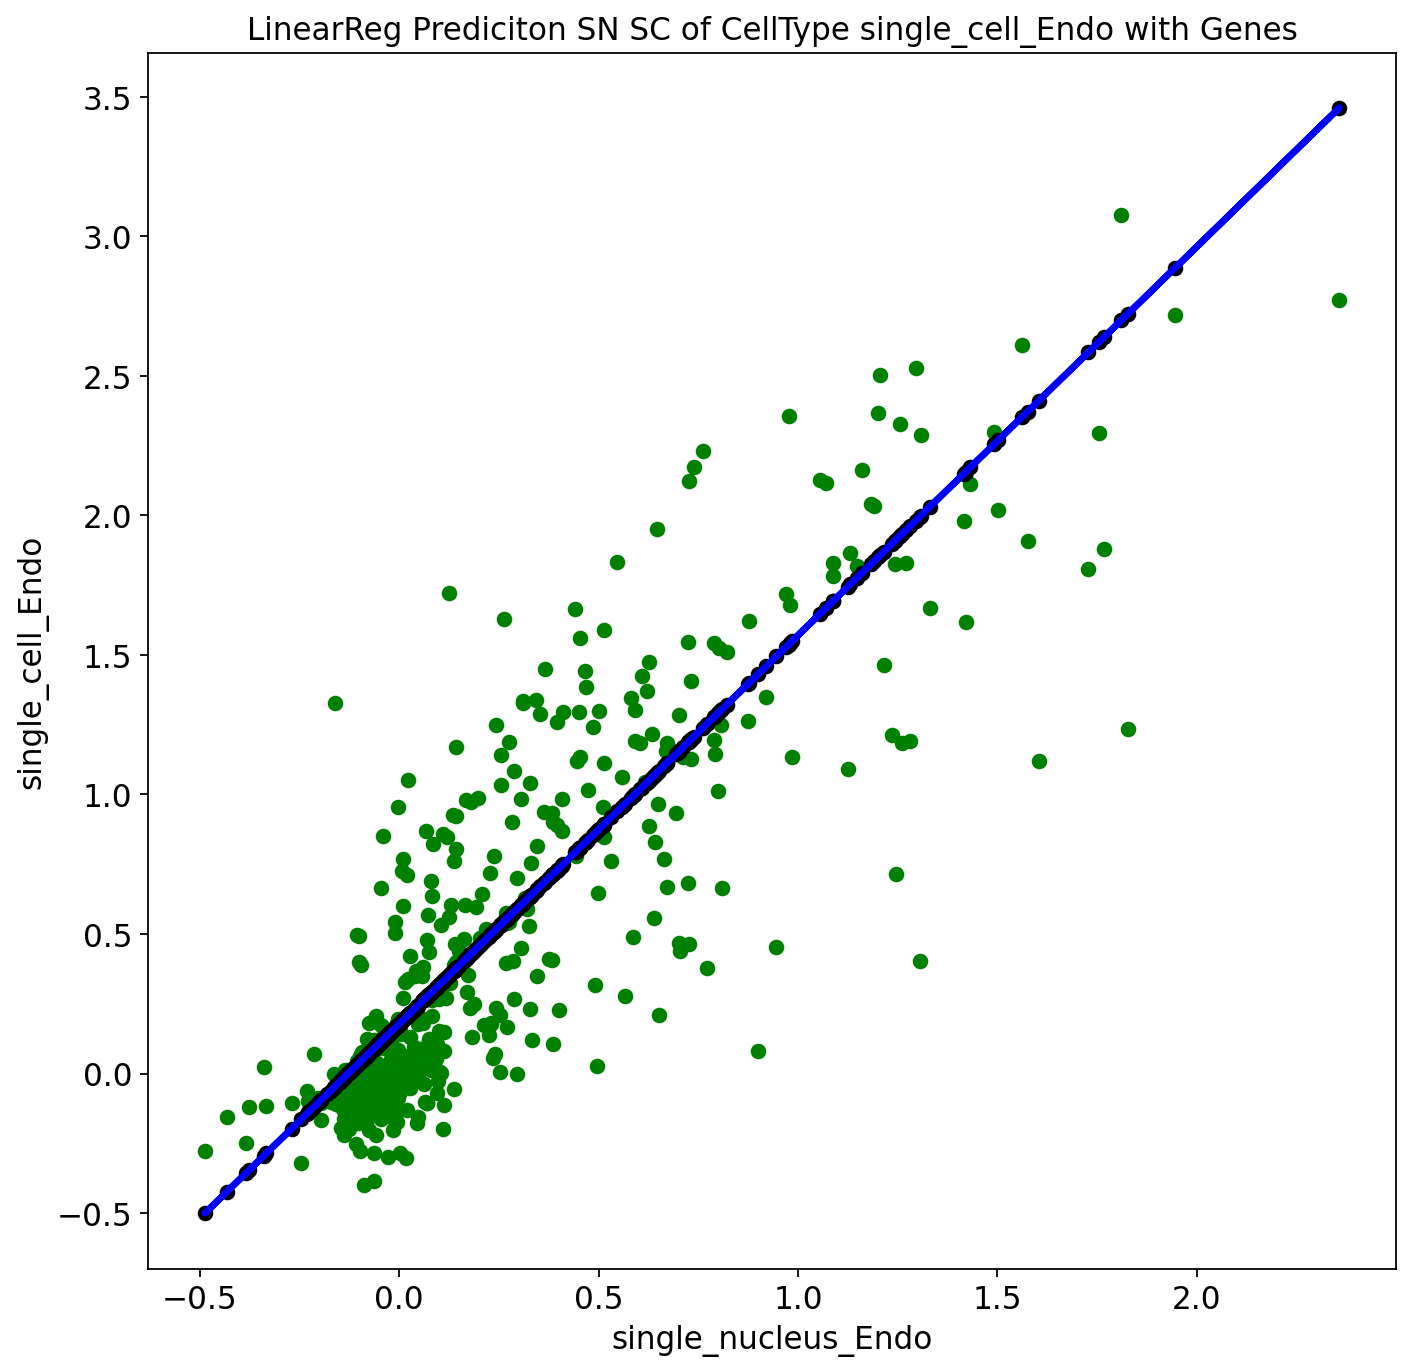

In [311]:
regr_Endof_g, x_train_Endof_g, y_train_Endof_g, x_test_Endof_g, y_test_Endof_g, y_pred_Endof_g = translator_fcn.linear_model_cell_gene(single_adata_filt, "orig_and_celltype", "single_nucleus_Endo", "single_cell_Endo",500, 472)

Coefficients: 
 [[1.0000001]]
Mean squared error: 0.29
Coefficient of determination: 0.50


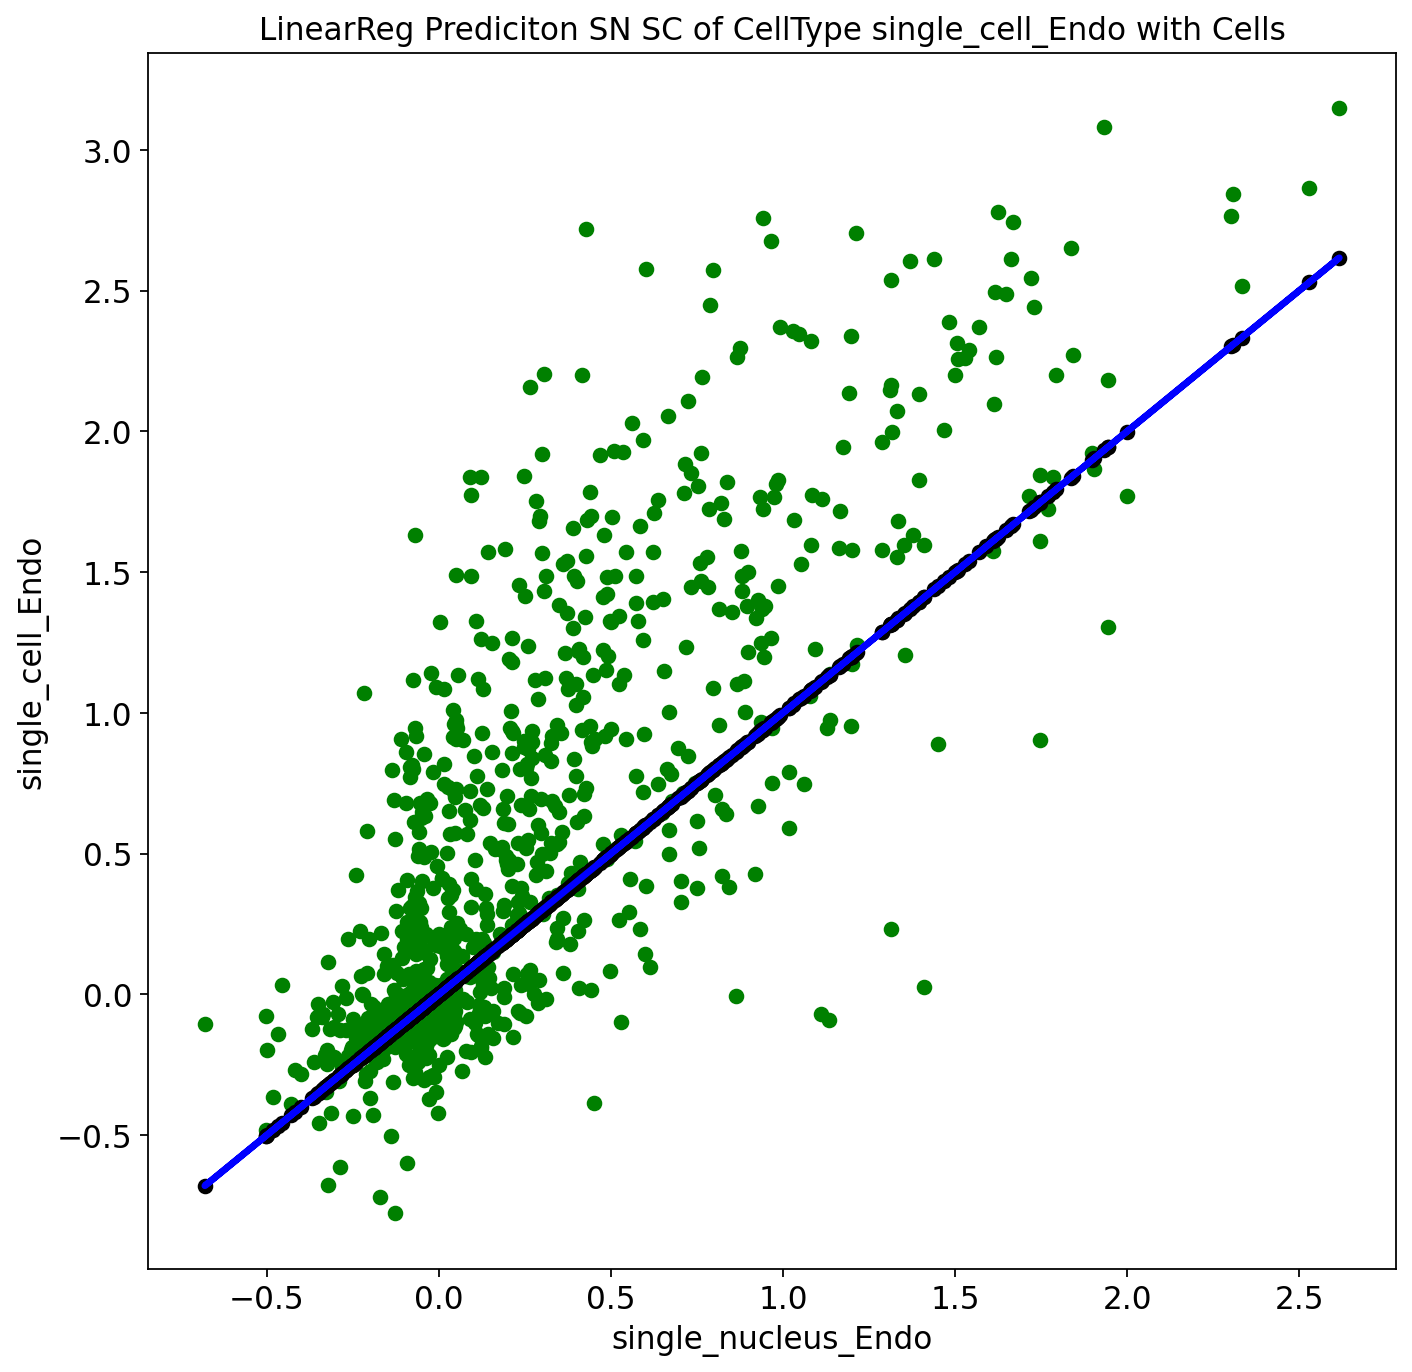

In [312]:
regr_Endof, x_train_Endof, y_train_Endof, x_test_Endof, y_test_Endof, y_pred_Endof = translator_fcn.linear_model_cellnum(single_adata_filt, "orig_and_celltype", "single_nucleus_Endo", "single_cell_Endo",0.2)

Coefficients: 
 [0.777384]
Mean squared error: 0.59
Coefficient of determination: 0.10


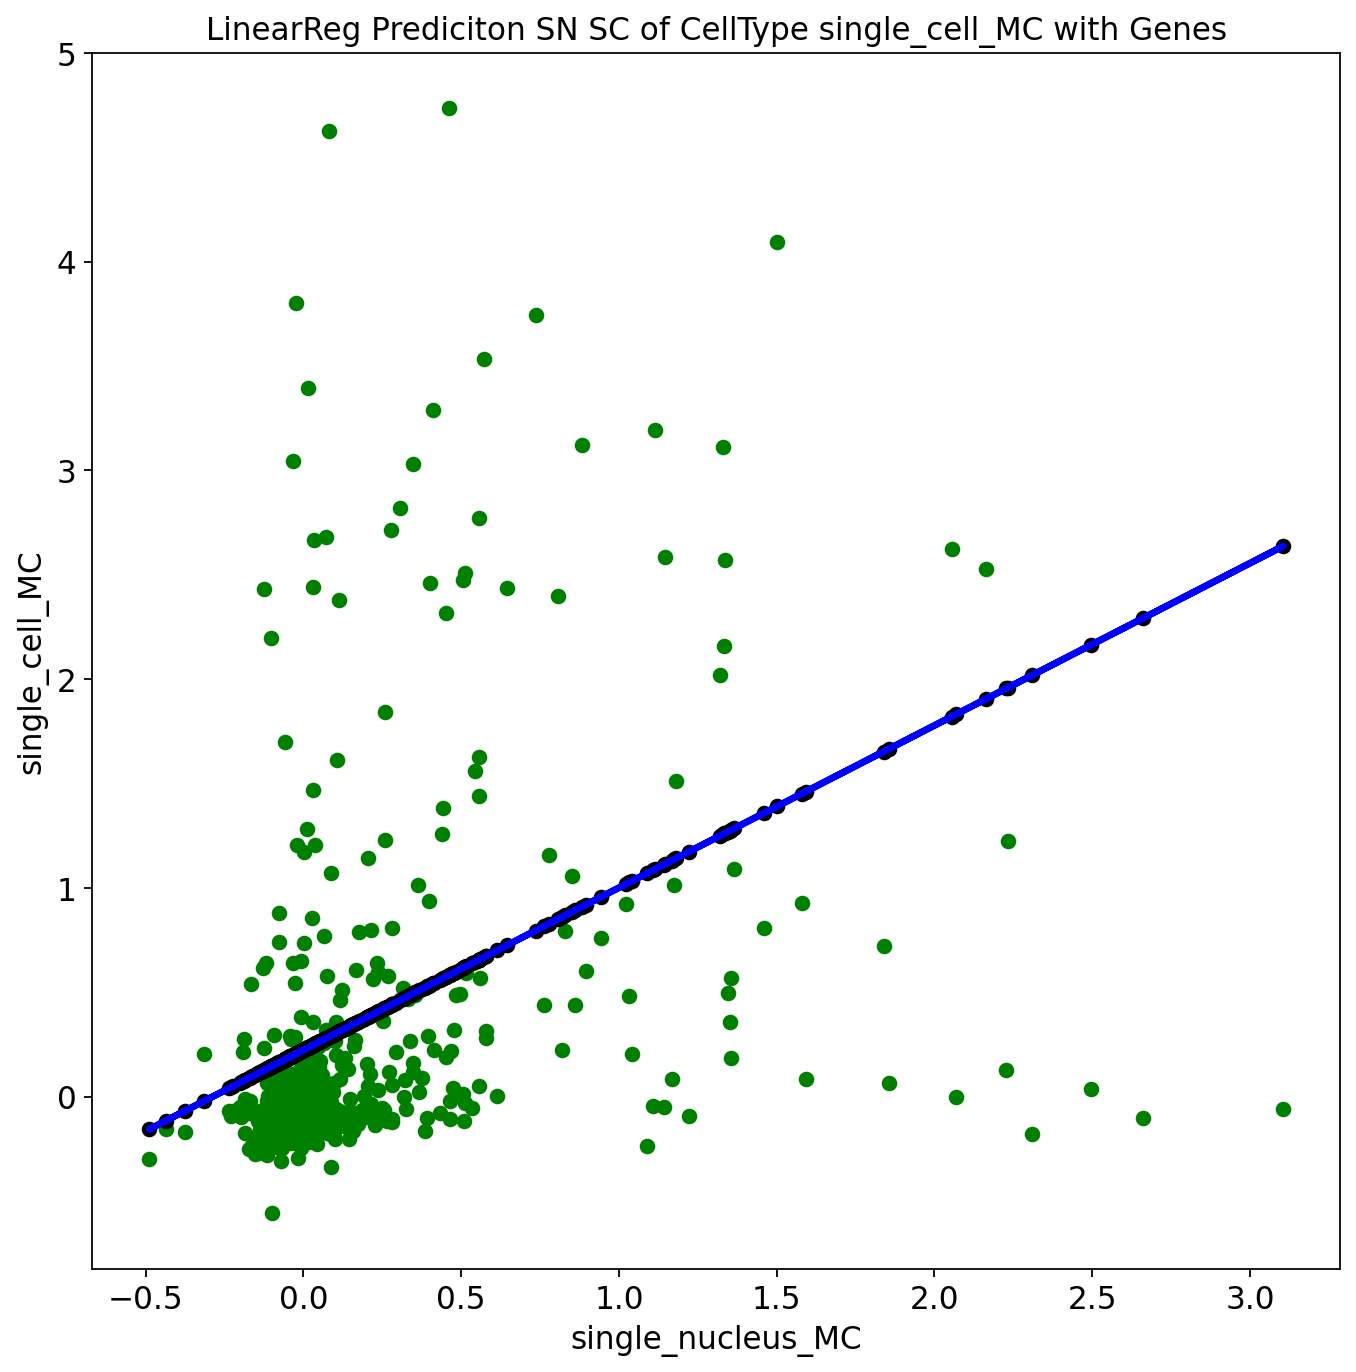

In [313]:
regr_MCf_g, x_train_MCf_g, y_train_MCf_g, x_test_MCf_g, y_test_MCf_g, y_pred_MCf_g = translator_fcn.linear_model_cell_gene(single_adata_filt, "orig_and_celltype", "single_nucleus_MC", "single_cell_MC", 500, 472)

Coefficients: 
 [[1.]]
Mean squared error: 0.68
Coefficient of determination: 0.07


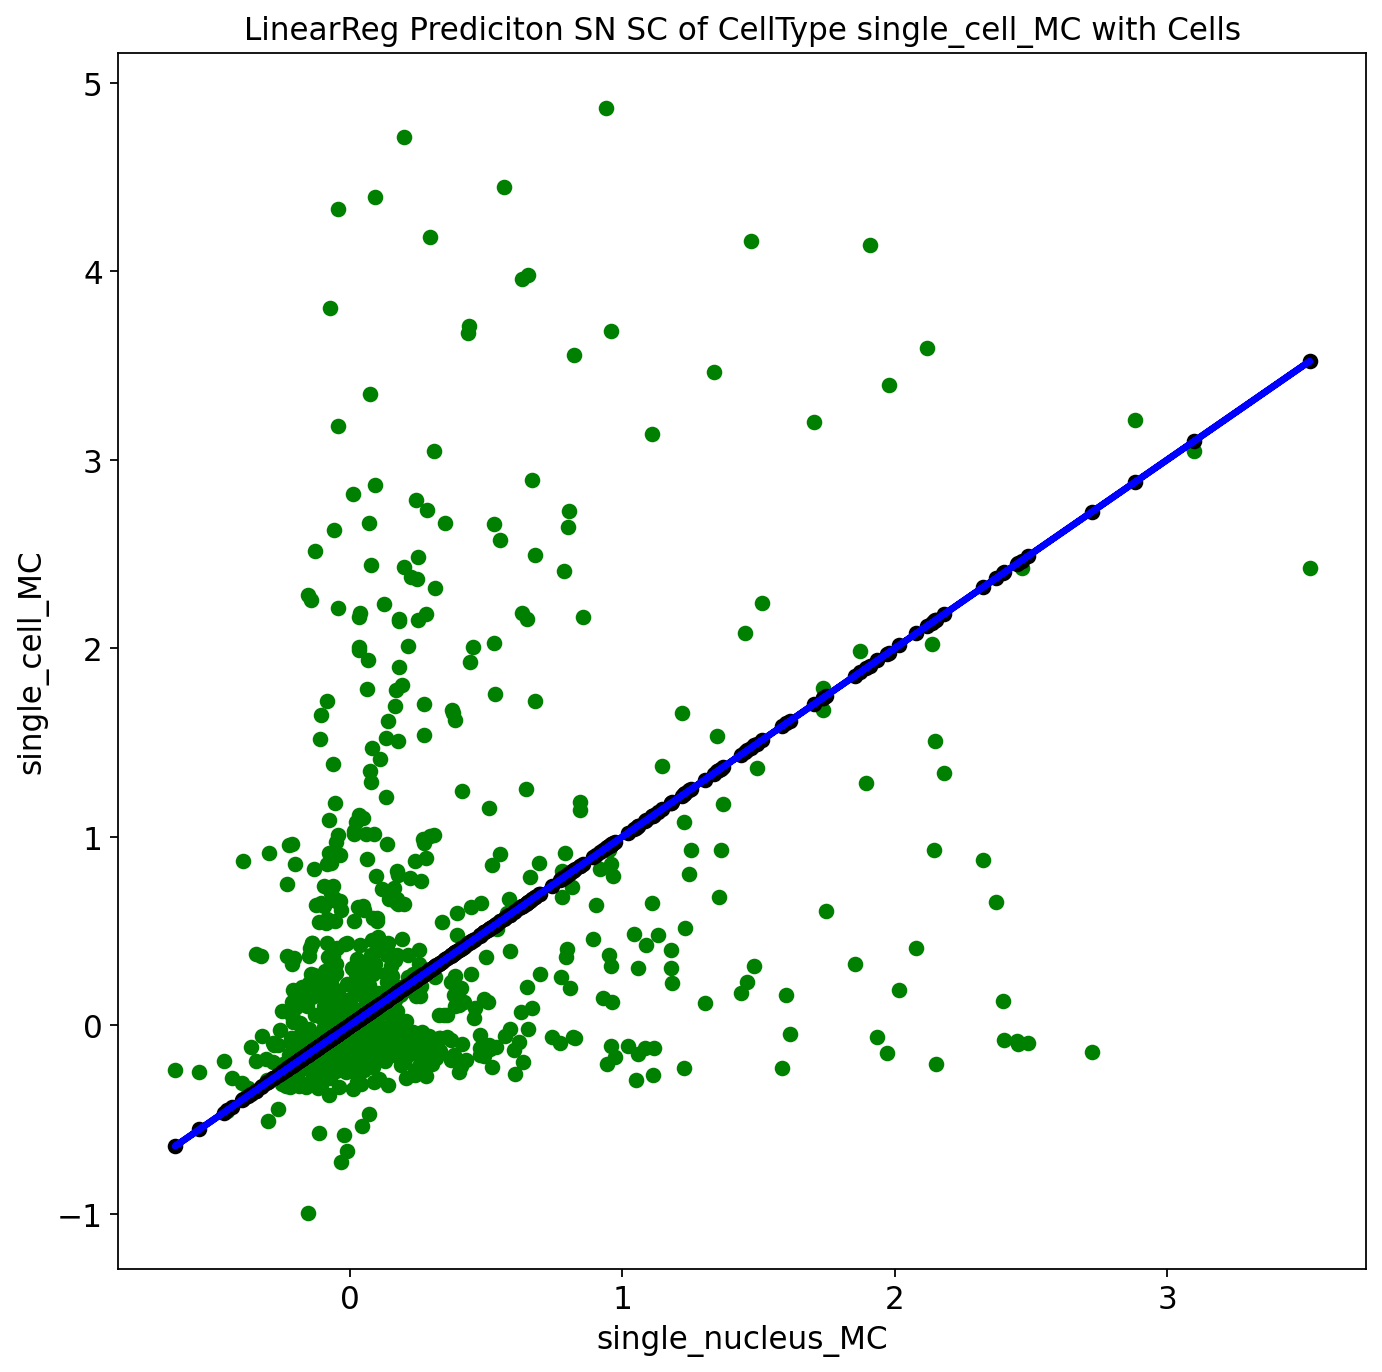

In [314]:
regr_MCf, x_train_MCf, y_train_MCf, x_test_MCf, y_test_MCf, y_pred_MCf = translator_fcn.linear_model_cellnum(single_adata_filt, "orig_and_celltype", "single_nucleus_MC", "single_cell_MC", 0.2)

Coefficients: 
 [1.9361181]
Mean squared error: 0.31
Coefficient of determination: 0.37


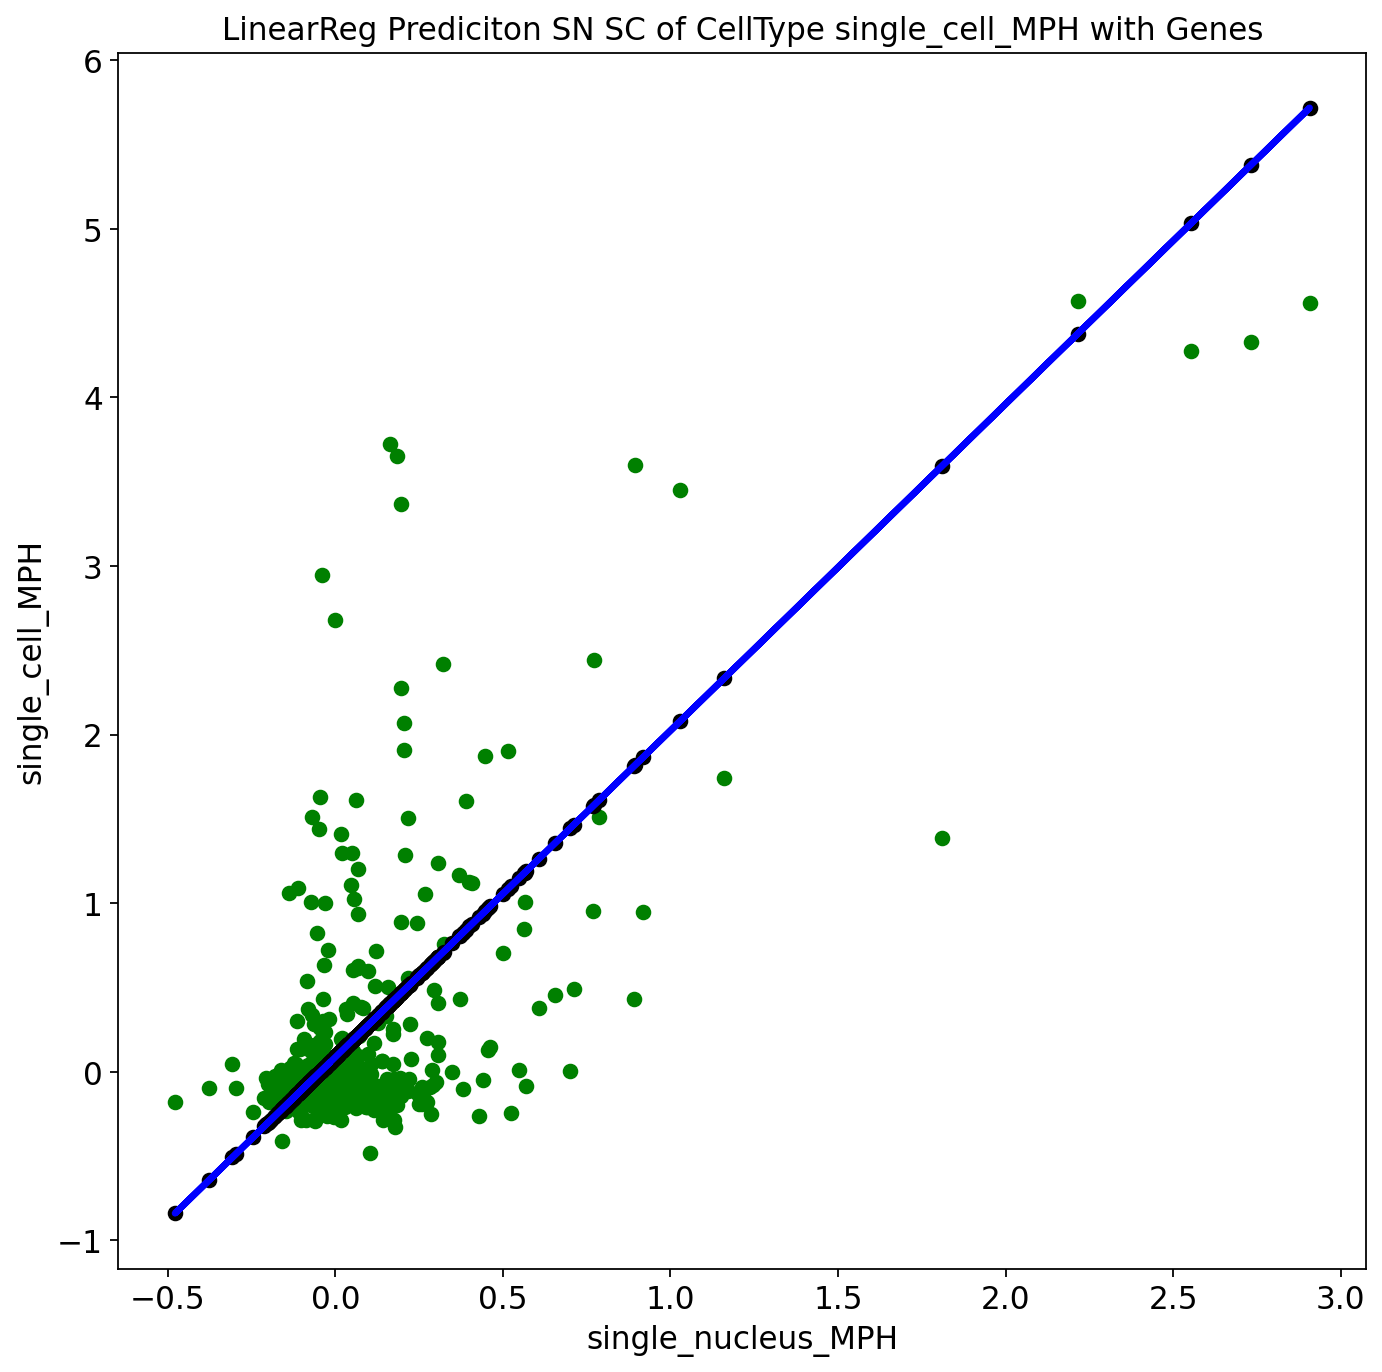

In [315]:
regr_MPHf_g, x_train_MPHf_g, y_train_MPHf_g, x_test_MPHf_g, y_test_MPHf_g, y_pred_MPHf_g = translator_fcn.linear_model_cell_gene(single_adata_filt, "orig_and_celltype", "single_nucleus_MPH", "single_cell_MPH", 500, 472)

Coefficients: 
 [[1.0000004]]
Mean squared error: 0.38
Coefficient of determination: 0.35


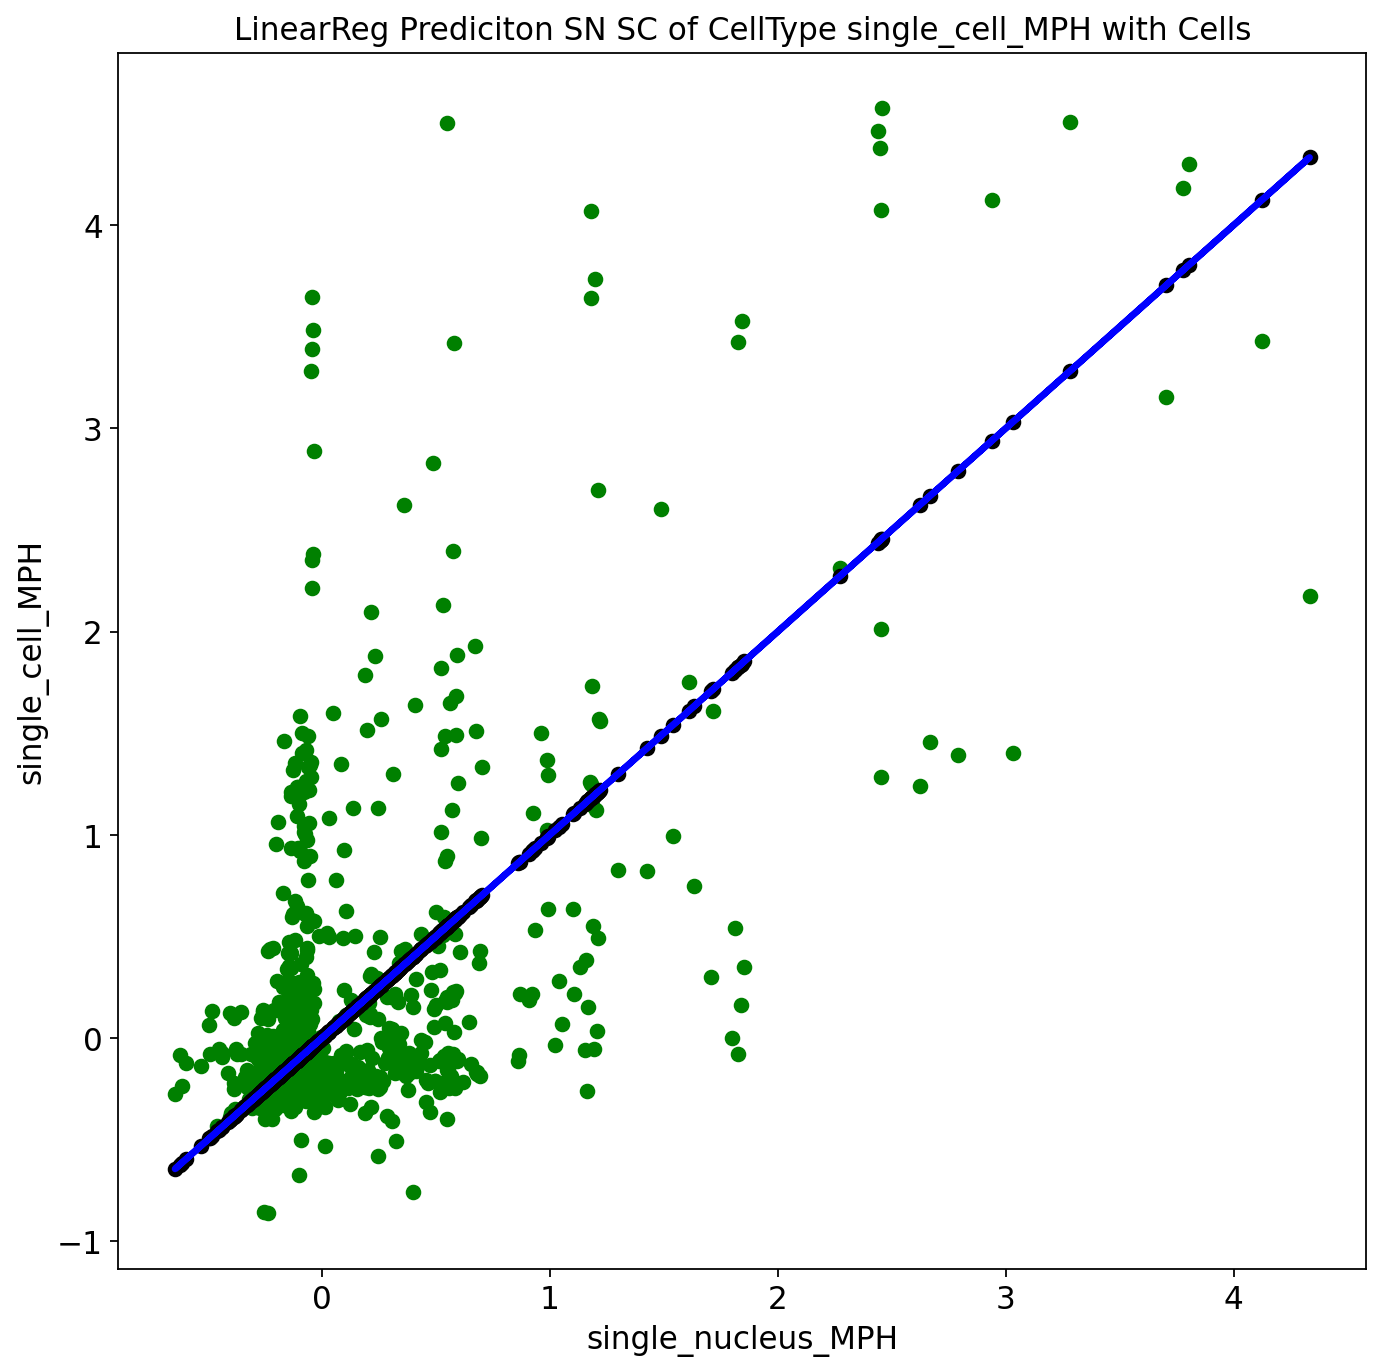

In [316]:
regr_MPHf, x_train_MPHf, y_train_MPHf, x_test_MPHf, y_test_MPHf, y_pred_MPHf= translator_fcn.linear_model_cellnum(single_adata_filt, "orig_and_celltype", "single_nucleus_MPH", "single_cell_MPH", 0.2)

Coefficients: 
 [[1.]]
Mean squared error: 0.01
Coefficient of determination: -0.41


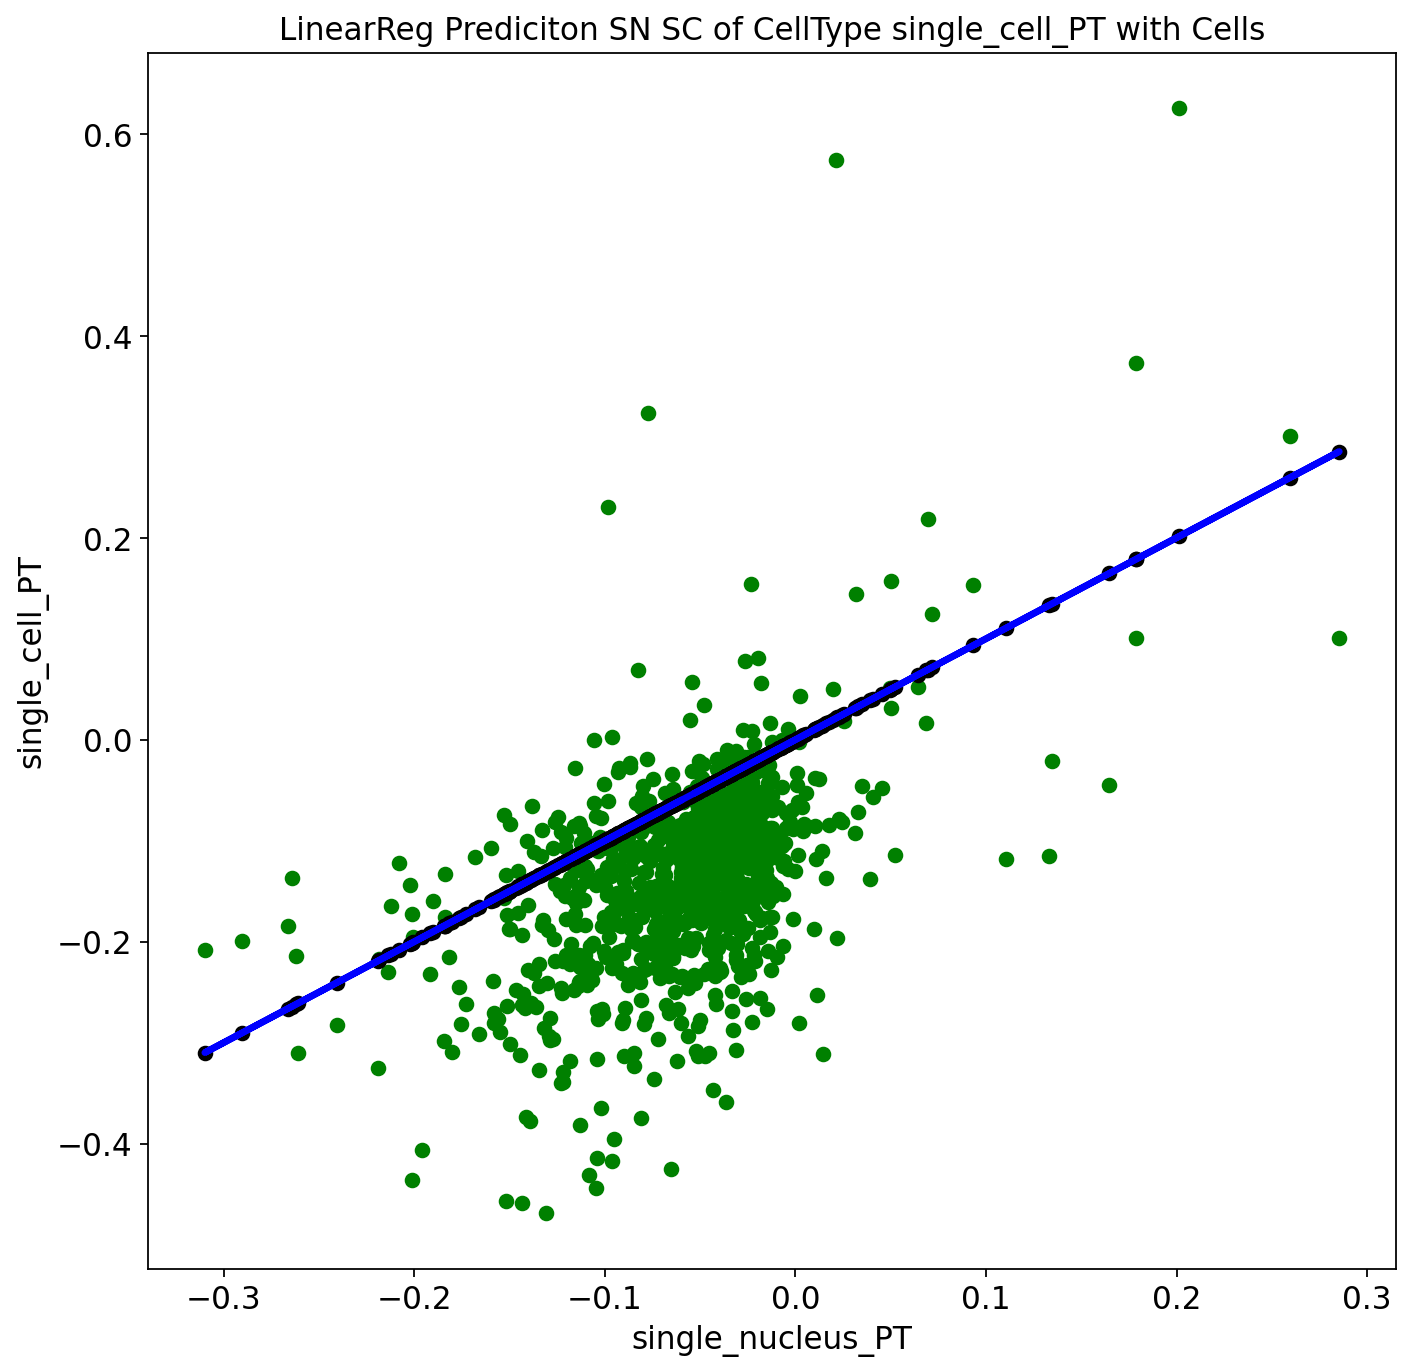

In [317]:
regr_PTf, x_train_PTf, y_train_PTf, x_test_PTf, y_test_PTf, y_pred_PTf = translator_fcn.linear_model_cellnum(single_adata_filt, "orig_and_celltype", "single_nucleus_PT", "single_cell_PT", 0.2)

Coefficients: 
 [1.0940529]
Mean squared error: 0.01
Coefficient of determination: 0.20


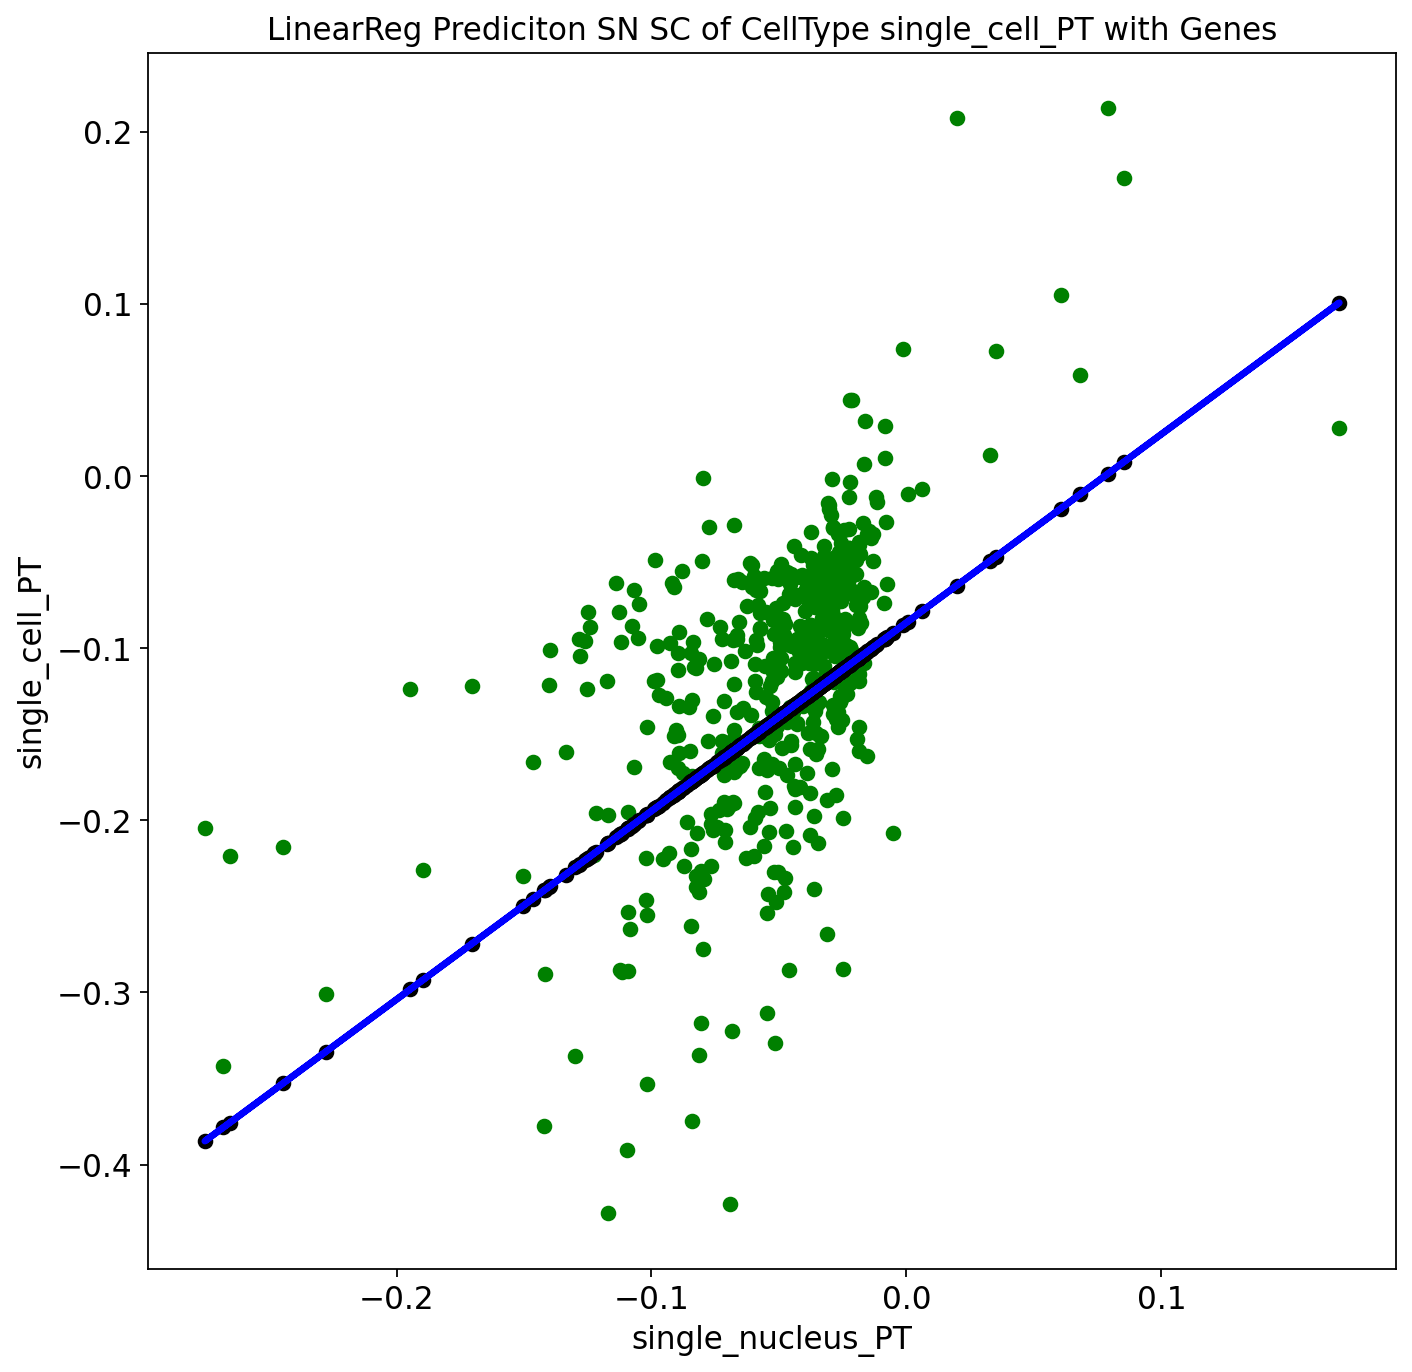

In [318]:
regr_PTf_g, x_train_PTf_g, y_train_PTf_g, x_test_PTf_g, y_test_PTf_g, y_pred_PTf_g = translator_fcn.linear_model_cell_gene(single_adata_filt, "orig_and_celltype", "single_nucleus_PT", "single_cell_PT", 500, 472)

Coefficients: 
 [[0.9999999]]
Mean squared error: 0.51
Coefficient of determination: 0.58


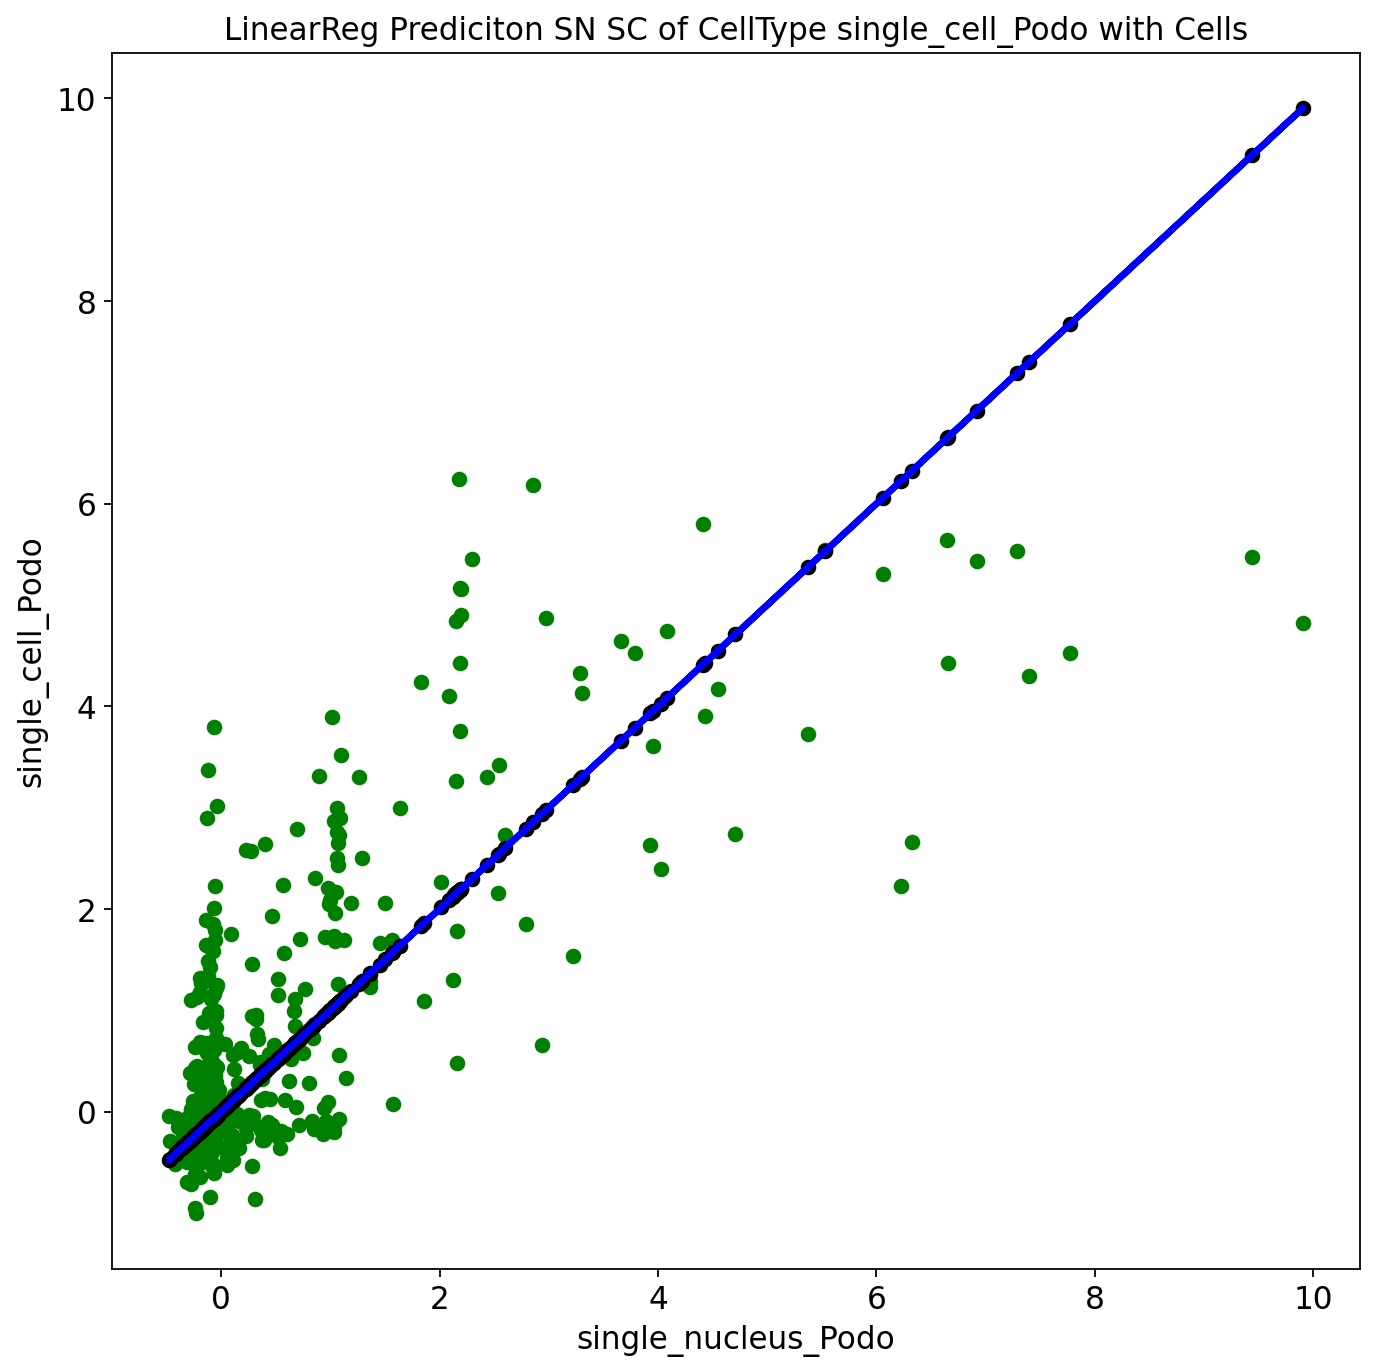

In [319]:
regr_Podof, x_train_Podof, y_train_Podof, x_test_Podof, y_test_Podof, y_pred_Podof = translator_fcn.linear_model_cellnum(single_adata_filt, "orig_and_celltype", "single_nucleus_Podo", "single_cell_Podo", 0.2)

Coefficients: 
 [1.1042134]
Mean squared error: 0.30
Coefficient of determination: 0.62


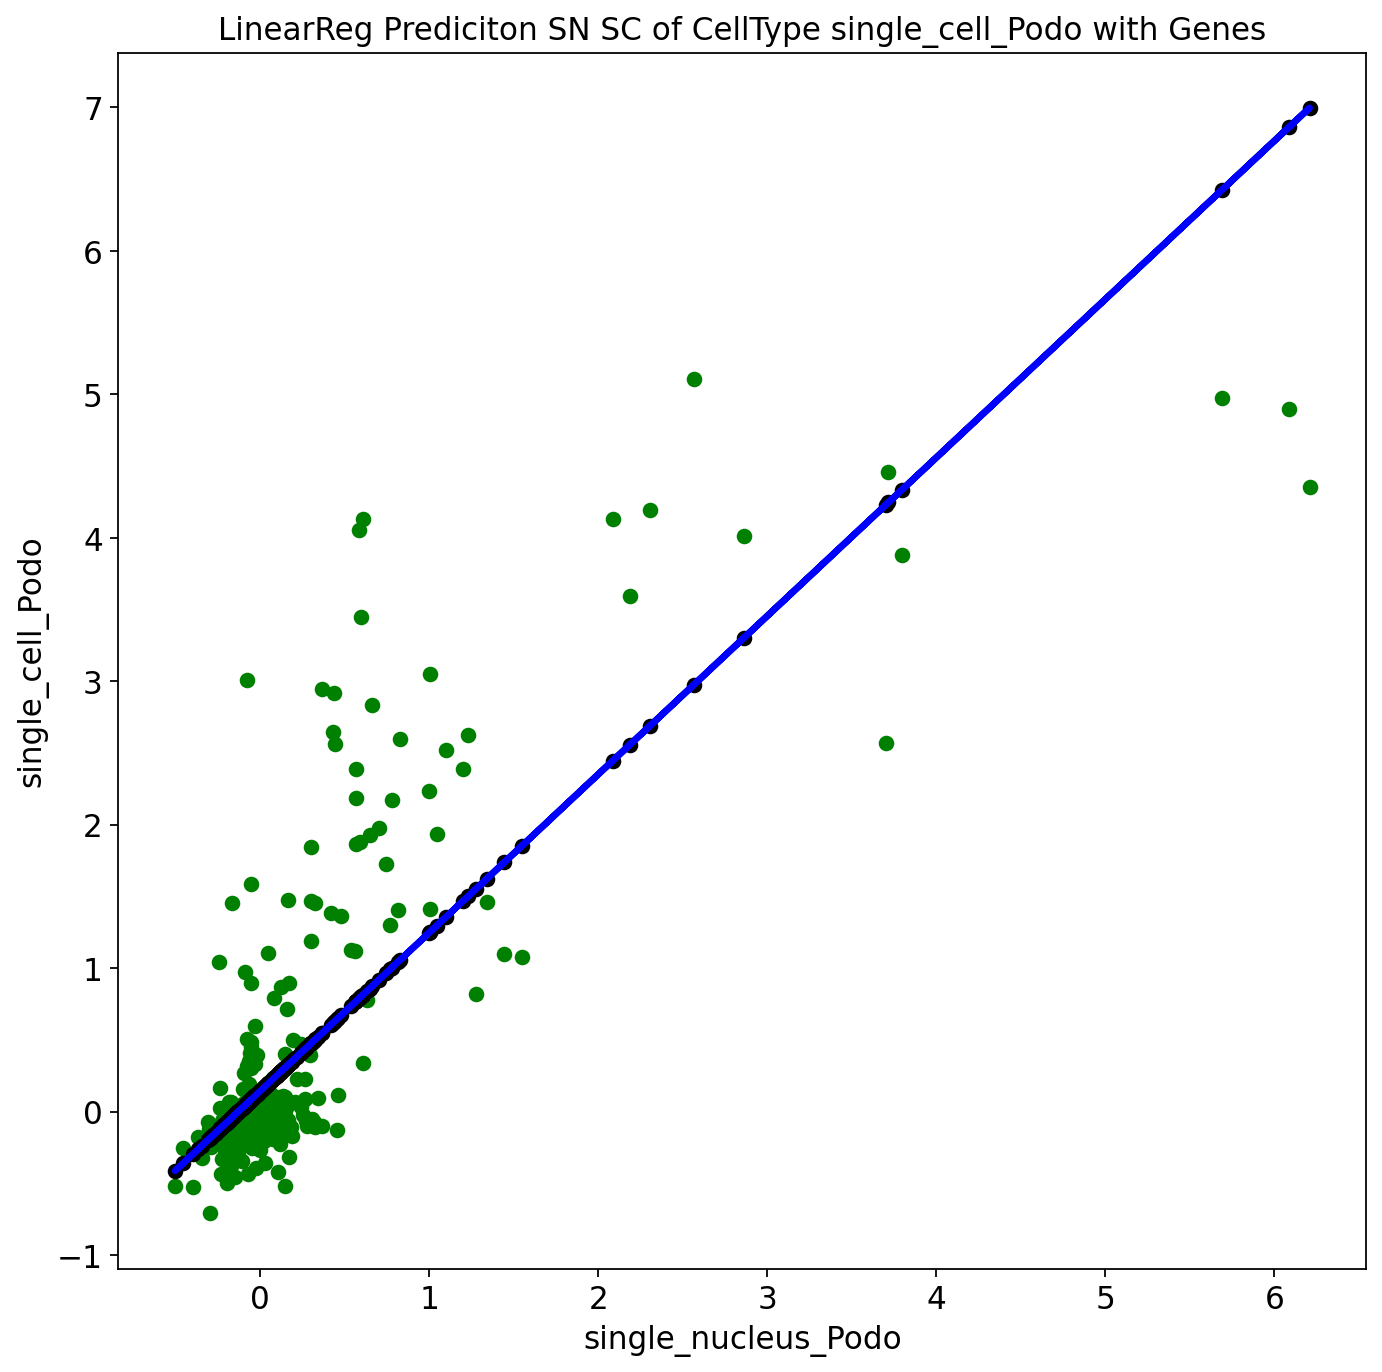

In [320]:
regr_Podof_g, x_train_Podof_g, y_train_Podof_g, x_test_Podof_g, y_test_Podof_g, y_pred_Podof_g = translator_fcn.linear_model_cell_gene(single_adata_filt, "orig_and_celltype", "single_nucleus_Podo", "single_cell_Podo", 500, 472)

Coefficients: 
 [[0.99999994]]
Mean squared error: 0.05
Coefficient of determination: 0.53


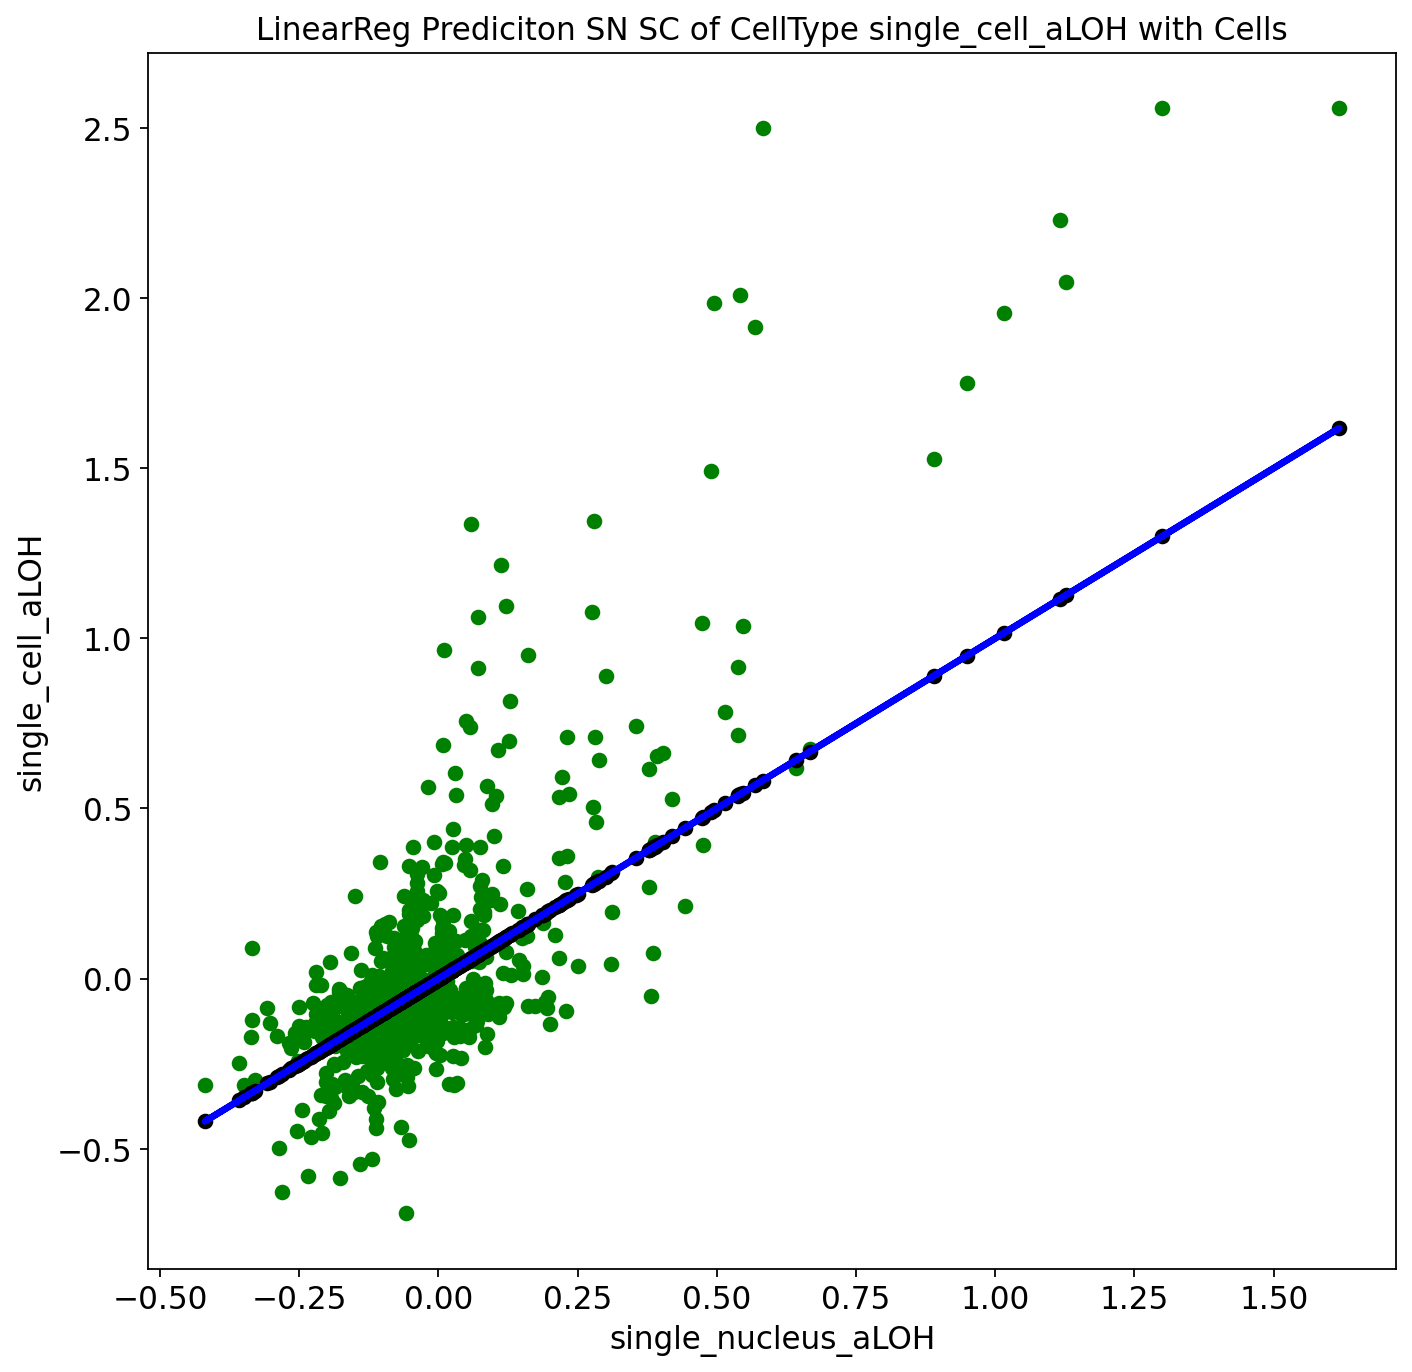

In [321]:
regr_aLOHf, x_train_aLOHf, y_train_aLOHf, x_test_aLOHf, y_test_aLOHf, y_pred_aLOHf = translator_fcn.linear_model_cellnum(single_adata_filt, "orig_and_celltype", "single_nucleus_aLOH", "single_cell_aLOH",0.2)

Coefficients: 
 [1.650835]
Mean squared error: 0.03
Coefficient of determination: 0.66


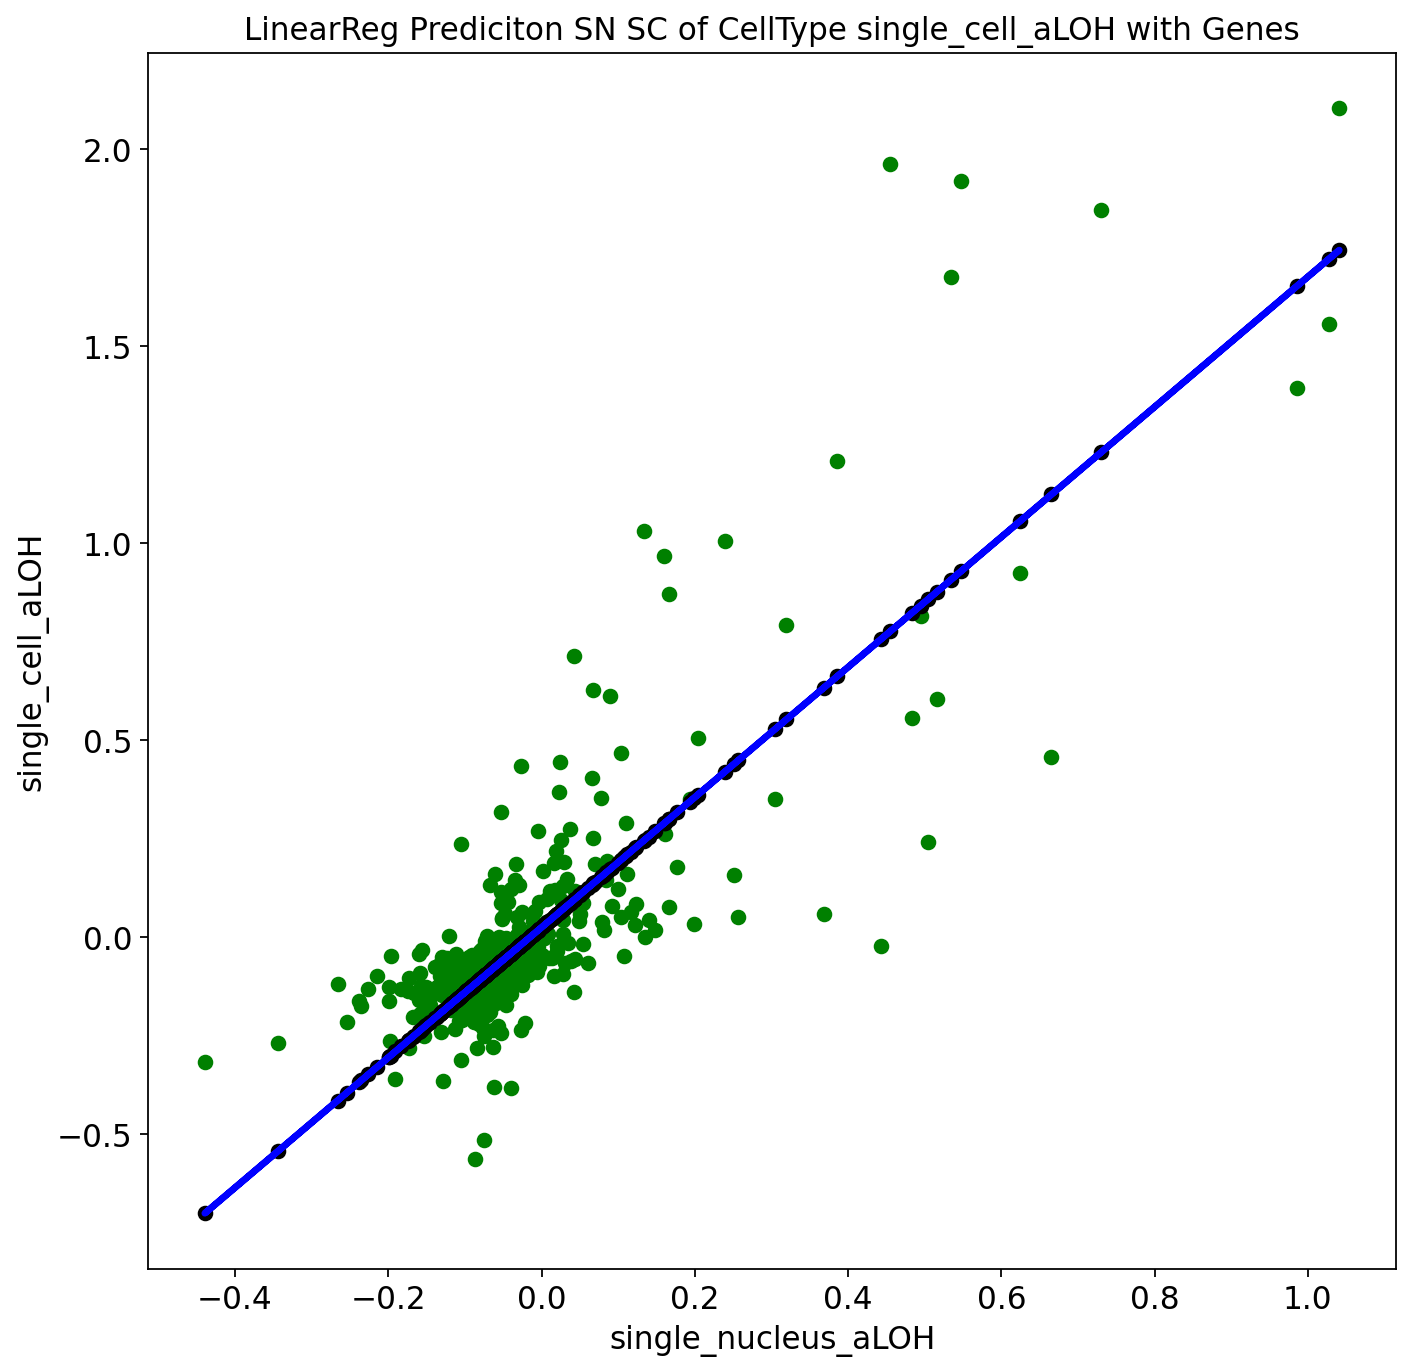

In [322]:
regr_aLOHf_g, x_train_aLOHf_g, y_train_aLOHf_g, x_test_aLOHf_g, y_test_aLOHf_g, y_pred_aLOHf_g = translator_fcn.linear_model_cell_gene(single_adata_filt, "orig_and_celltype", "single_nucleus_aLOH", "single_cell_aLOH",500, 472)

Computing MSE and Pearson:

In [323]:
#calculate and save pearon correlations
values_df_f = pd.DataFrame(columns= matching_celltypes, index=["PearsonCorr", "MeanSqError", "PearsonCorr_g", "MeanSqError_g"])

values_df_f["CD_IC"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_CD_ICf), np.squeeze(y_pred_CD_ICf))[0]

values_df_f["CD_PC"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_CD_PCf), np.squeeze(y_pred_CD_PCf))[0]

values_df_f["CNT"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_CNTf), np.squeeze(y_pred_CNTf))[0]

values_df_f["DCT"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_DCTf), np.squeeze(y_pred_DCTf))[0]

values_df_f["Endo"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_Endof), np.squeeze(y_pred_Endof))[0]

values_df_f["MC"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_MCf), np.squeeze(y_pred_MCf))[0]

values_df_f["MPH"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_MPHf), np.squeeze(y_pred_MPHf))[0]

values_df_f["PT"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_PTf), np.squeeze(y_pred_PTf))[0]

values_df_f["Podo"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_Podof), np.squeeze(y_pred_Podof))[0]

values_df_f["aLOH"]["PearsonCorr"] = pearsonr(np.squeeze(y_test_aLOHf), np.squeeze(y_pred_aLOHf))[0]

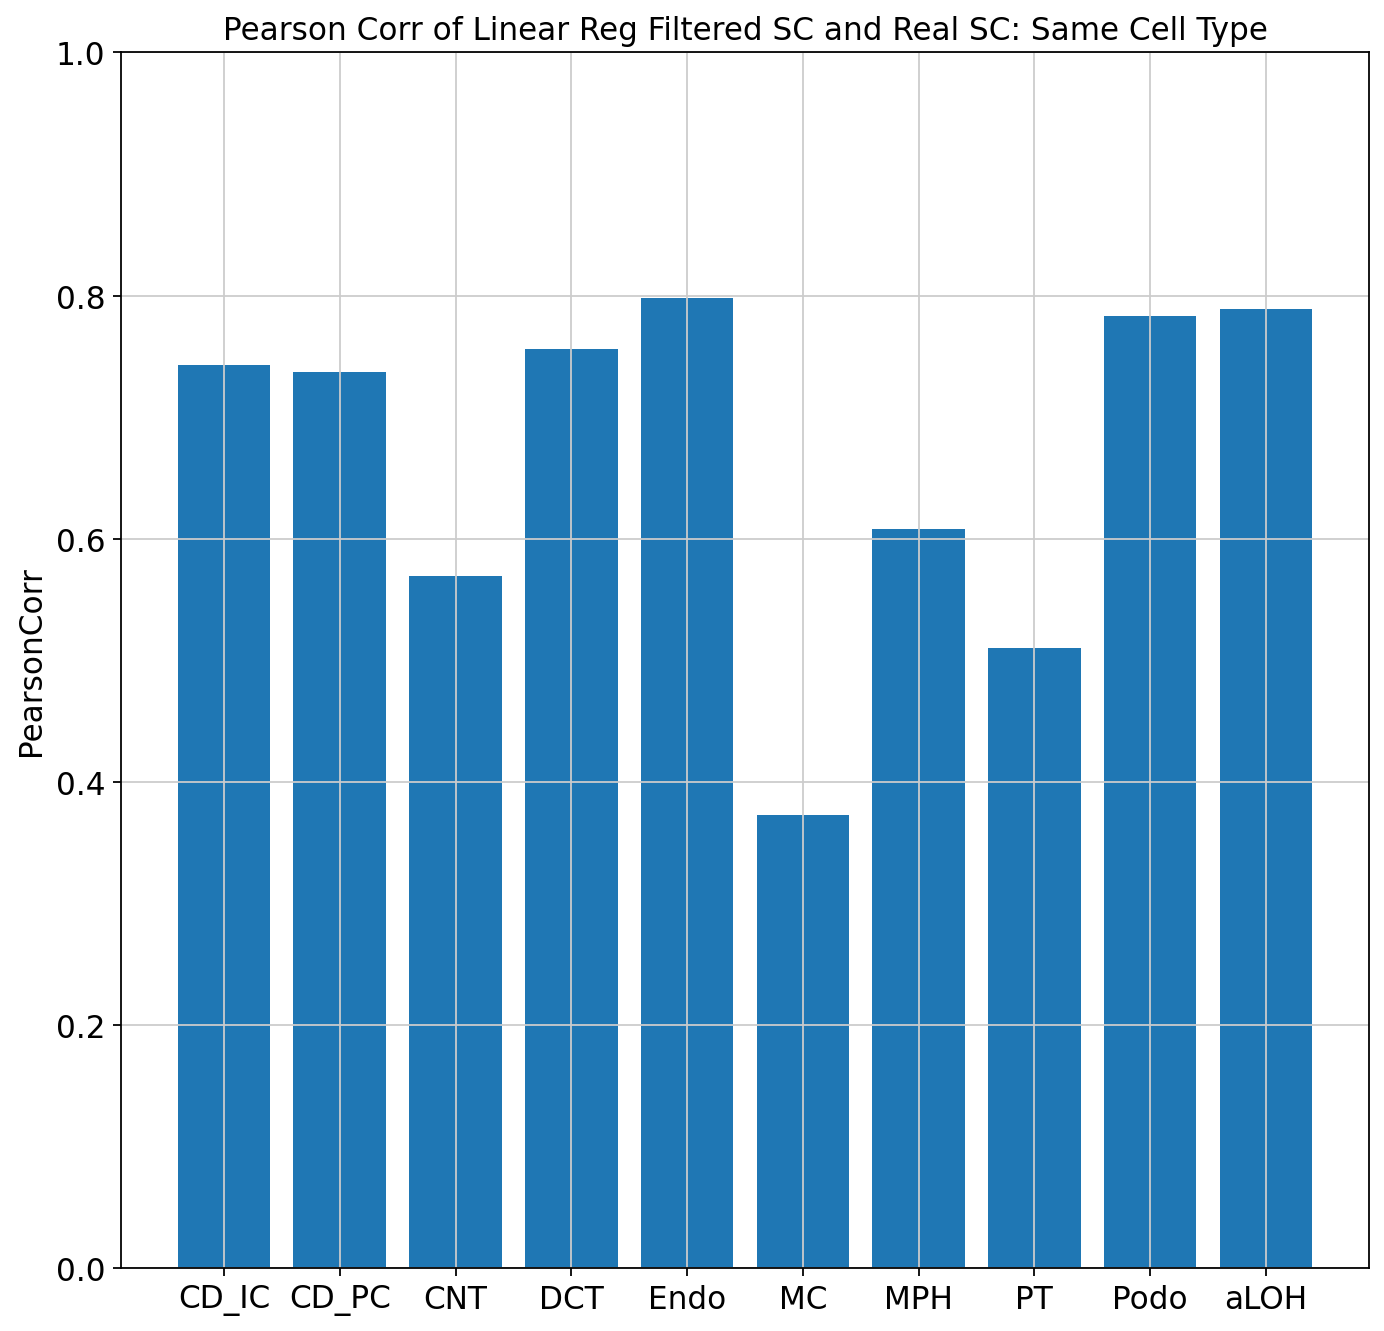

In [324]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
titles = values_df_f.columns
counts = values_df_f.iloc[0]
bar_labels = values_df_f.columns

ax.bar(titles, counts, label=bar_labels)
ax.set_ylim([0,1])
ax.set_ylabel(values_df_f.iloc[0].name)
ax.set_title('Pearson Corr of Linear Reg Filtered SC and Real SC: Same Cell Type')

plt.show()

In [325]:
#calculate and save MSEs
values_df_f["CD_IC"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_CD_ICf, y_pred_CD_ICf)

values_df_f["CD_PC"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_CD_PCf, y_pred_CD_PCf)

values_df_f["CNT"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_CNTf, y_pred_CNTf)

values_df_f["DCT"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_DCTf, y_pred_DCTf)

values_df_f["Endo"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_Endof, y_pred_Endof)

values_df_f["MC"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_MCf, y_pred_MCf)

values_df_f["MPH"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_MPHf, y_pred_MPHf)

values_df_f["PT"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_PTf, y_pred_PTf)

values_df_f["Podo"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_Podof, y_pred_Podof)

values_df_f["aLOH"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_aLOHf, y_pred_aLOHf)

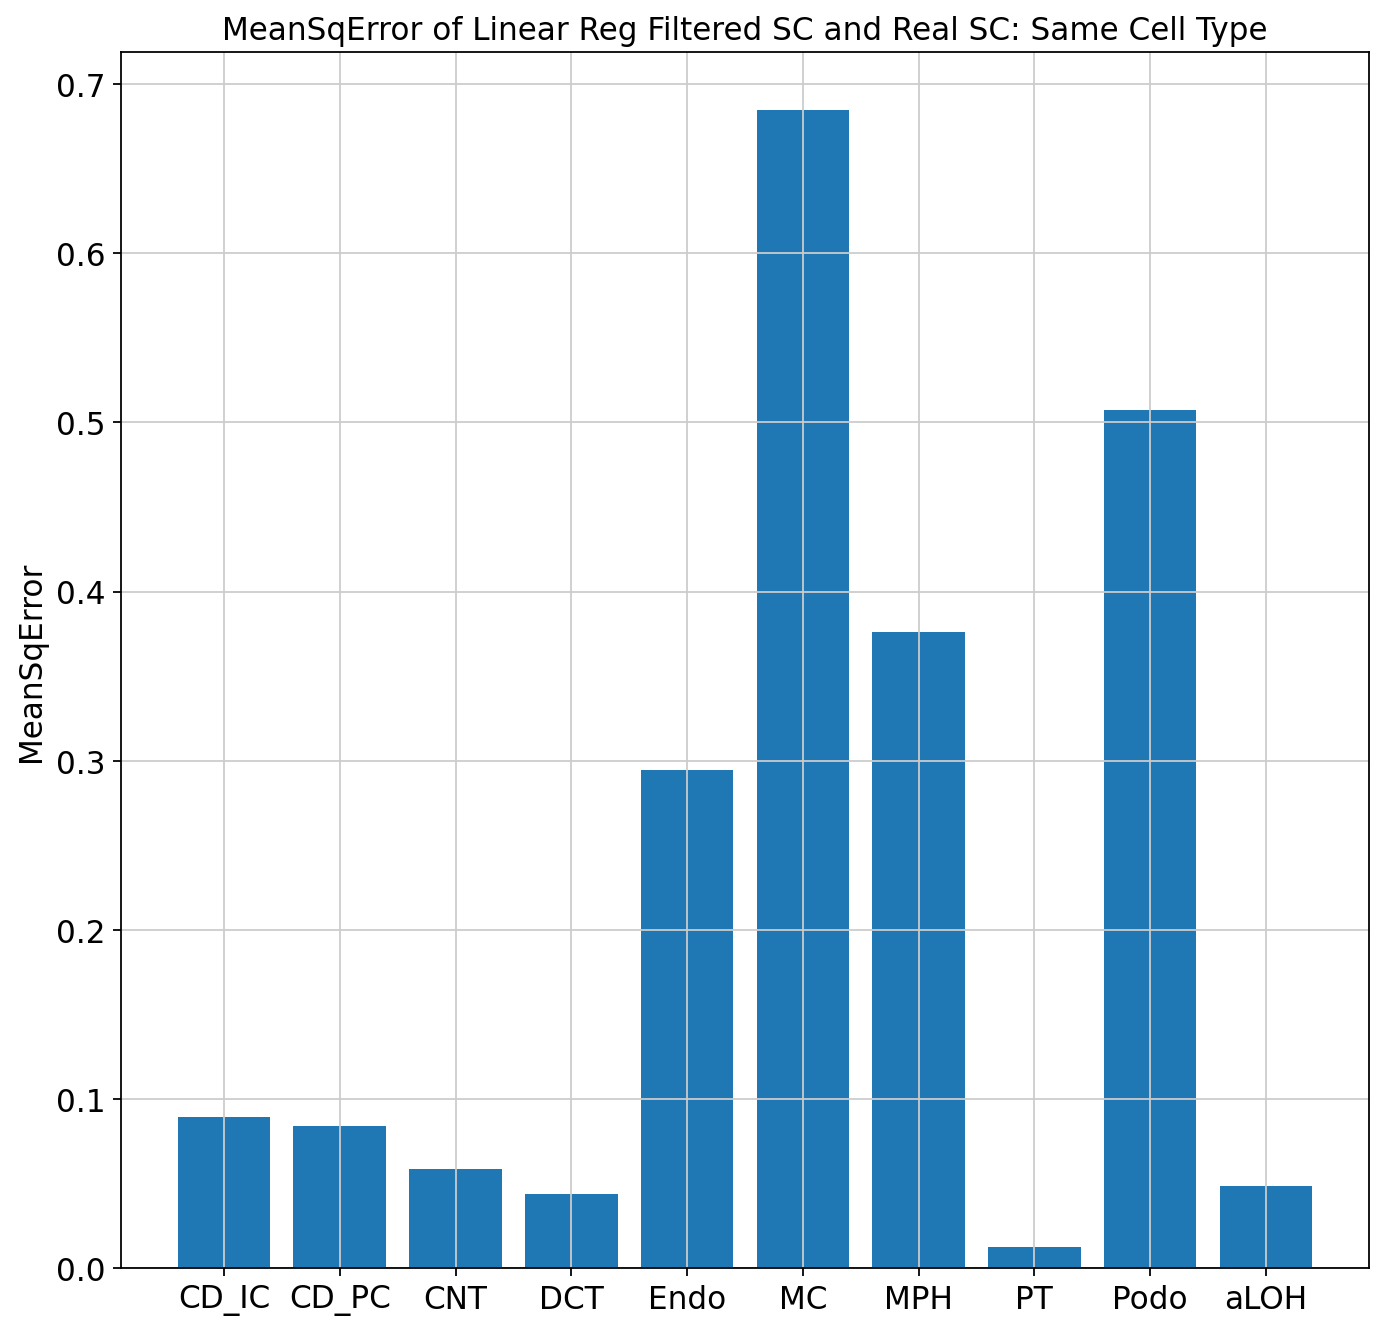

In [326]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
titles = values_df_f.columns
counts = values_df_f.iloc[1]
bar_labels = values_df_f.columns

ax.bar(titles, counts, label=bar_labels)
ax.set_ylabel(values_df_f.iloc[1].name)
ax.set_title('MeanSqError of Linear Reg Filtered SC and Real SC: Same Cell Type')

plt.show()

In [327]:
#calculate and save pearon correlations

values_df_f["CD_IC"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_CD_ICf_g), np.squeeze(y_pred_CD_ICf_g))[0]

values_df_f["CD_PC"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_CD_PCf_g), np.squeeze(y_pred_CD_PCf_g))[0]

values_df_f["CNT"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_CNTf_g), np.squeeze(y_pred_CNTf_g))[0]

values_df_f["DCT"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_DCTf_g), np.squeeze(y_pred_DCTf_g))[0]

values_df_f["Endo"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_Endof_g), np.squeeze(y_pred_Endof_g))[0]

values_df_f["MC"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_MCf_g), np.squeeze(y_pred_MCf_g))[0]

values_df_f["MPH"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_MPHf_g), np.squeeze(y_pred_MPHf_g))[0]

values_df_f["PT"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_PTf_g), np.squeeze(y_pred_PTf_g))[0]

values_df_f["Podo"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_Podof_g), np.squeeze(y_pred_Podof_g))[0]

values_df_f["aLOH"]["PearsonCorr_g"] = pearsonr(np.squeeze(y_test_aLOHf_g), np.squeeze(y_pred_aLOHf_g))[0]


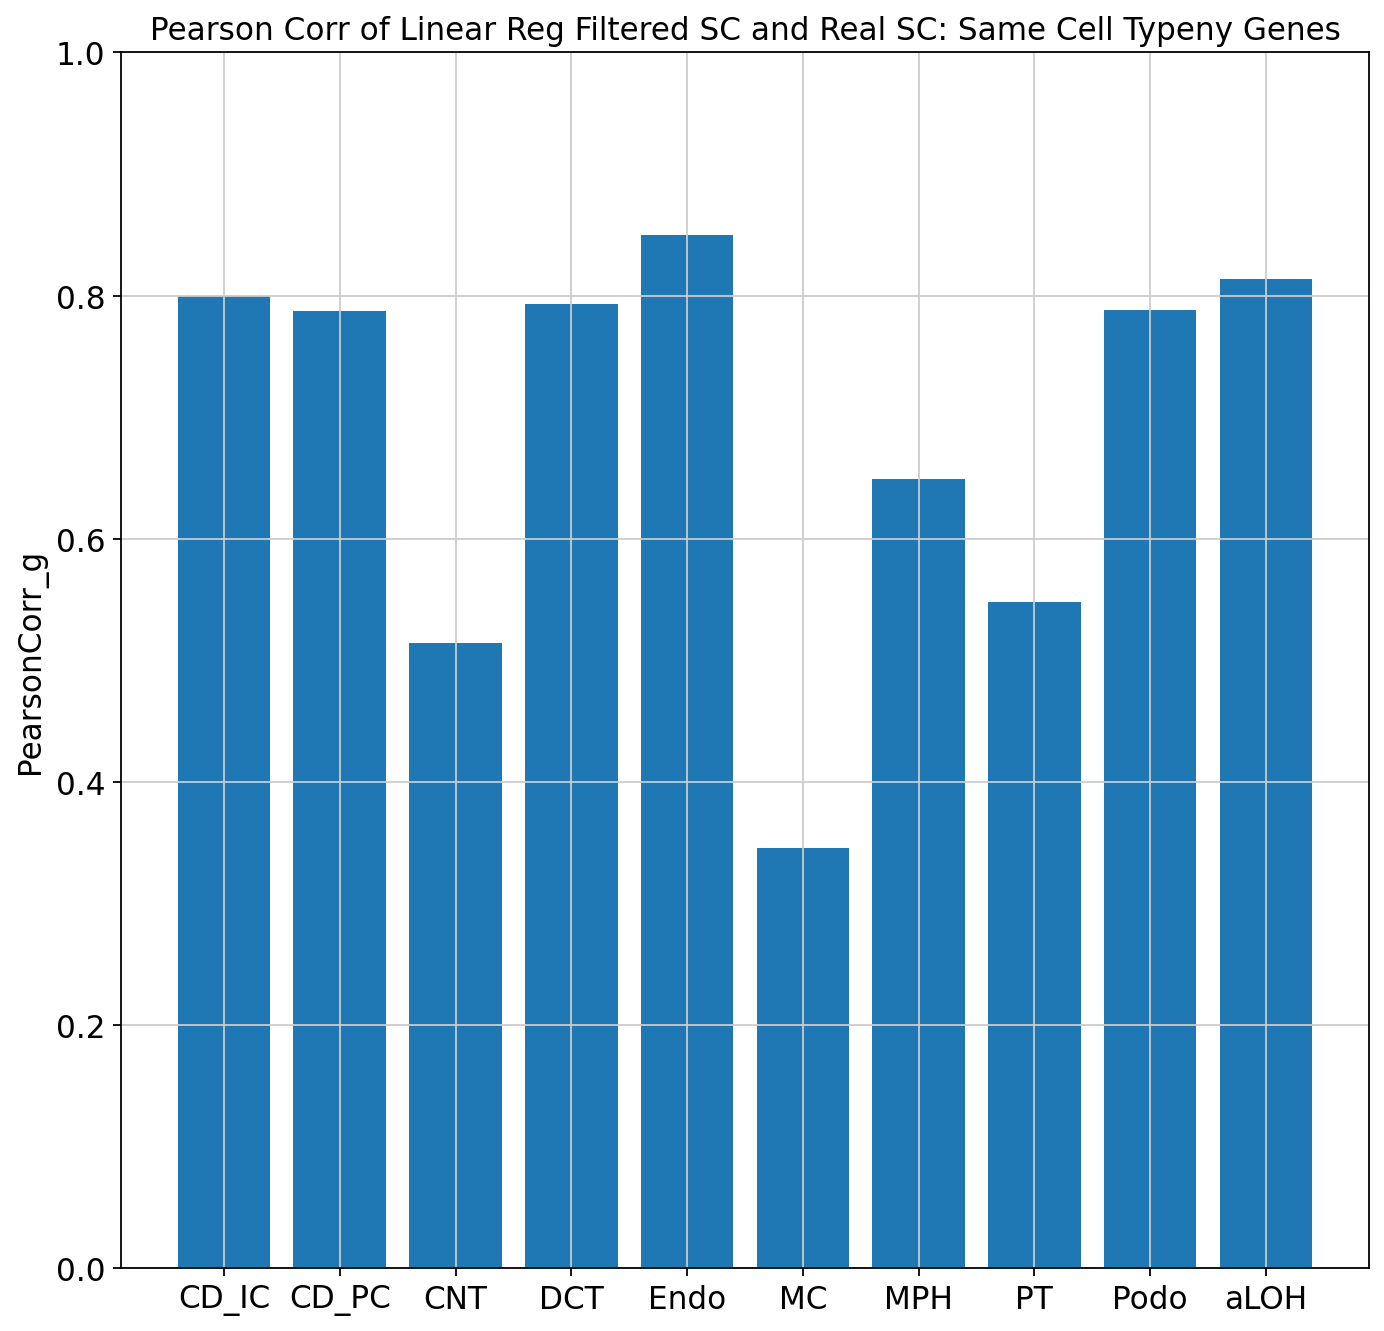

In [328]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
titles = values_df_f.columns
counts = values_df_f.iloc[2]
bar_labels = values_df_f.columns

ax.bar(titles, counts, label=bar_labels)
ax.set_ylim([0,1])
ax.set_ylabel(values_df_f.iloc[2].name)
ax.set_title('Pearson Corr of Linear Reg Filtered SC and Real SC: Same Cell Typeny Genes')

plt.show()

In [329]:
#calculate and save MSEs
values_df_f["CD_IC"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_CD_ICf_g, y_pred_CD_ICf_g)

values_df_f["CD_PC"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_CD_PCf_g, y_pred_CD_PCf_g)

values_df_f["CNT"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_CNTf_g, y_pred_CNTf_g)

values_df_f["DCT"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_DCTf_g, y_pred_DCTf_g)

values_df_f["Endo"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_Endof_g, y_pred_Endof_g)

values_df_f["MC"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_MCf_g, y_pred_MCf_g)

values_df_f["MPH"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_MPHf_g, y_pred_MPHf_g)

values_df_f["PT"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_PTf_g, y_pred_PTf_g)

values_df_f["Podo"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_Podof_g, y_pred_Podof_g)

values_df_f["aLOH"]["MeanSqError_g"] = translator_fcn.mean_sqr_error(y_test_aLOHf_g, y_pred_aLOHf_g)

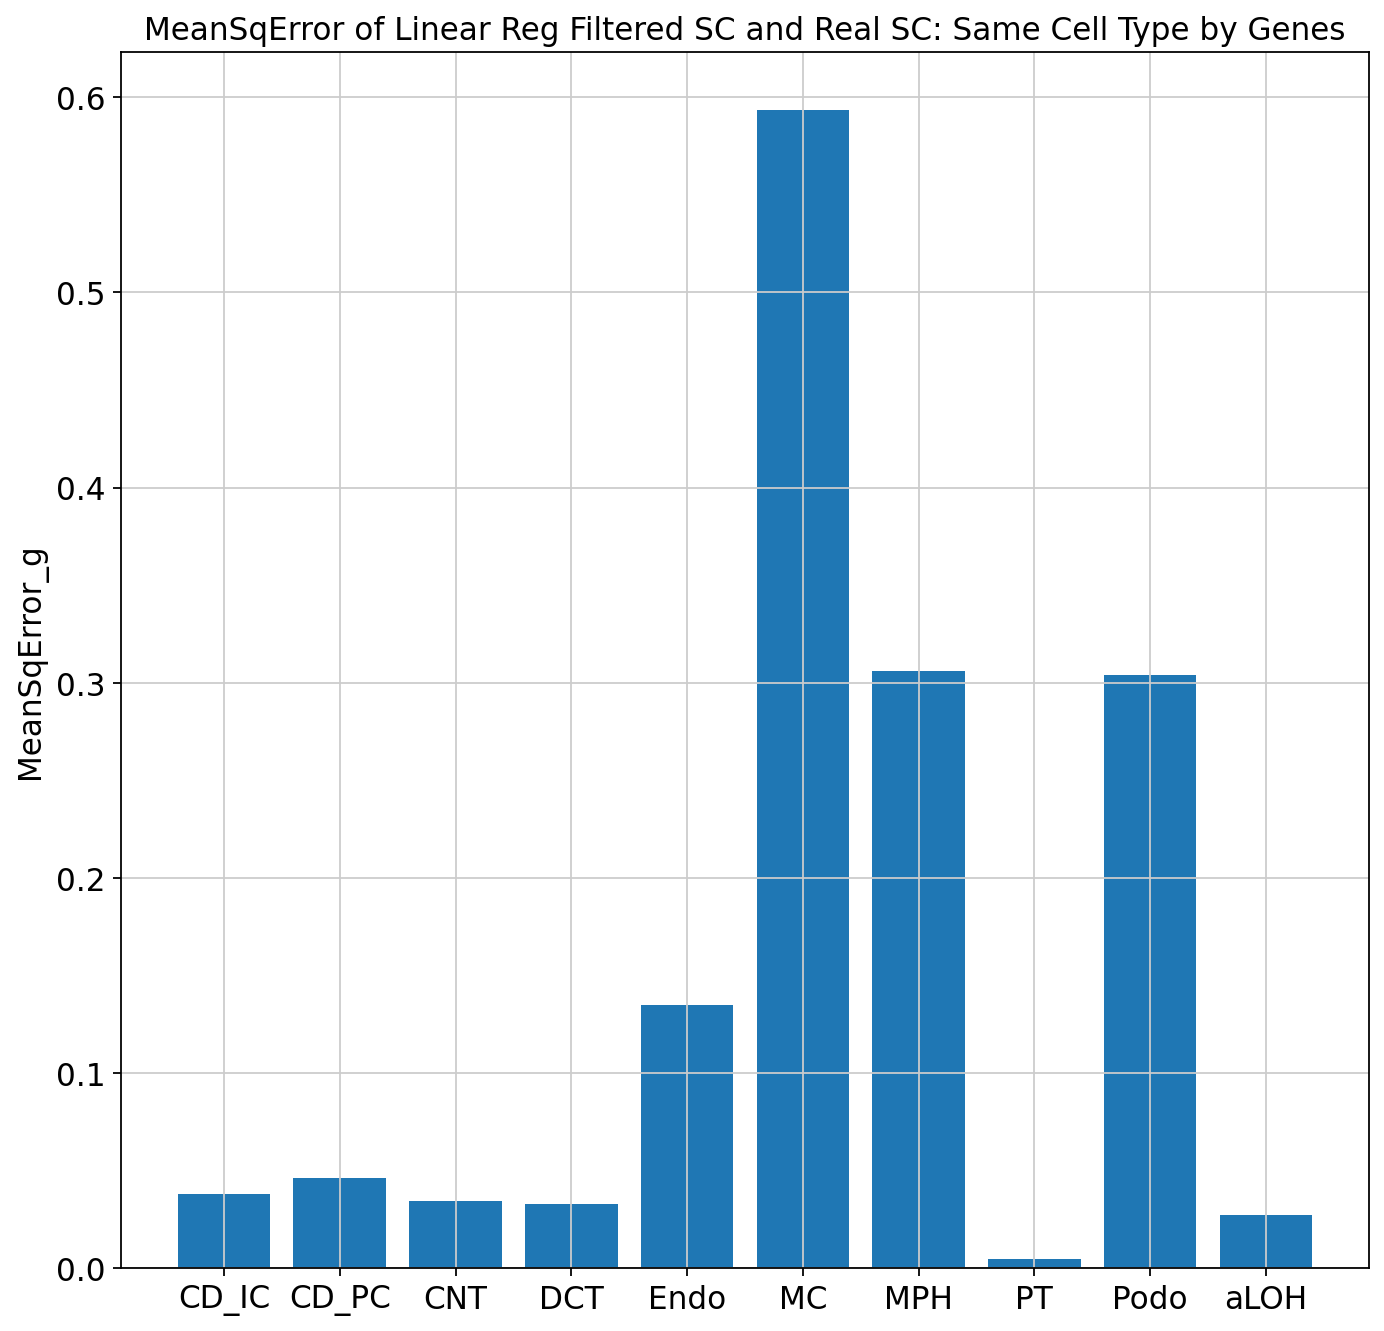

In [330]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
titles = values_df_f.columns
counts = values_df_f.iloc[3]
bar_labels = values_df_f.columns

ax.bar(titles, counts, label=bar_labels)
ax.set_ylabel(values_df_f.iloc[3].name)
ax.set_title('MeanSqError of Linear Reg Filtered SC and Real SC: Same Cell Type by Genes')

plt.show()